# Prediction of benign or malignant cancer tumors


### Submitted by: Pratik B Kanase
#### kanasepratik2@gmail.com

- Data Source: 
[1] Source: Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository
(http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
Irvine, CA: University of California, School of Information and Computer Science.


# Project Workflow
<br>


##  Data and Features Understanding
<br>

- Understanding Feature Datatypes
<br>

- Understanding Feature Characteristics
    - Missing Data Analysis
    - Cardinality Analysis
    - Outlier Analysis
    - Assumptions
    
<hr>
   
## Data Preprocessing
<br>

- Missing Data Treatment   

- Feature Scaling

<br>
<hr>    

## Data Understanding by Exploratory Data Analysis

<ol>
 <li>Graphical EDA Analysis</li>
    - Univariate EDA <br>
    - Bivariate EDA<br>
    <br>
 <li>Statistical EDA Analysis</li>
    - Normality Tests <br>
    - Significance Tests <br>
  <br>
 <li>Class Imbalnce Treatment</li>
    - SMOTE <br>
    <br>
</ol>

<hr>

## Feature Engineering

<ol>
 <li>Feature Imporatnce</li>
    - Feature Significance Tests: ANOVA
    
 <li>Feature Encoding</li>
    - Categorical Label Encoding
     <br>
</ol>
 <br>
<hr>

## Feature Importance
<br>
- Understanding Feature Importance and Feture Interpretation Using Recursive Feature Elimination

<br>
 <br>
<hr>

## Dimensionality Reduction
<br>
- Dimensionality Reduction using PCA

<br>
 <br>
<hr>

## Model Training

<br>
- Applying Different Classification Models to Get the Best Performing Model with Better Results and Stability
<ol>
    <br>
 <li>Random Forest</li>
    - Evalution of RF Algorithm<br>
    - Hyperparameter Tunning using Gid Search CV<br>
    - Cross Validation<br>
    <br>
 <li>XG Boost</li>
    - Evalution of XG Boost and interpreting performance characteristics<br>
    - Hyperparameter tunning with Grid Search CV Algorithm<br>
    - Evaluating Results<br>
    <br>
 <li>SVM</li>
    - SVM Model Evaluation<br>
    - Interpretaion of performance<br>
   <br>
 <li>Artificial Neural Network</li>
    - ANN Parameter Tunning<br>
    - Evaluating Results<br>
    <br>
</ol>

<br>
<hr>

## Comparing & Interpreting Model Performance 

<br>
<hr>

## Selecting the Best Model 

<br>
<hr>

## Saving the Model

<br>
<hr>

## Conclusion


In [1]:
#Importing the Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:

#Making list of feature names from the data descrpition files
feature_names=['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
 'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
 'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
 'concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',
 'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
 'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

#Importing the Data
data = pd.read_csv(r"C:\Users\Hp\Desktop\bc\wdbc.data", delimiter="," , names=feature_names)
pd.set_option('display.max_rows' ,None)
pd.set_option('display.max_columns' ,None)

data.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [3]:
# Seperating X AND Y and removing unnecessary features
X=data.iloc[:,2:]
y=data.iloc[:,1]


##  Data and Features Understanding

In [4]:
 def dataset_info(data):
        """
        Description: This function shll be used to generate basic information about the dataset
        """
        print('\nShape of Dataset',data.shape)
        print('\nNumber of Rows',data.shape[0],'\nNumber of Columns: ',data.shape[1])
        print('\nFeature Names : \n',data.columns.values)
        print('\nInformation about Datatypes: ')
        print('\n%s'%data.info())
        print('\nUnique values per column: \n%s'%data.nunique())
        print('\nAny Missing Values in data?: %s'%data.isnull().values.any())
        return(data.profile_report(minimal=True))

    
#Calling the dunction
dataset_info(data)


Shape of Dataset (569, 32)

Number of Rows 569 
Number of Columns:  32

Feature Names : 
 ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']

Information about Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean

- Missing Data Analysis

Any missing datapoints in dataset: False
There is no missing datapoints in dataset


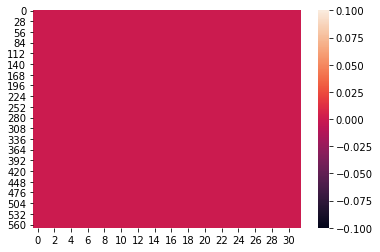

In [5]:
def missing_data_analysis(data):
        '''
        This function shall be used for the analysis of the missing data in te
        '''
        print('Any missing datapoints in dataset:',data.isnull().values.any())
        if data.isnull().values.any()==True:
            print('Columnwise missing data present in the dataset')
            missing_data=pd.DataFrame({'total_missing_count':data.isnull().sum(),
                                       'percentage_missing':data.isnull().sum()/data.shape[0]*100,
                                       'datatype':data.dtypes})

            print(missing_data[missing_data.total_missing_count>0])
            sns.heatmap(data.isnull().values)
            
            
            #Counting cells with missing values:(Total number of NA)
            a=sum(data.isnull().values.ravel())
            #Getting total number of cells
            b=np.prod(data.shape)
            #Getting percentage of NA in overall data
            print('\n','\n','Total percentage of missing data :',(a/b)*100,' % \n')
        else:
            print('There is no missing datapoints in dataset')
            sns.heatmap(data.isnull().values)
            
            
missing_data_analysis(data)

- From the above analysis it is clear that there is no missing data present in the dataset

## Data Understanding by Exploratory Data Analysis

### Univariate Analysis

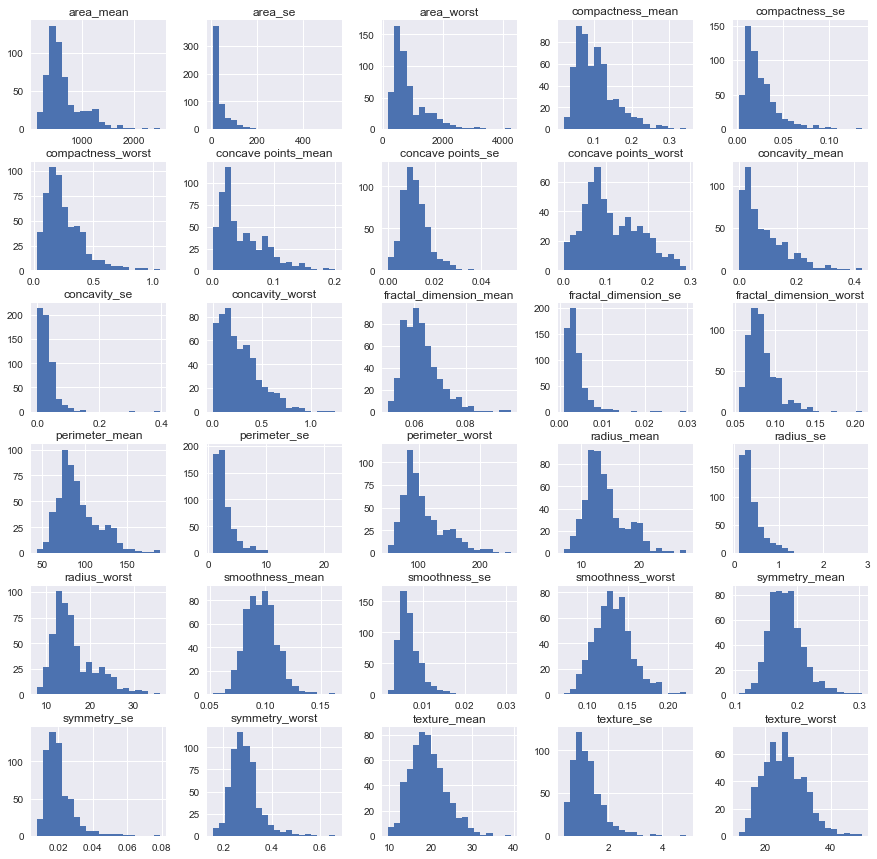

In [6]:
#Univariate Numerical Analysis with Histogram


def univariate_analysis_histogram(dataset):
            plt.style.use('seaborn')
            dataset.hist(bins=20, figsize=(15,15))
            plt.show()
            
 #Calling the Function           
univariate_analysis_histogram(X)    

- From the above graph of histogram of independent features it can be analyzed that most of the fetures are normally distributed. Some of the features are left skewed, we need to analyze it further to confirm that whether the transformation process needed or not. We can confirm this with the help of skewness test and with the help of statistical hypothesis tests. 

- Outlier Analysis

Name of Feature : radius_mean
Skewness of Feature : 0.9423795716730992


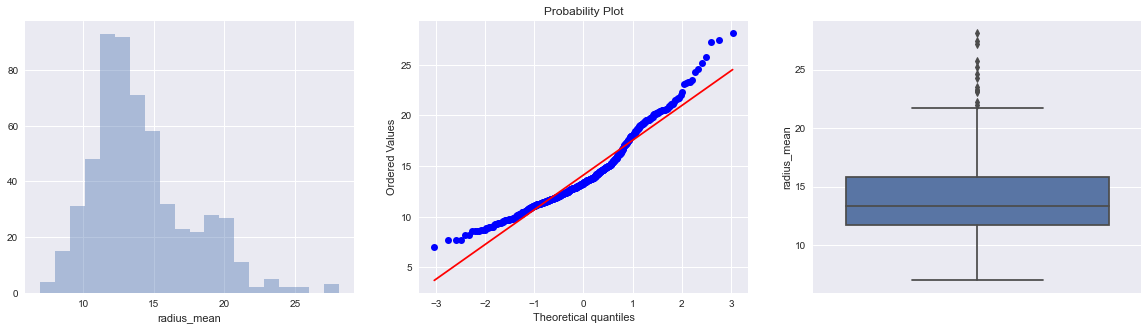

Name of Feature : texture_mean
Skewness of Feature : 0.6504495420828159


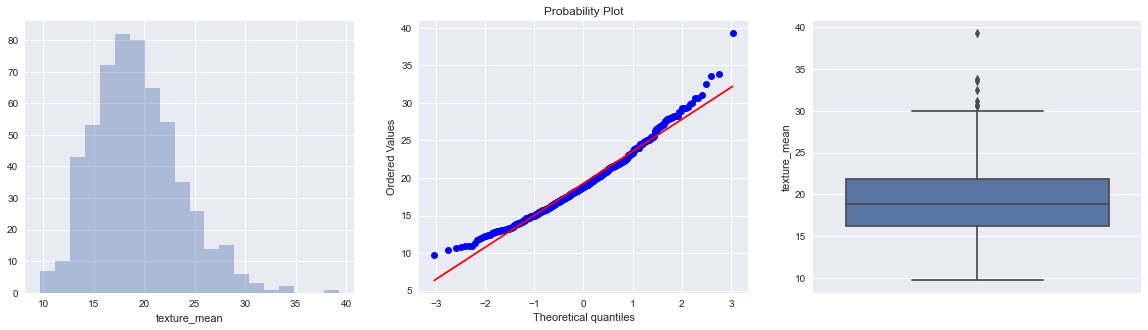

Name of Feature : perimeter_mean
Skewness of Feature : 0.9906504253930081


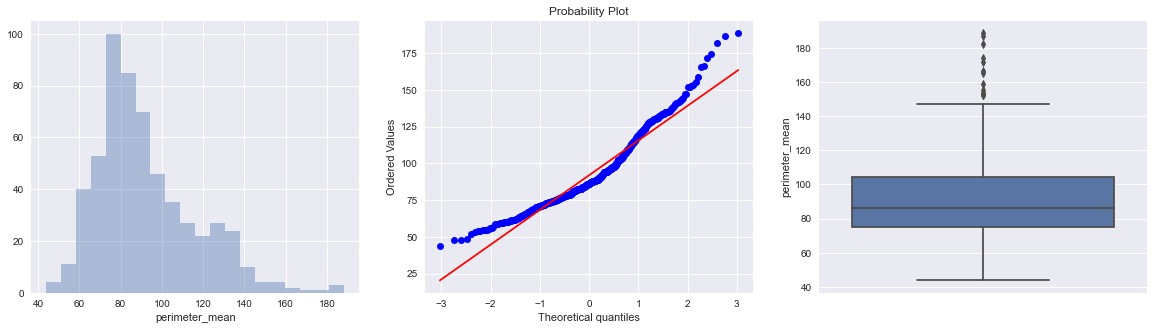

Name of Feature : area_mean
Skewness of Feature : 1.6457321756240424


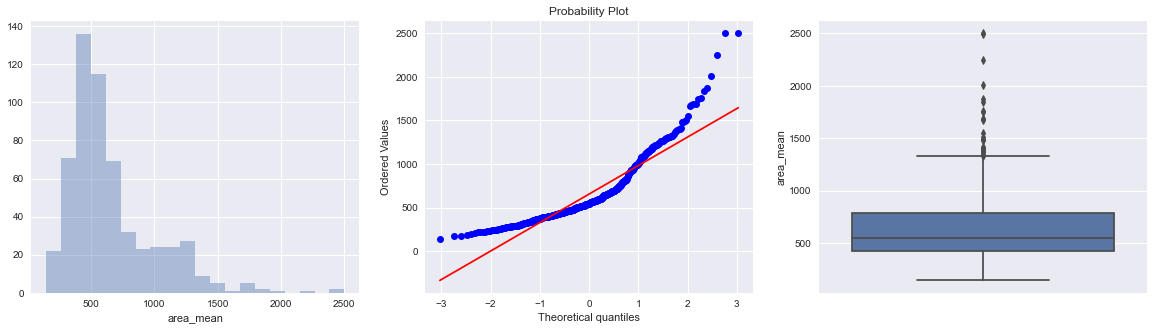

Name of Feature : smoothness_mean
Skewness of Feature : 0.45632376481956155


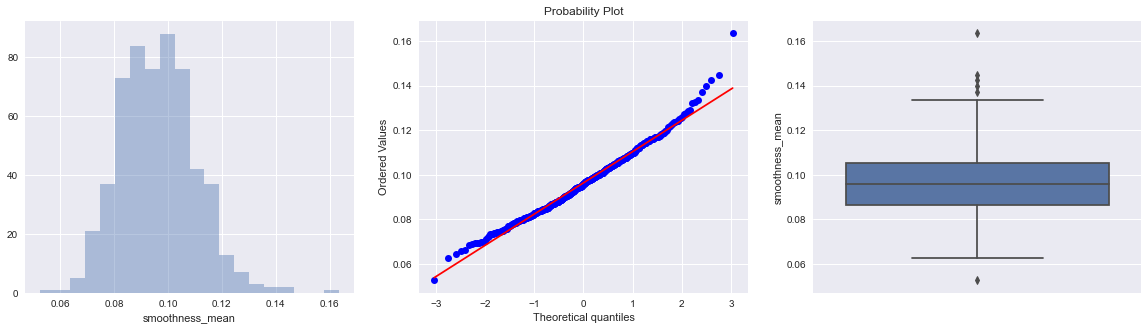

Name of Feature : compactness_mean
Skewness of Feature : 1.1901230311980404


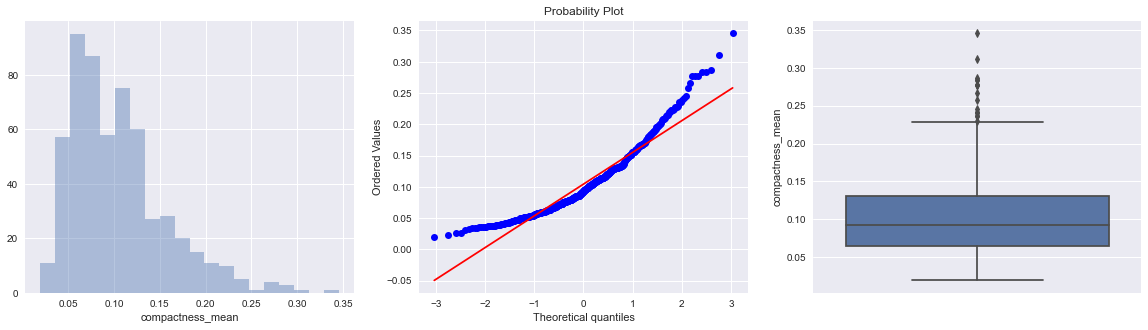

Name of Feature : concavity_mean
Skewness of Feature : 1.4011797389486722


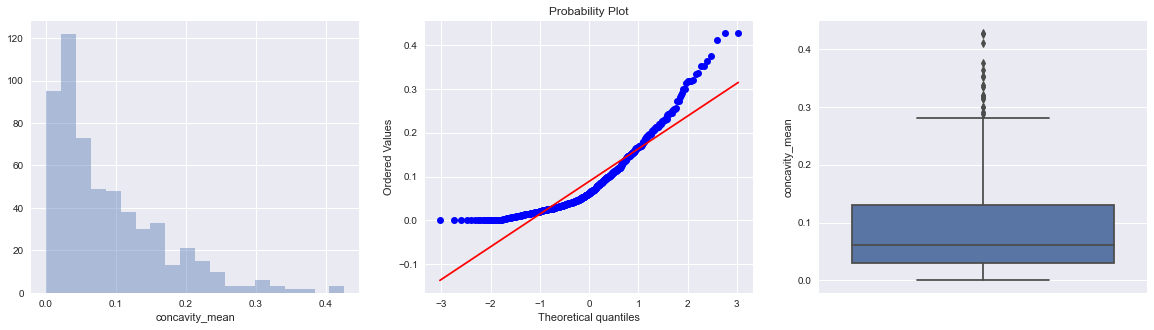

Name of Feature : concave points_mean
Skewness of Feature : 1.1711800812336282


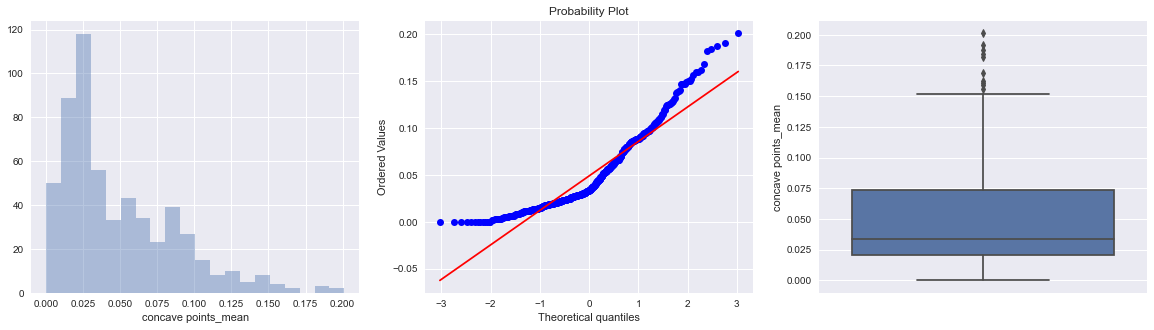

Name of Feature : symmetry_mean
Skewness of Feature : 0.7256089733642002


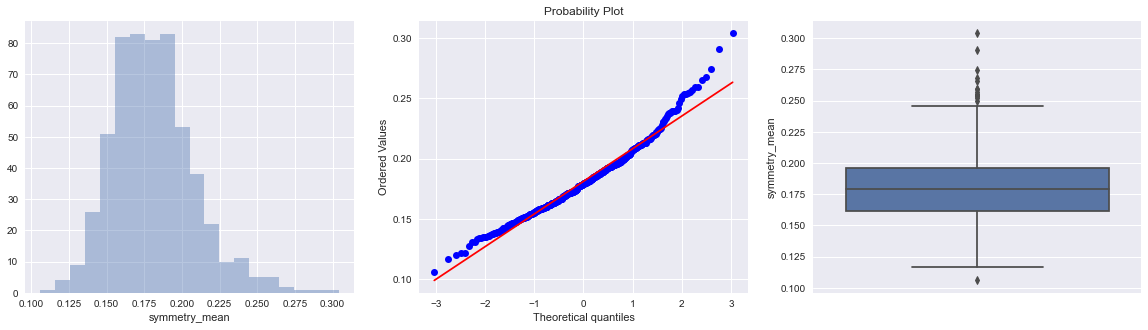

Name of Feature : fractal_dimension_mean
Skewness of Feature : 1.3044888125755076


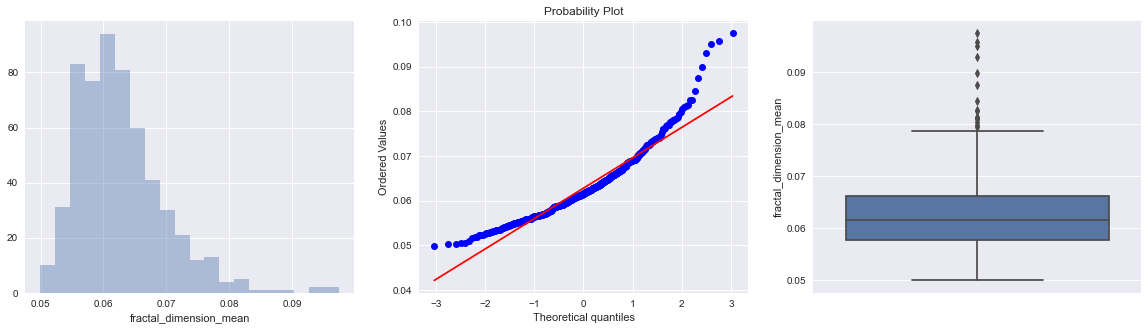

Name of Feature : radius_se
Skewness of Feature : 3.088612166384756


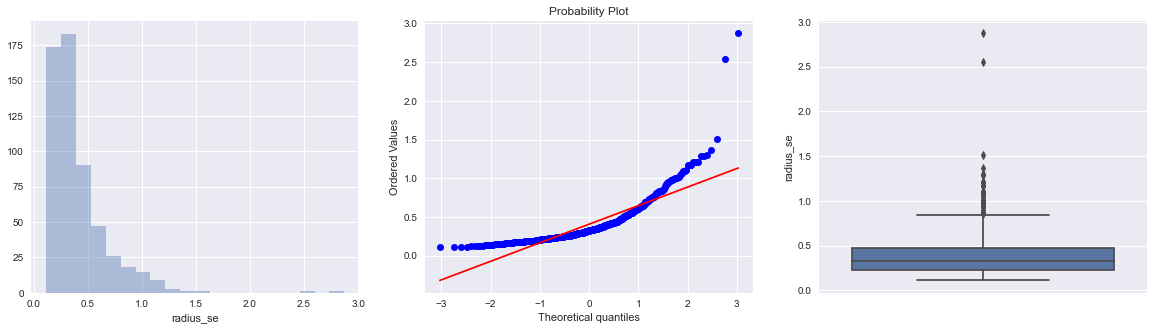

Name of Feature : texture_se
Skewness of Feature : 1.646443808753053


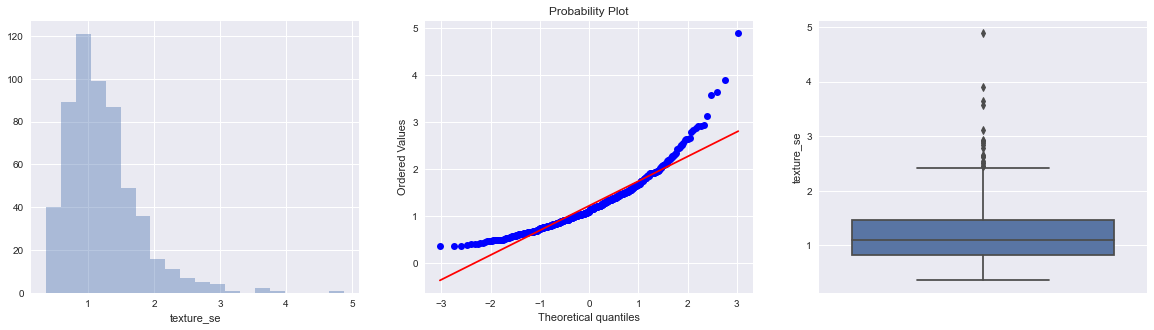

Name of Feature : perimeter_se
Skewness of Feature : 3.4436152021948976


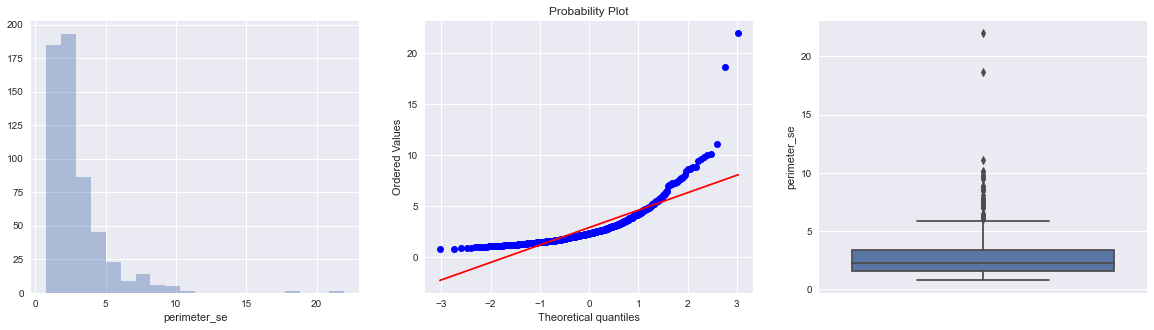

Name of Feature : area_se
Skewness of Feature : 5.447186284898394


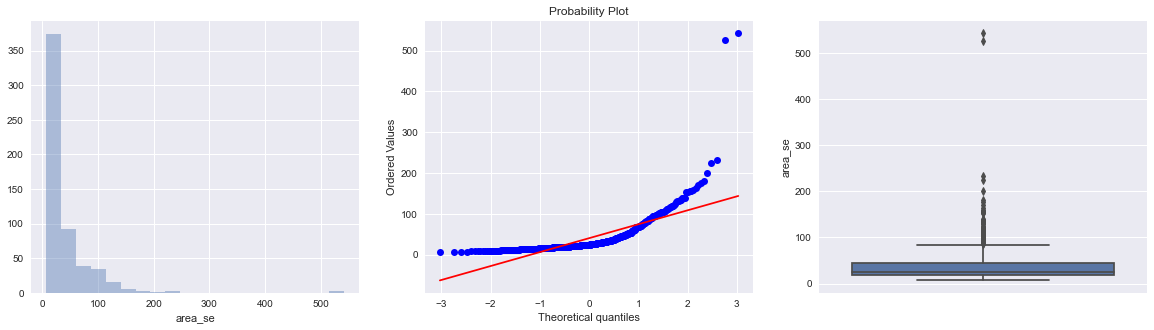

Name of Feature : smoothness_se
Skewness of Feature : 2.314450056636761


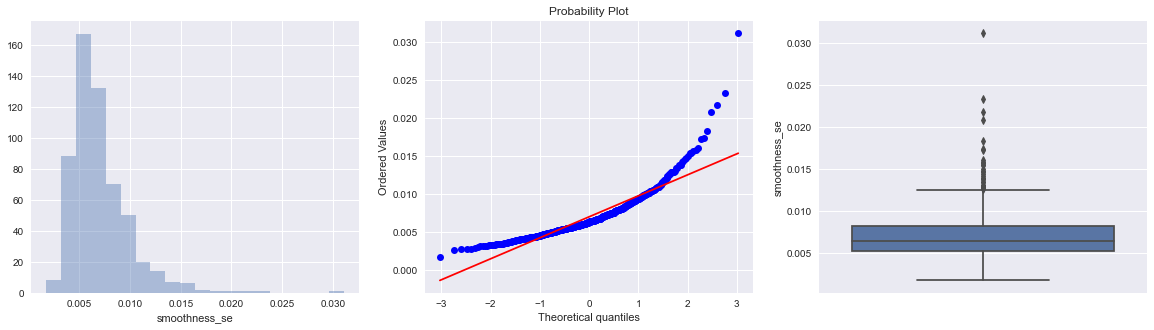

Name of Feature : compactness_se
Skewness of Feature : 1.9022207096378565


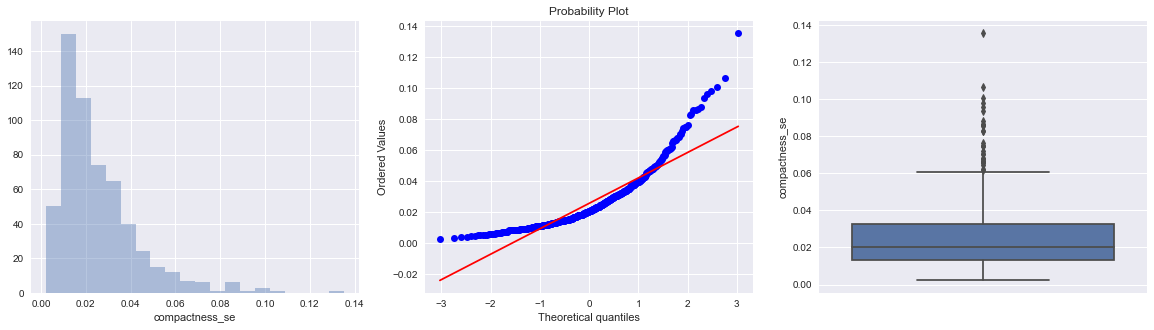

Name of Feature : concavity_se
Skewness of Feature : 5.110463049043661


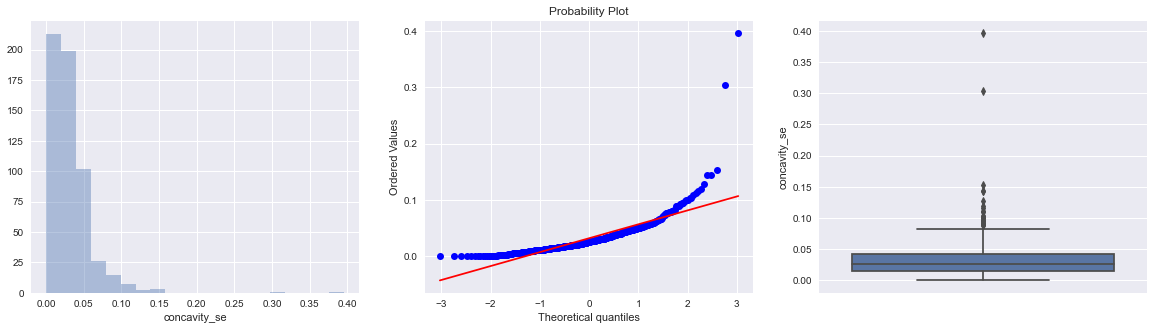

Name of Feature : concave points_se
Skewness of Feature : 1.4446781446974788


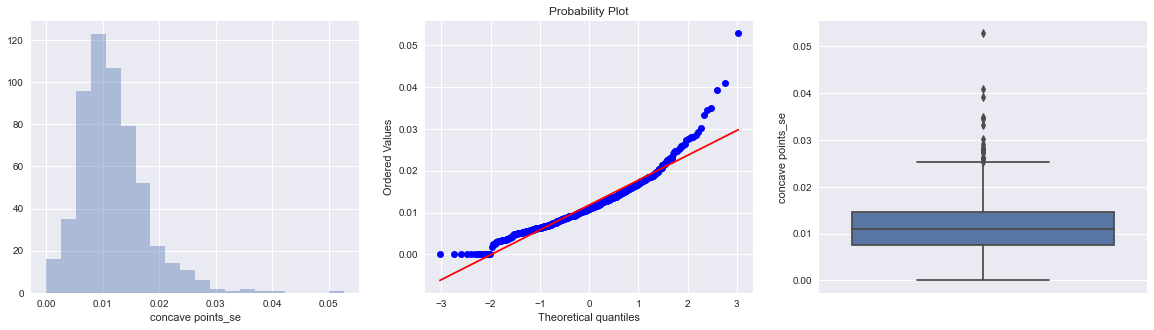

Name of Feature : symmetry_se
Skewness of Feature : 2.195132899547822


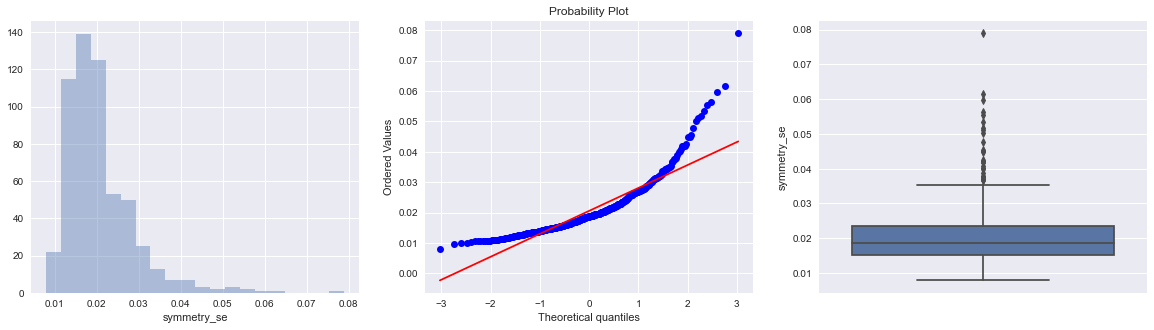

Name of Feature : fractal_dimension_se
Skewness of Feature : 3.923968620227413


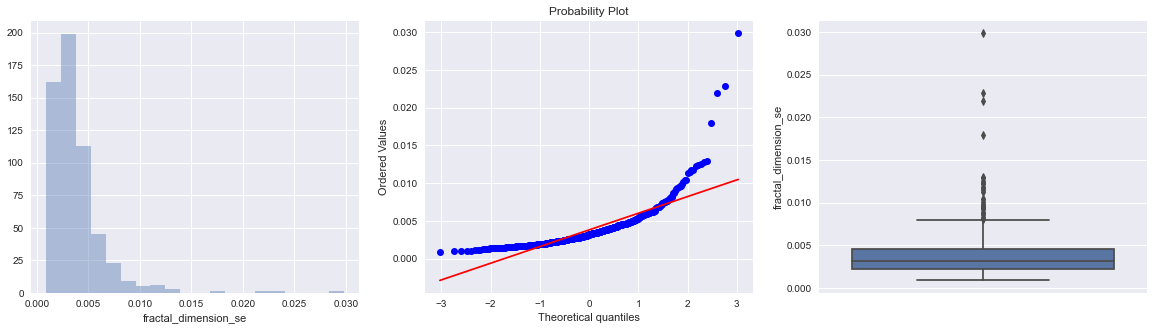

Name of Feature : radius_worst
Skewness of Feature : 1.1031152059604372


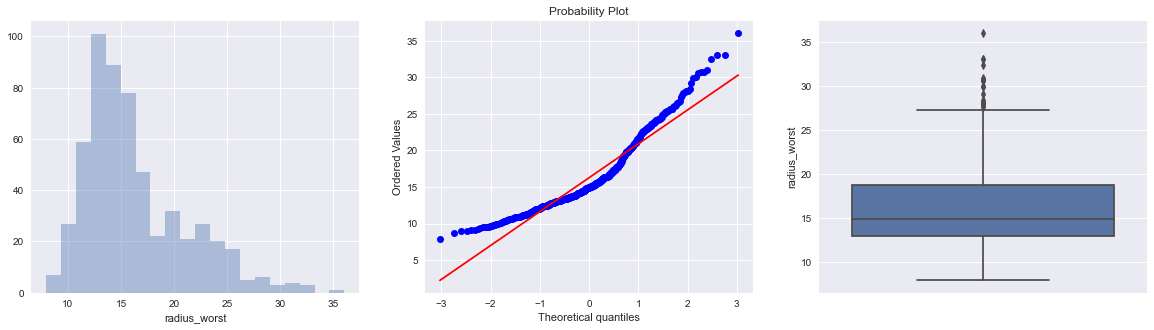

Name of Feature : texture_worst
Skewness of Feature : 0.49832130948716474


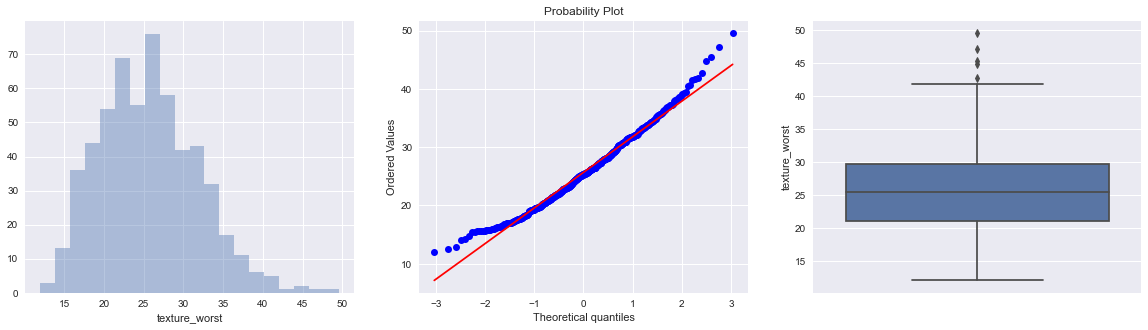

Name of Feature : perimeter_worst
Skewness of Feature : 1.1281638713683722


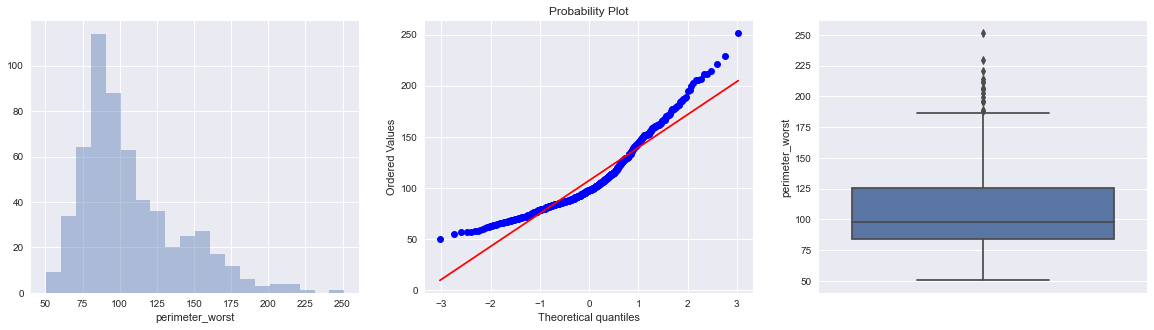

Name of Feature : area_worst
Skewness of Feature : 1.8593732724433467


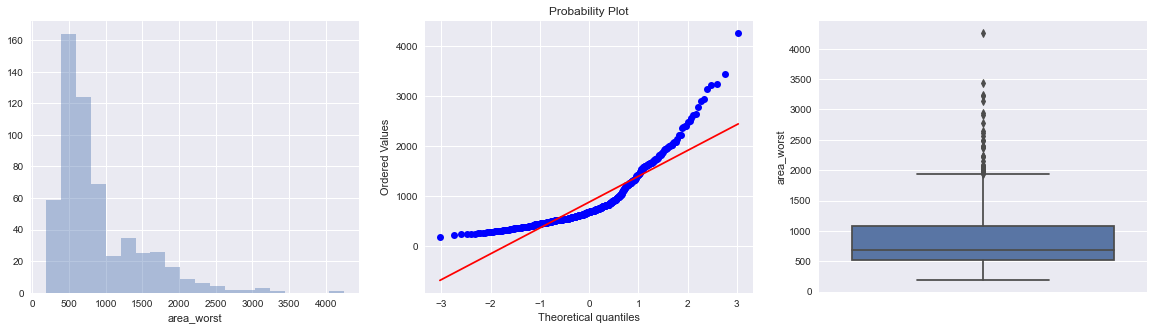

Name of Feature : smoothness_worst
Skewness of Feature : 0.4154259962824678


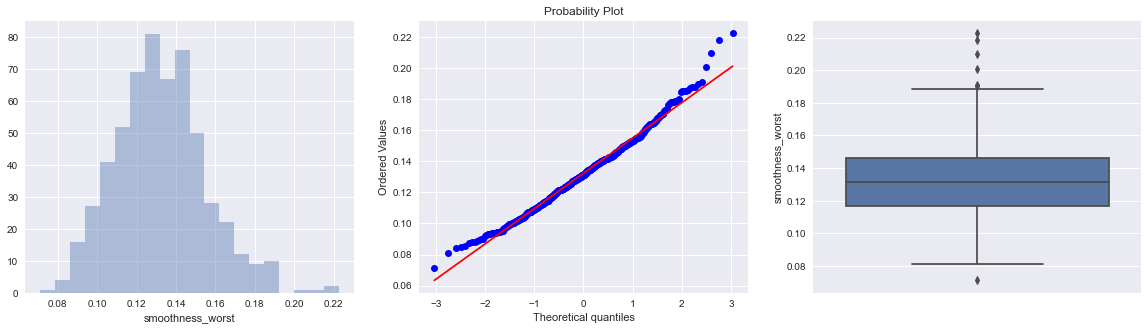

Name of Feature : compactness_worst
Skewness of Feature : 1.4735549003297963


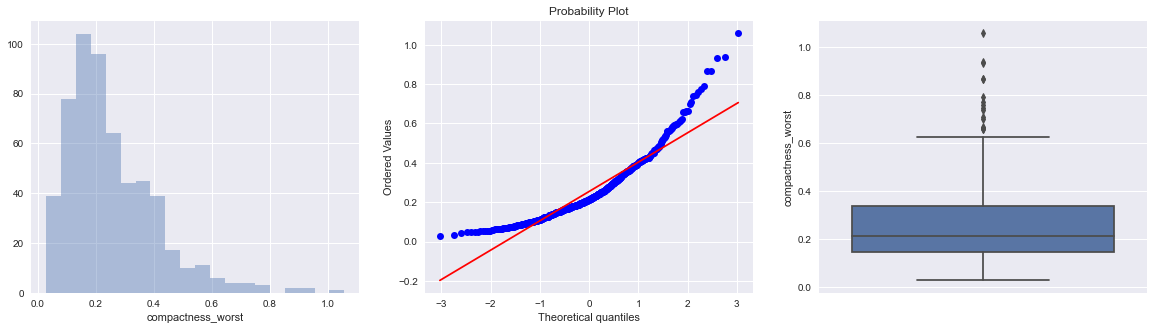

Name of Feature : concavity_worst
Skewness of Feature : 1.1502368219460262


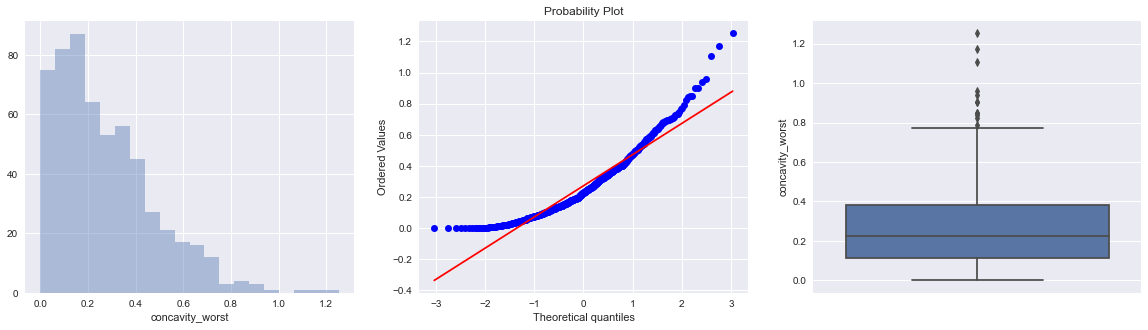

Name of Feature : concave points_worst
Skewness of Feature : 0.49261552688550875


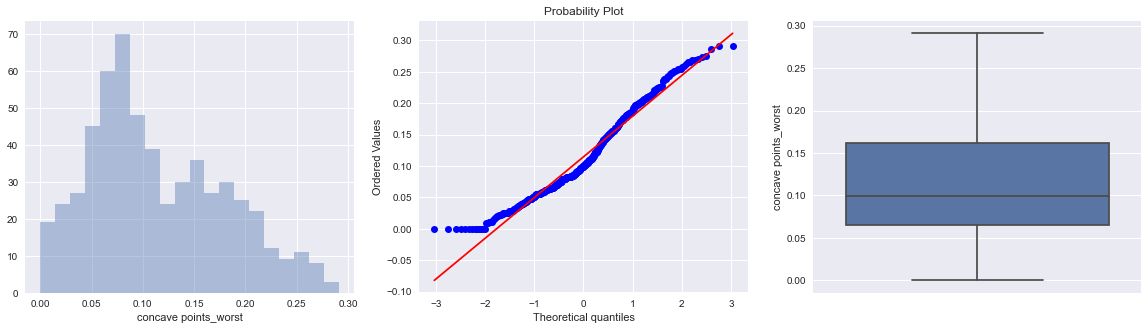

Name of Feature : symmetry_worst
Skewness of Feature : 1.4339277651893279


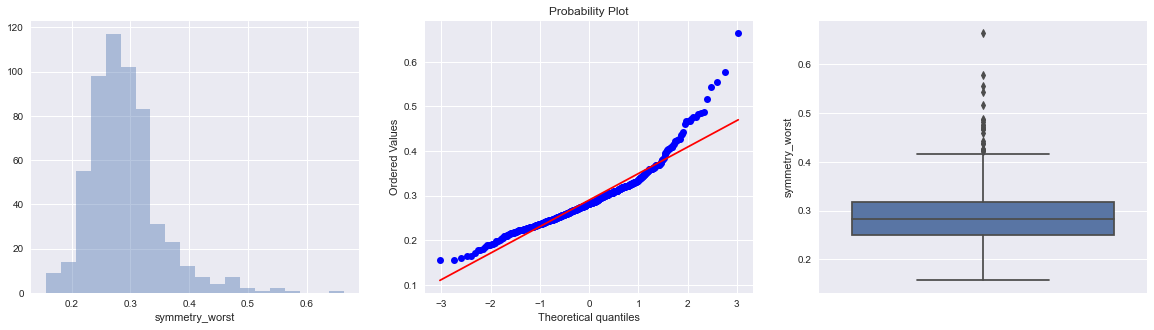

Name of Feature : fractal_dimension_worst
Skewness of Feature : 1.6625792663955172


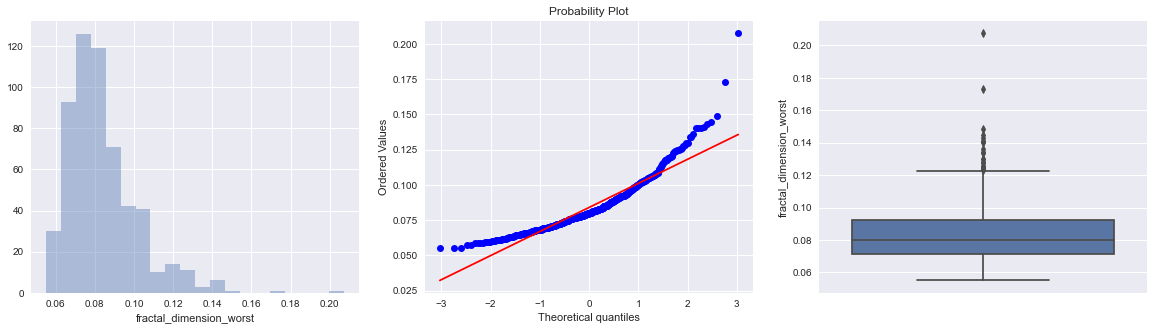

ValueError: not enough values to unpack (expected 2, got 0)

In [7]:
#Function for the outlier analysis

def graphical_outlier_analysis(data):
        '''
        This function shall be used for the outlier analysis of data with the help of histogram, qq plot
        and boxplot. This function provides the skewness for the feature.
        '''

    
        for col in data:
            print('Name of Feature :',col)
            print('Skewness of Feature :',data[col].skew())
            plt.figure(figsize=(20,5))
            plt.subplot(1,3,1)
            sns.distplot(data[col],bins=20,kde=False)
            plt.subplot(1,3,2)
            stats.probplot(data[col],dist='norm',plot=plt)
            plt.subplot(1,3,3)
            sns.boxplot(y=data[col])
            plt.show()        
            #calculating the outliers with IQR
        Feature_Name=[], Outliers_Number=[],Percentage_of_Outliers=[],Skewness=[]
            
        for col in data:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
                
            Outliers=((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
            Outliers_Number.append(Outliers)
            Percentage=(Outliers*100)/len(data[col])
            Percentage_of_Outliers.append(Percentage)
            Skewness.append(data[col].skew())
            Feature_Name.append(col)
   
#Calling the Functionabs
graphical_outlier_analysis(X)

- From the above analysis it is clear that. In case of independent features most of the data are in the IQR range and the skewness of the most of the featues are in the range of 0 to 1. Also from the analysis of histograms for numerical independent features it is clear that most of the features are normaly distributed. Hence in case of the independent features there is not need of feature transformation.

- Bivariate Analysis
<br>
- Lets draw the Correlation plot to understand the relation between the independent numerical features.

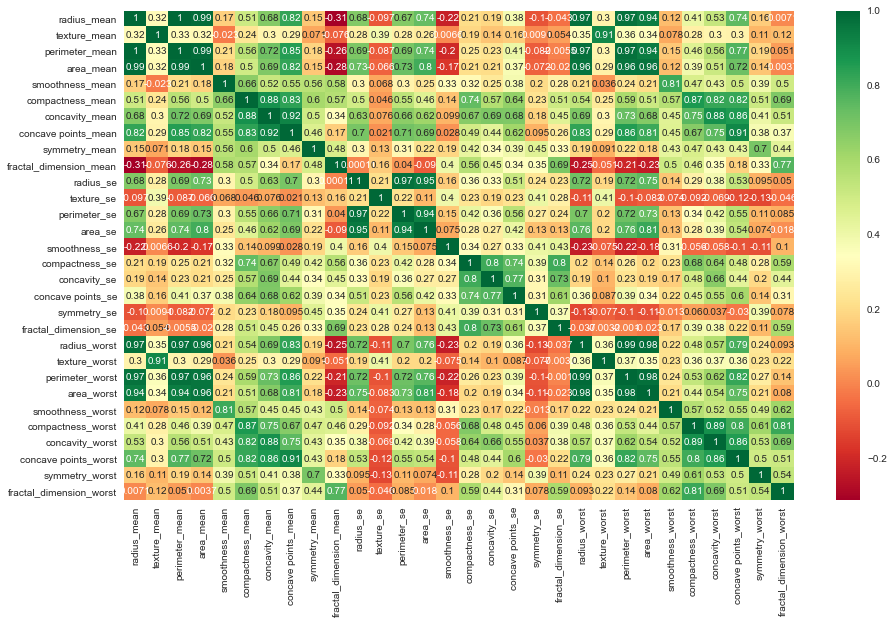

In [8]:
#Function for corr plot
def correlation_plot(data):
            plt.figure(figsize=(15,9))  
            p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 
            
            
#Calling the function
correlation_plot(X)

- From the above correlation plot it is clear that some independent numerical features and highly positively correlated while some are negatively correlated.

- Bivariate analysis with the help of joint plot  :
- Lets analyze the relationship between two independent numerical fetures to understand the realtionship between them

<Figure size 1080x720 with 0 Axes>

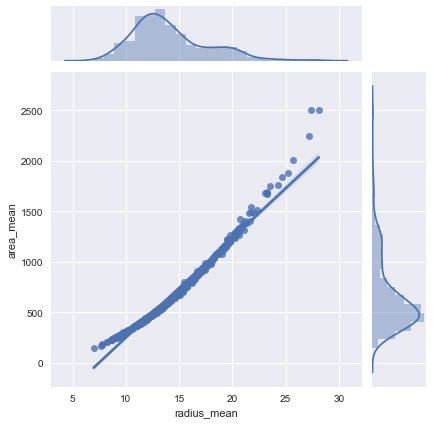

<Figure size 1080x720 with 0 Axes>

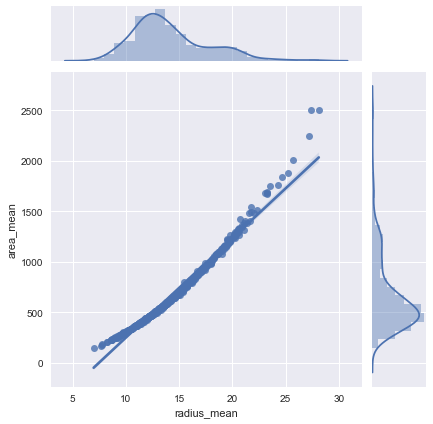

<Figure size 1080x720 with 0 Axes>

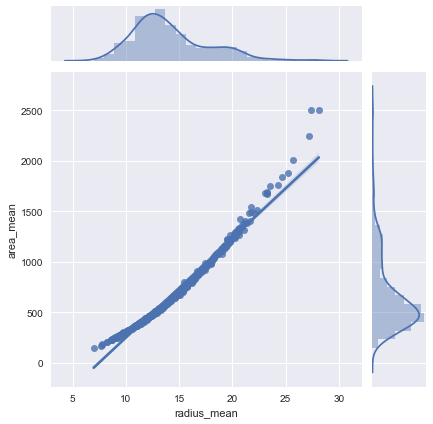

<Figure size 1080x720 with 0 Axes>

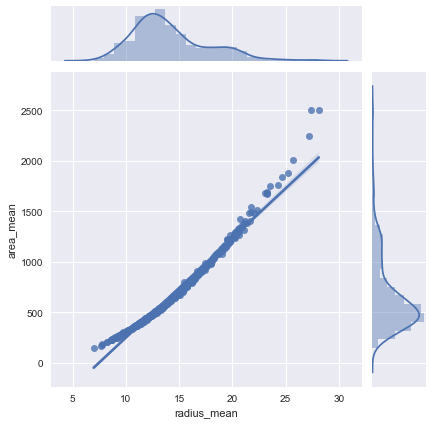

<Figure size 1080x720 with 0 Axes>

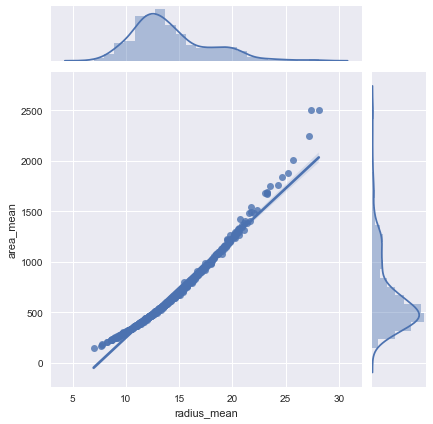

<Figure size 1080x720 with 0 Axes>

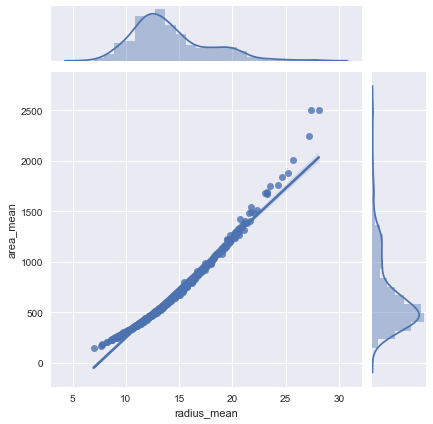

<Figure size 1080x720 with 0 Axes>

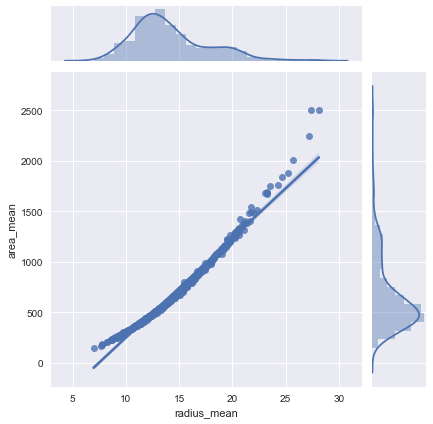

<Figure size 1080x720 with 0 Axes>

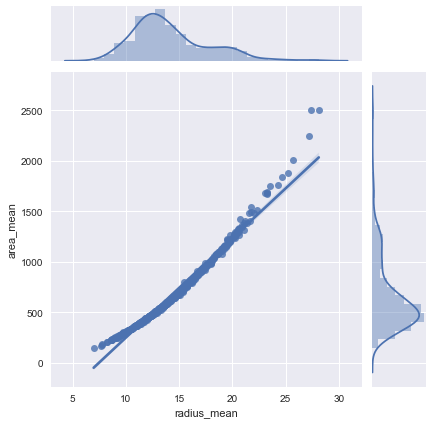

<Figure size 1080x720 with 0 Axes>

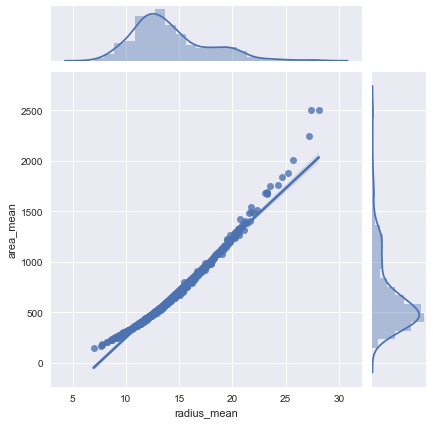

<Figure size 1080x720 with 0 Axes>

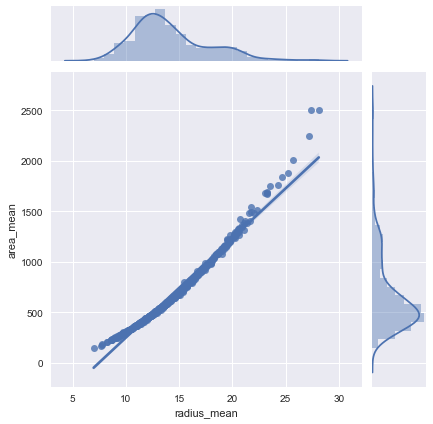

<Figure size 1080x720 with 0 Axes>

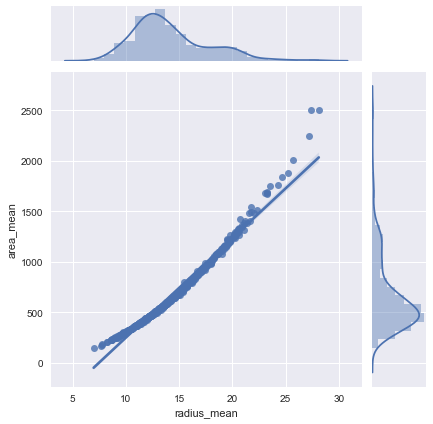

<Figure size 1080x720 with 0 Axes>

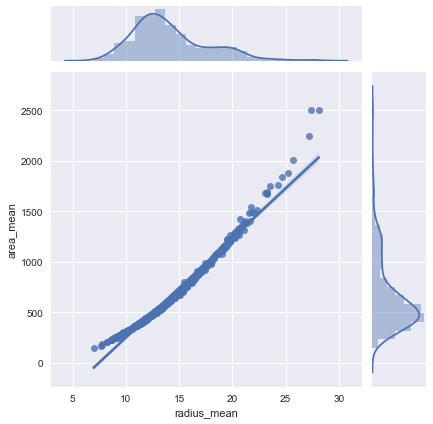

<Figure size 1080x720 with 0 Axes>

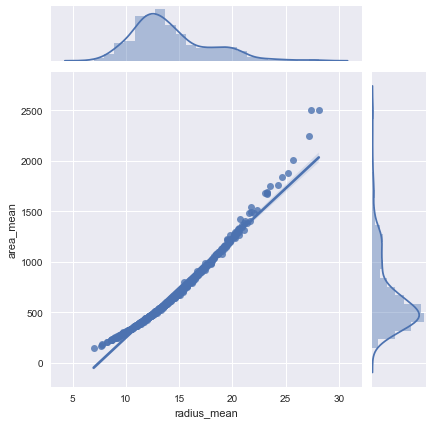

<Figure size 1080x720 with 0 Axes>

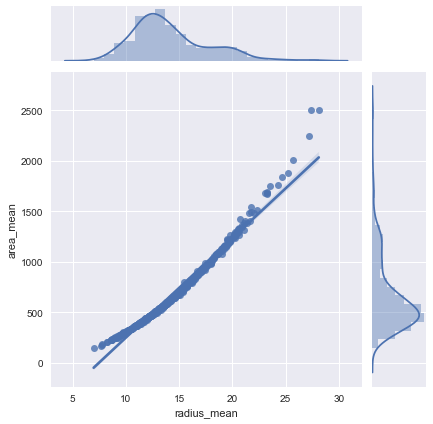

<Figure size 1080x720 with 0 Axes>

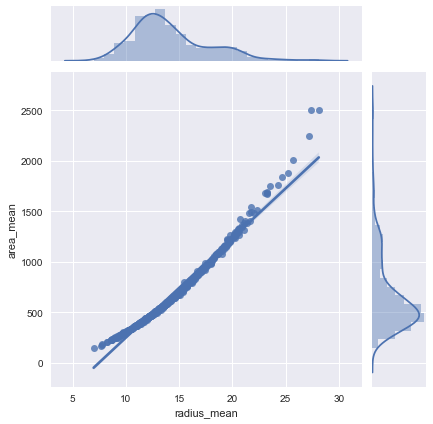

<Figure size 1080x720 with 0 Axes>

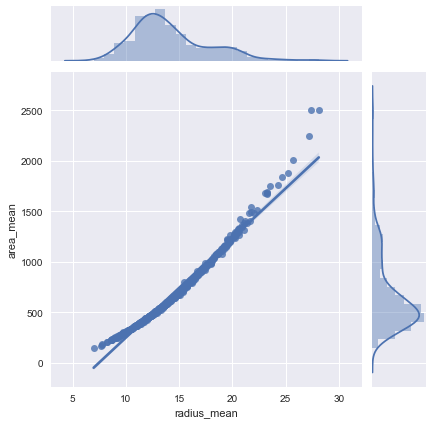

<Figure size 1080x720 with 0 Axes>

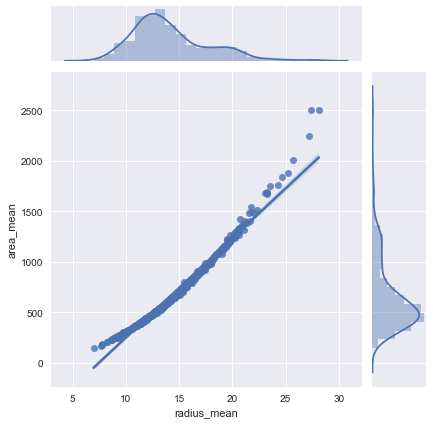

<Figure size 1080x720 with 0 Axes>

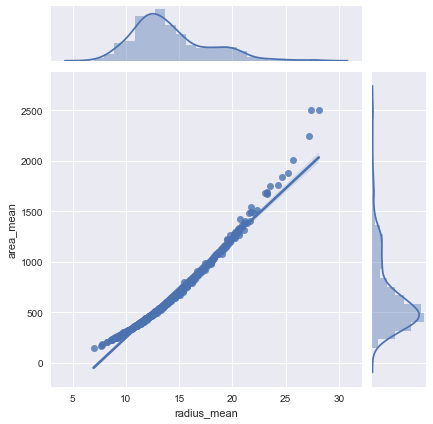

<Figure size 1080x720 with 0 Axes>

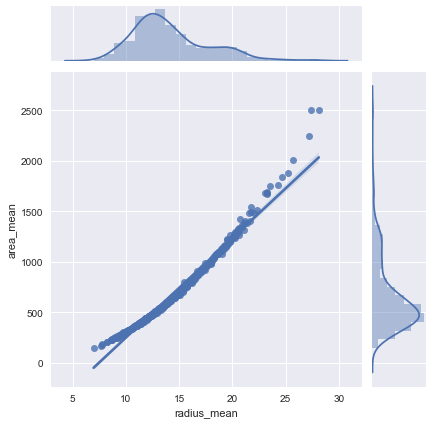

<Figure size 1080x720 with 0 Axes>

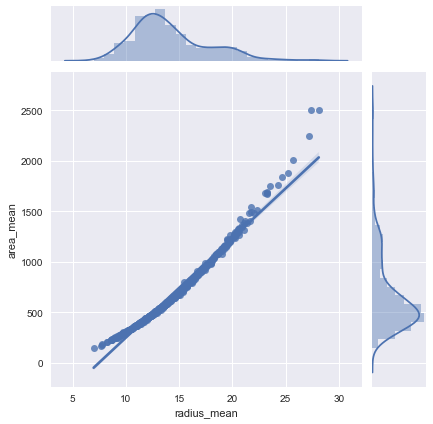

<Figure size 1080x720 with 0 Axes>

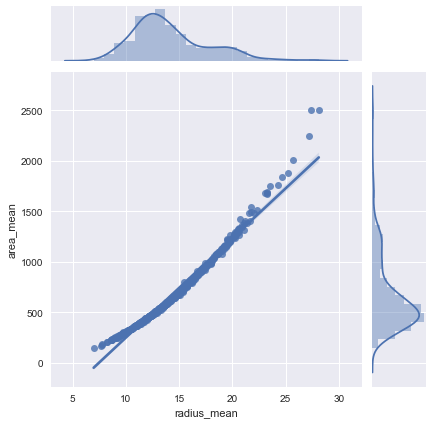

<Figure size 1080x720 with 0 Axes>

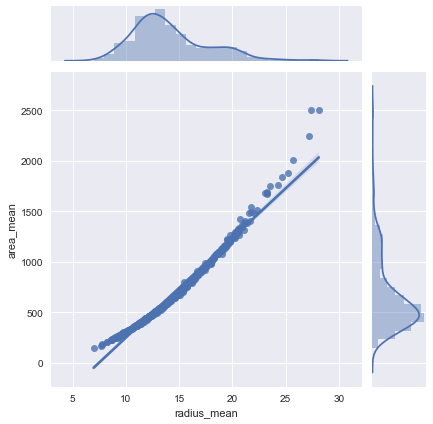

<Figure size 1080x720 with 0 Axes>

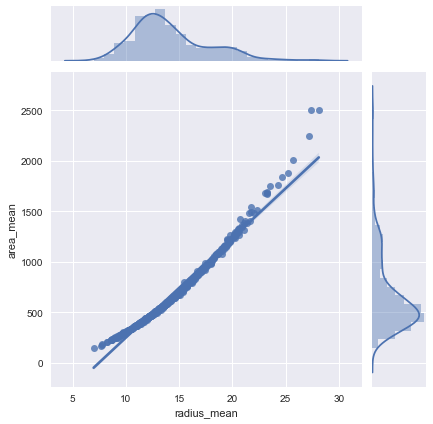

<Figure size 1080x720 with 0 Axes>

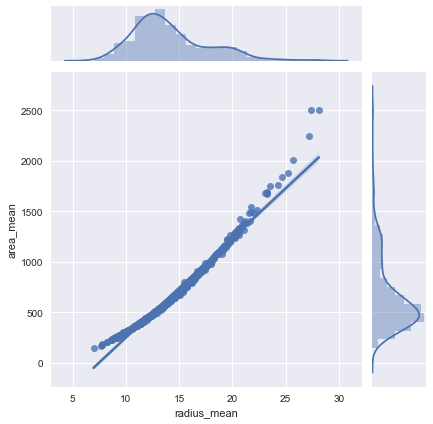

<Figure size 1080x720 with 0 Axes>

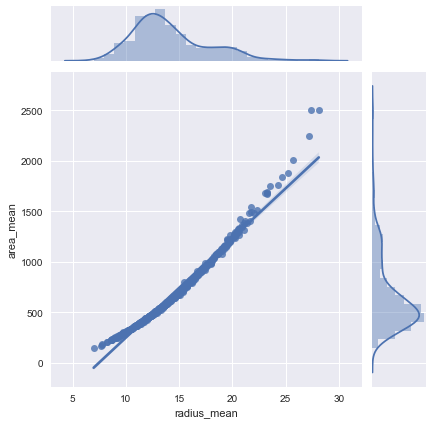

<Figure size 1080x720 with 0 Axes>

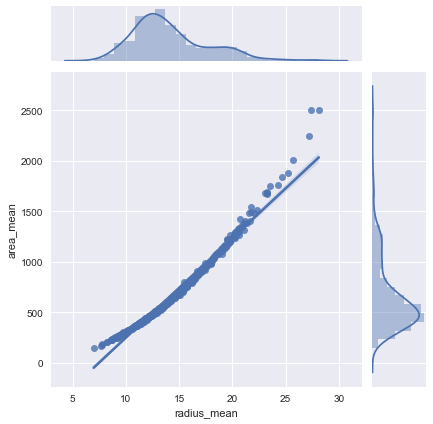

<Figure size 1080x720 with 0 Axes>

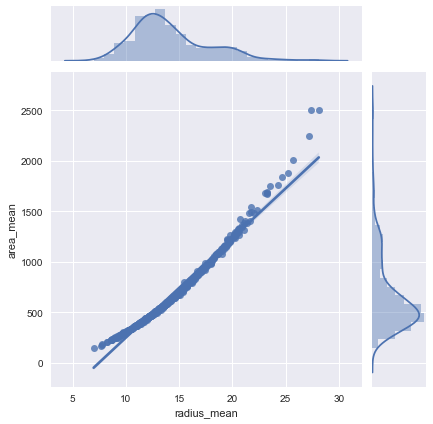

<Figure size 1080x720 with 0 Axes>

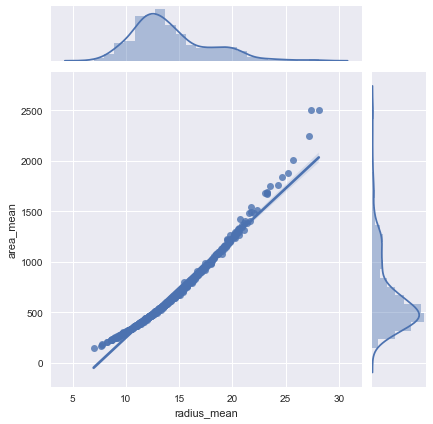

<Figure size 1080x720 with 0 Axes>

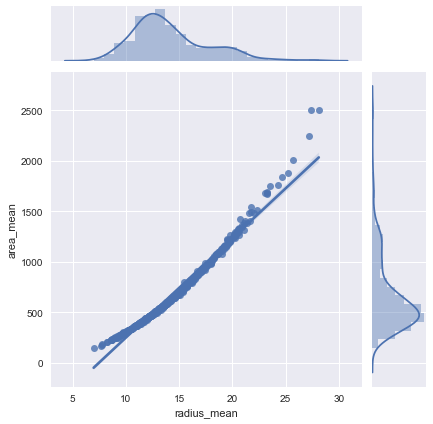

<Figure size 1080x720 with 0 Axes>

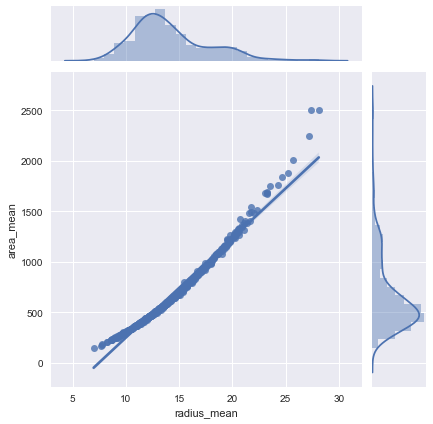

In [9]:
#Jointplot for the bivariate analysis
def bivariate_numerical(data,feature1,feature2) :
    plt.figure(figsize = (15,10))
    sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
    plt.show()
    
#calling the function
for col in X:
    bivariate_numerical(data,'radius_mean',col)

- From the above joint plot it is clear that most of the independent numerical features are correlated with each other. There is relationship exists between the some of the independent featuers. Hence there is the problem of multicollinearity in the dataset.

- Lets analyze the univariate categorical feature. This feture is dependent feature

Percentage of datapoints present in class : 

 B    62.741652
M    37.258348
Name: diagnosis, dtype: float64


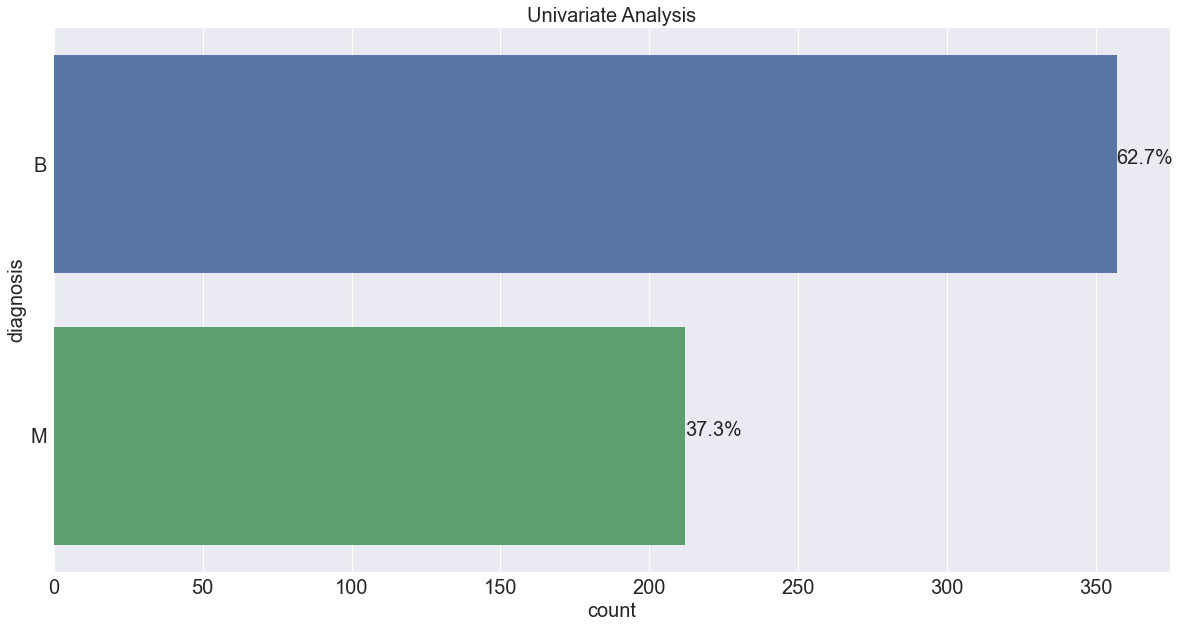

In [10]:
#Function to draw the count plot 
def univariate_analysis_categorical_countplot(data,label):
    plt.figure(figsize=(20,10))
    ax=sns.countplot(y=data[label],data=data,order = data[label].value_counts().index)
    ax.axes.set_title('Univariate Analysis',fontsize=20)
    ax.set_ylabel(label,fontsize=20)
    ax.set_xlabel('count',fontsize=20)
    ax.tick_params(labelsize=20)
    
    total = len(data[label])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=20)
    
    print('Percentage of datapoints present in class : \n\n',(data[label].value_counts()/data[label].count())*100)
        
    plt.show()
    
#Calling the function
    
univariate_analysis_categorical_countplot(data,'diagnosis')

- From the above graph it is clear that there is class imbalance present in the dependent feature. From above analysis we can see that B class is 62% and M class is 37% . Hence there is the imbalance present inside the dataset. We need to treat this class imbalance with the help of oversampling technique.

- Bivariate Analysis
- Lets analyze the dependent and independent features with the help of barplot

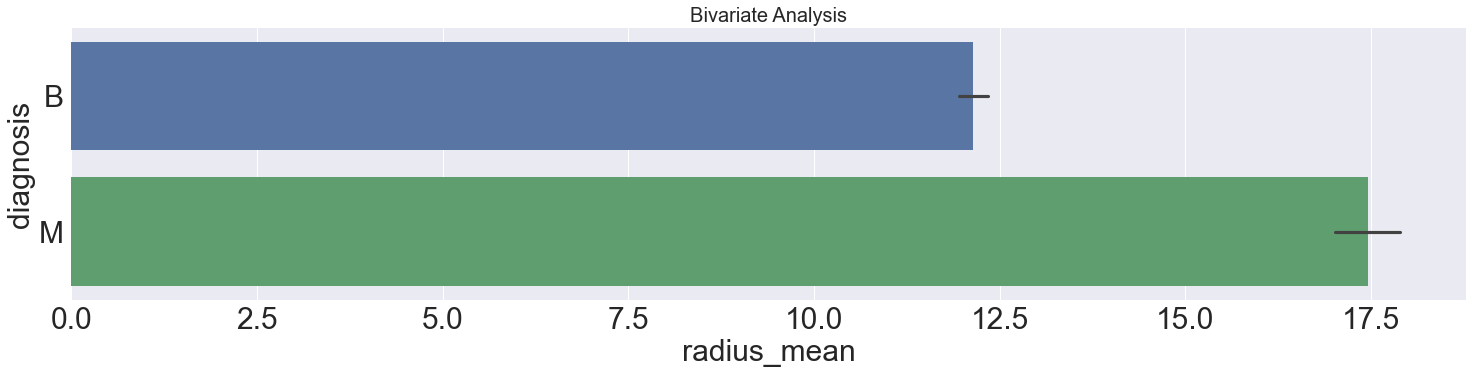

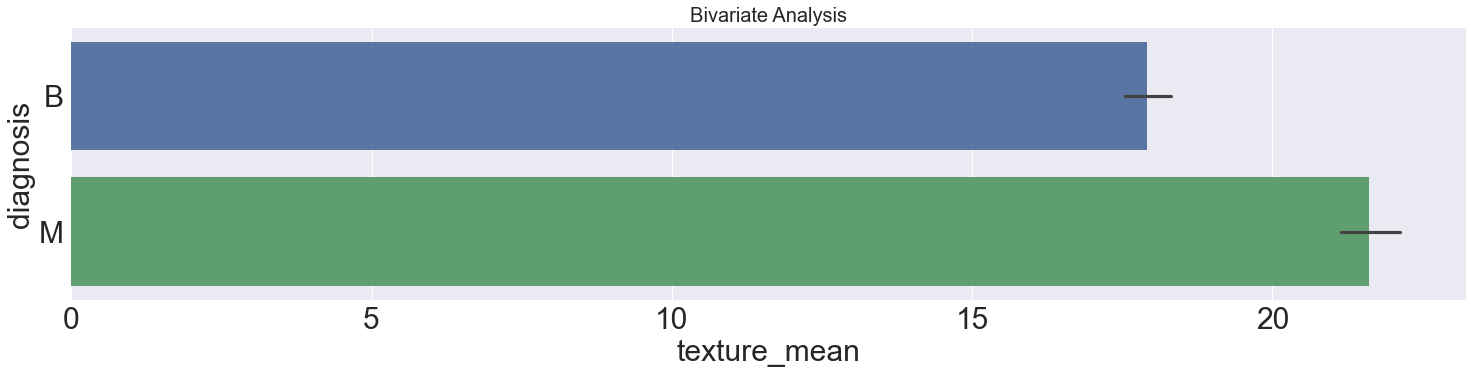

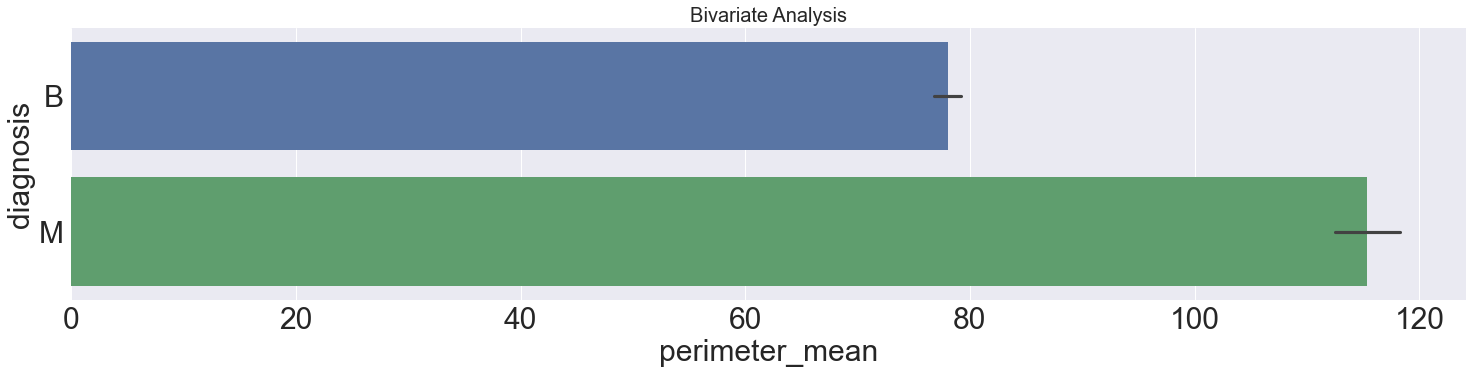

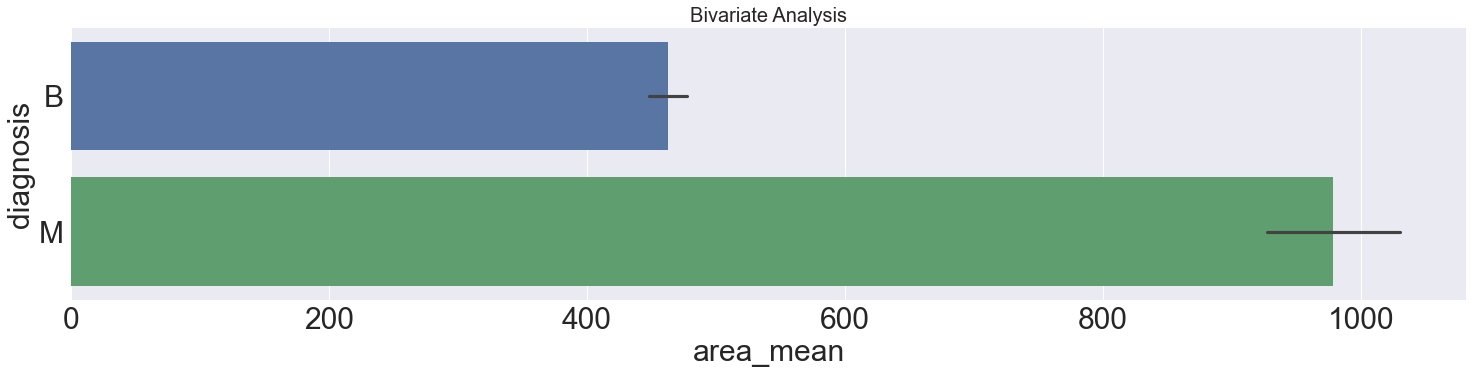

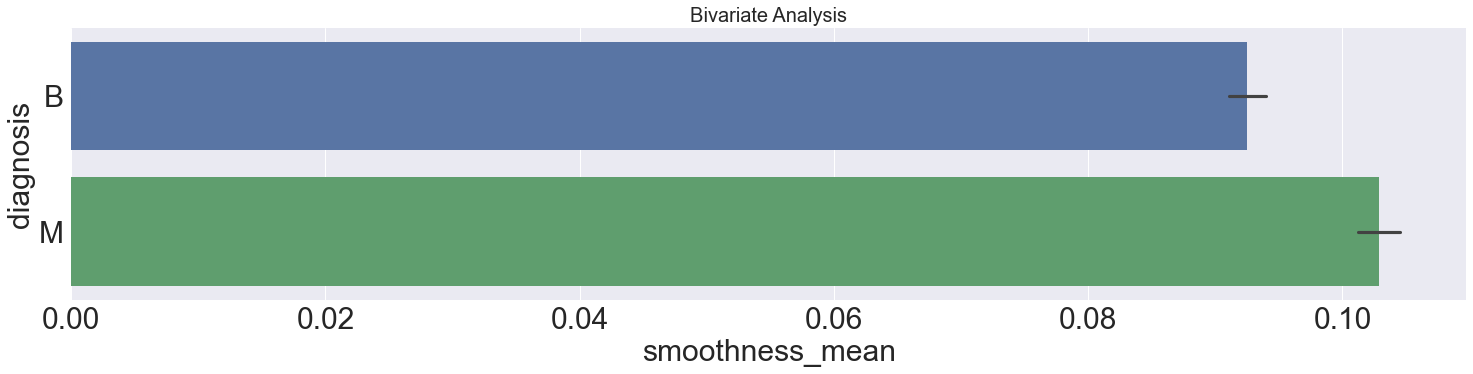

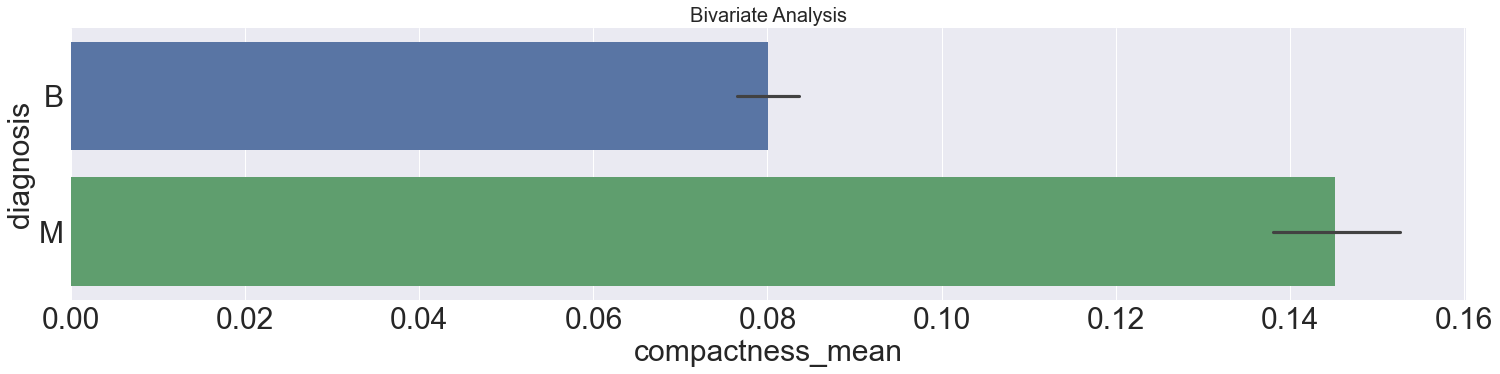

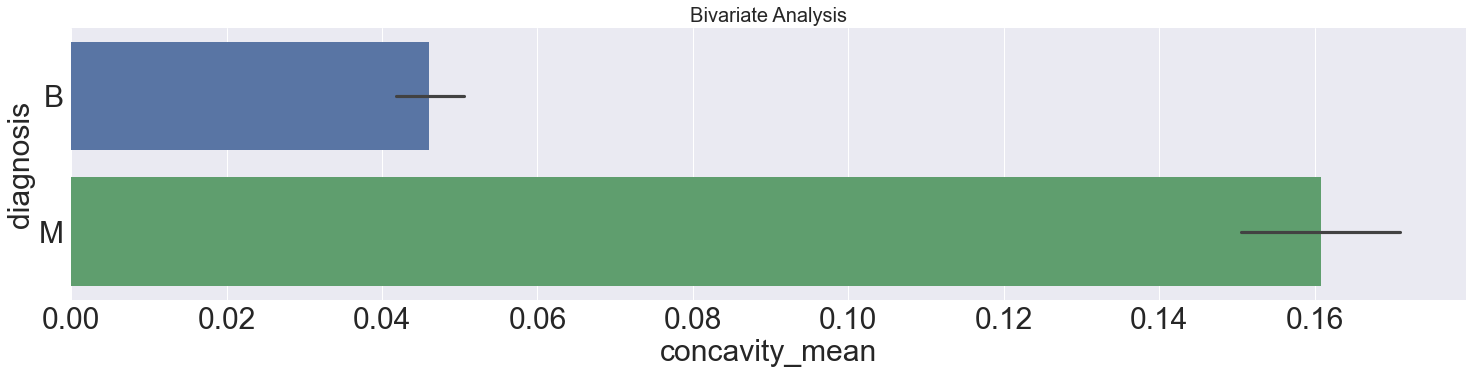

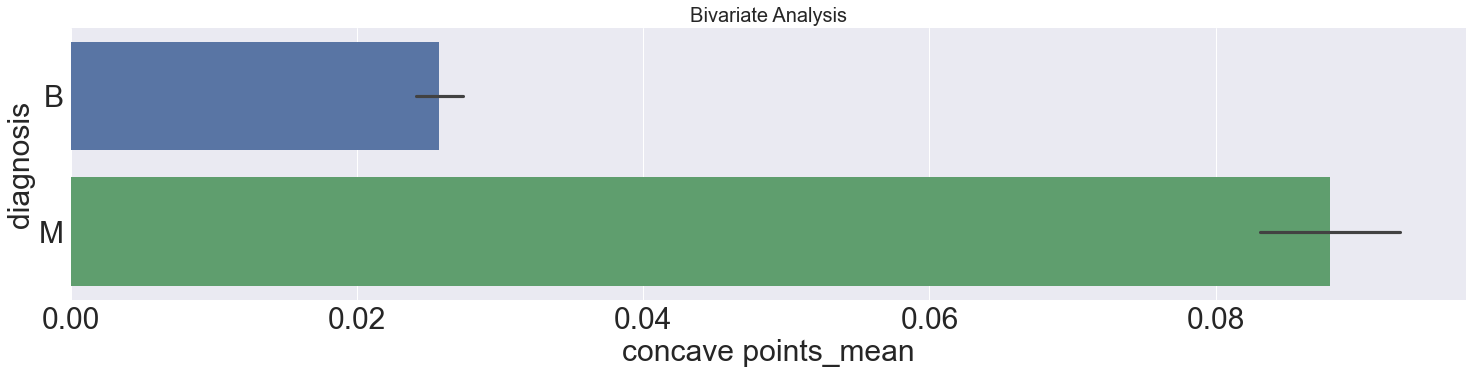

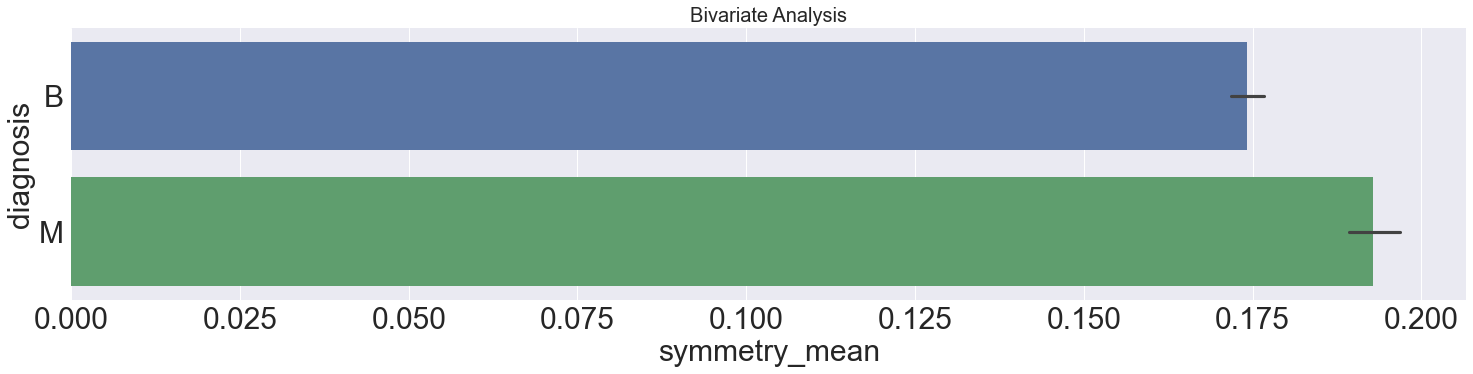

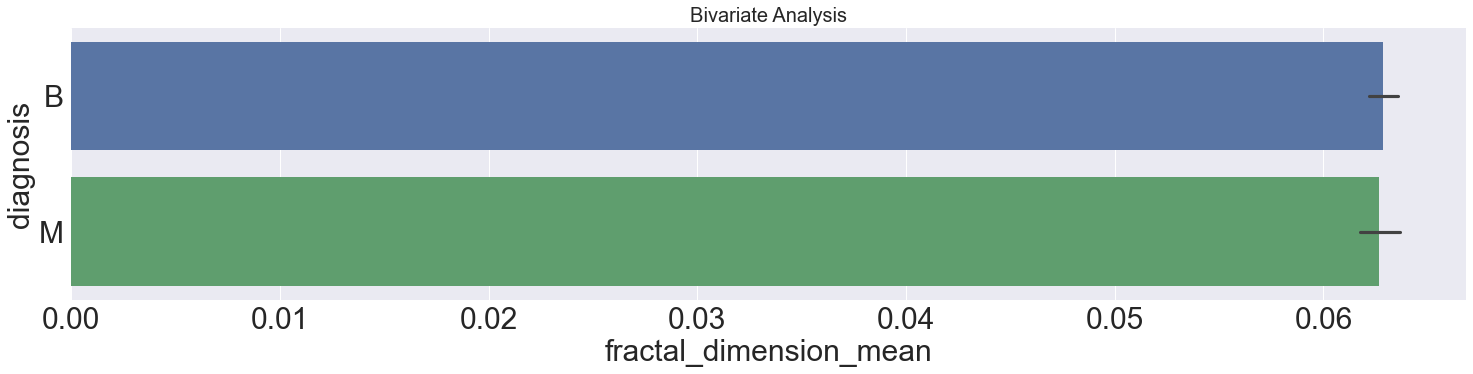

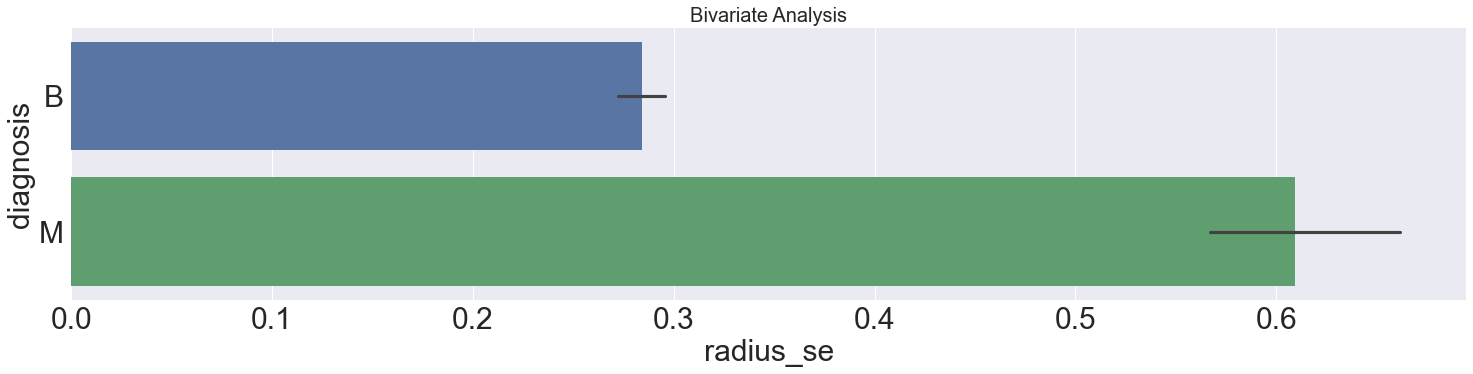

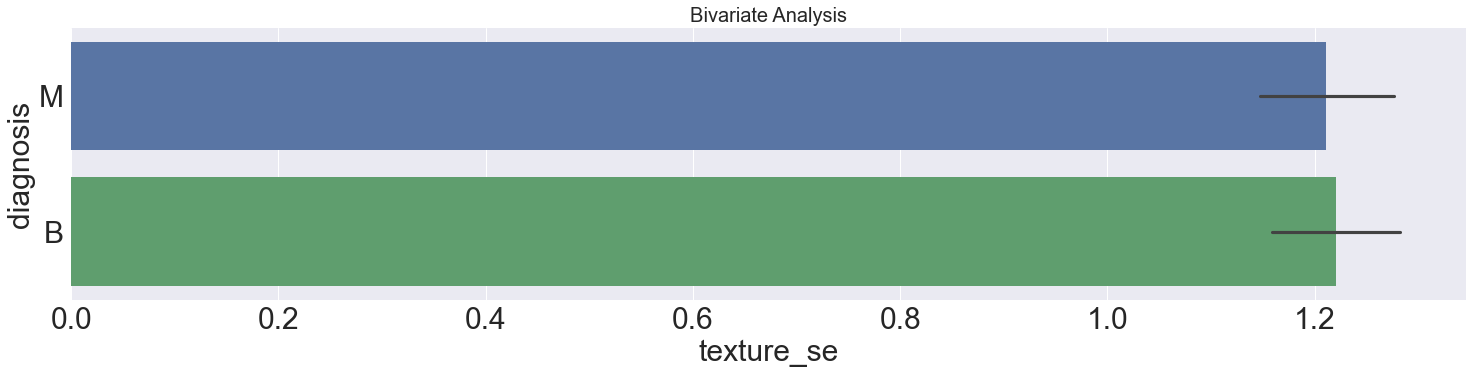

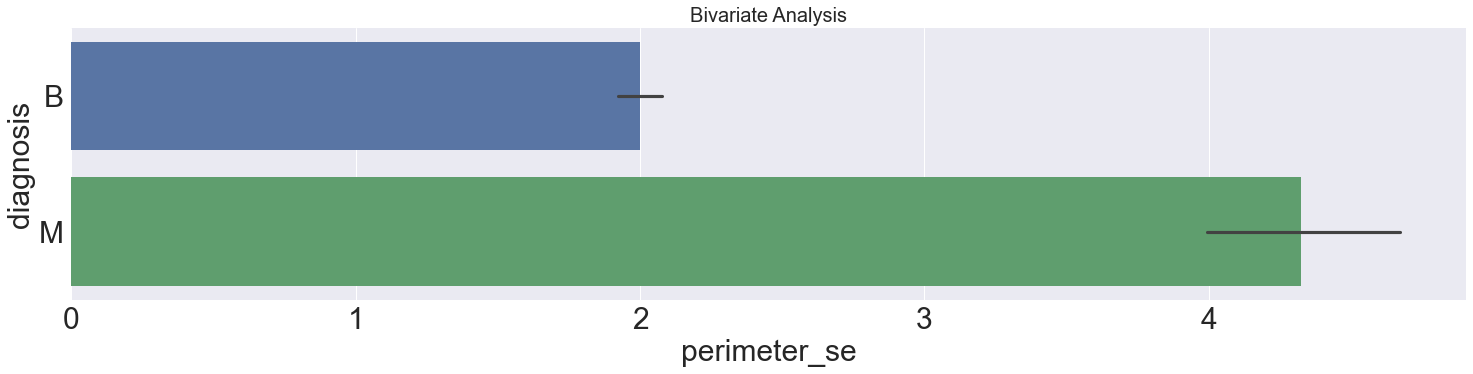

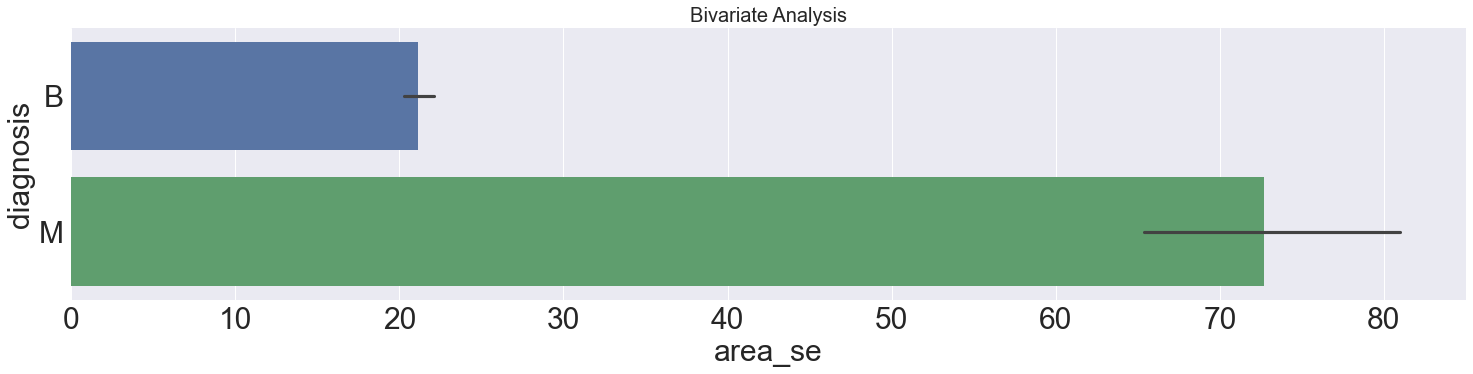

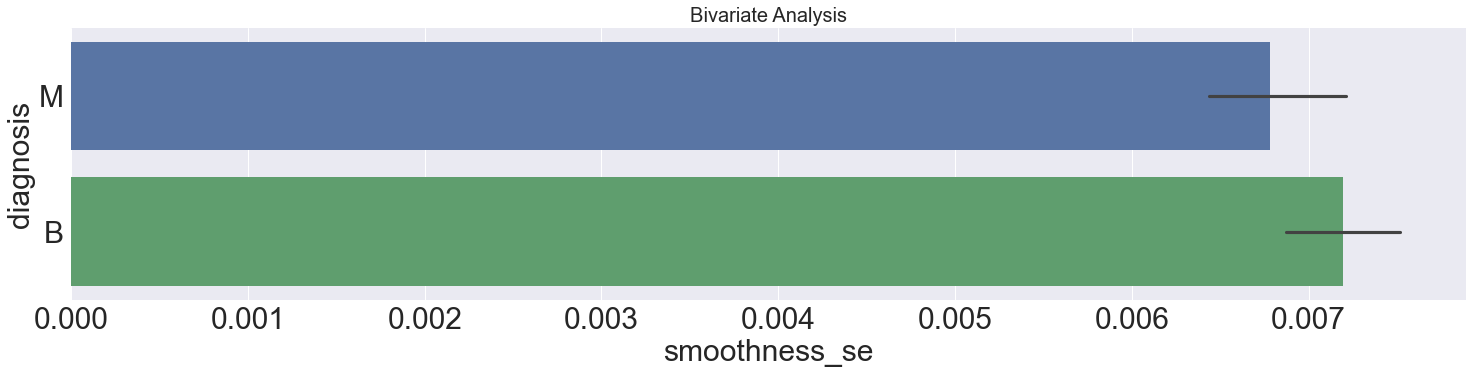

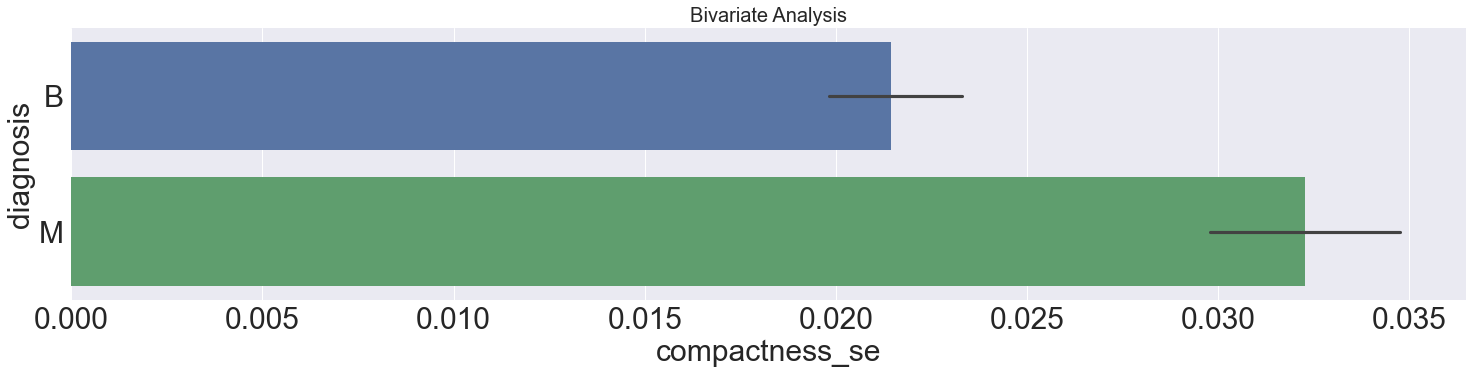

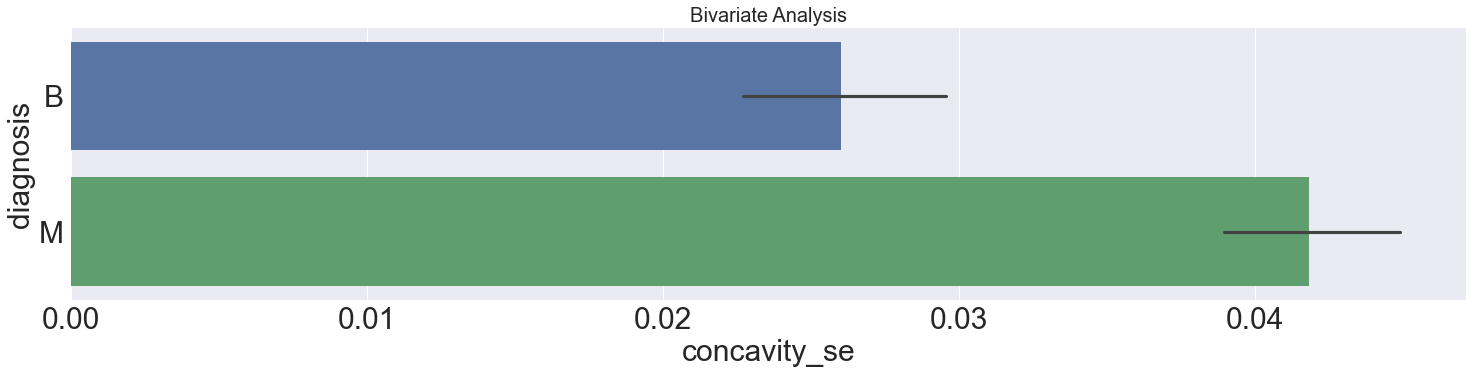

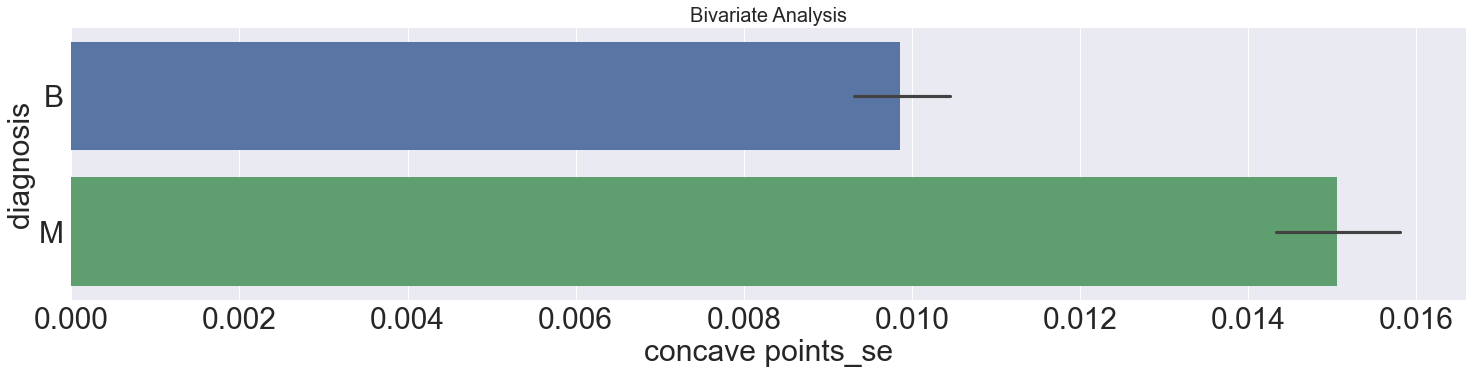

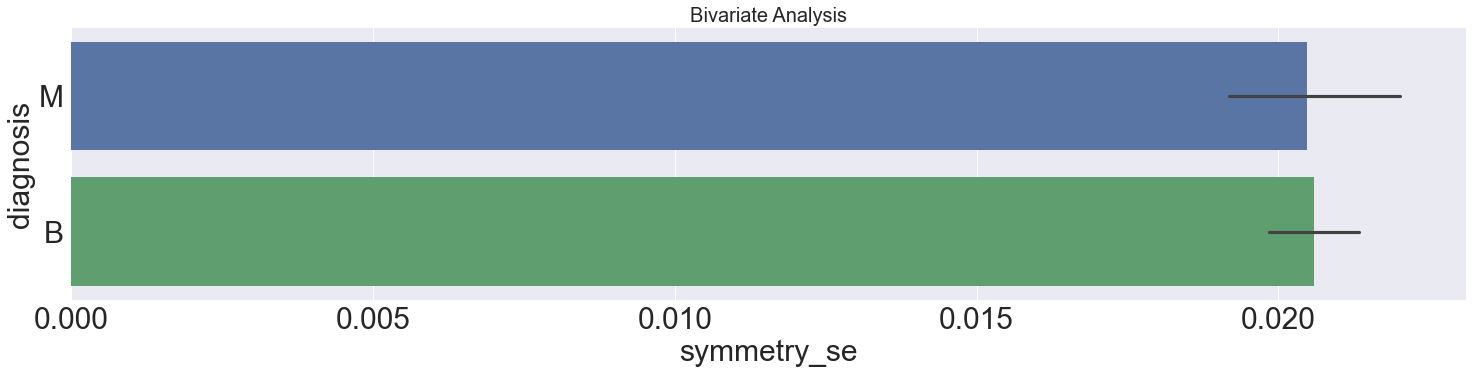

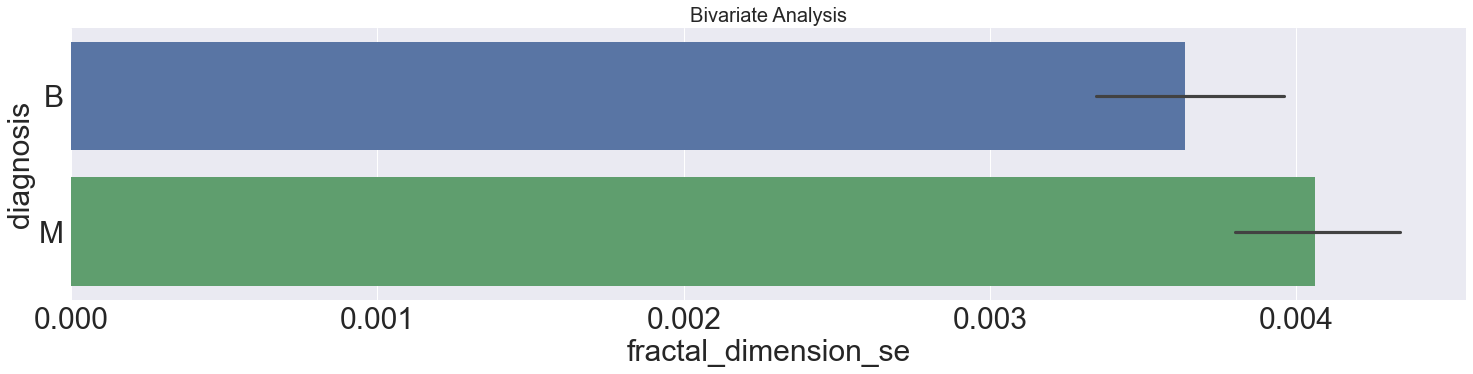

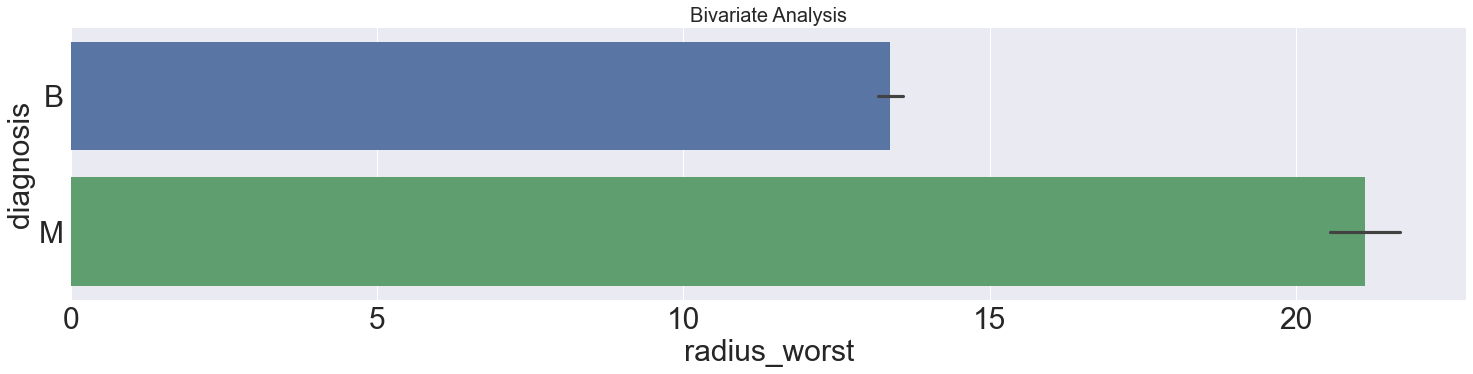

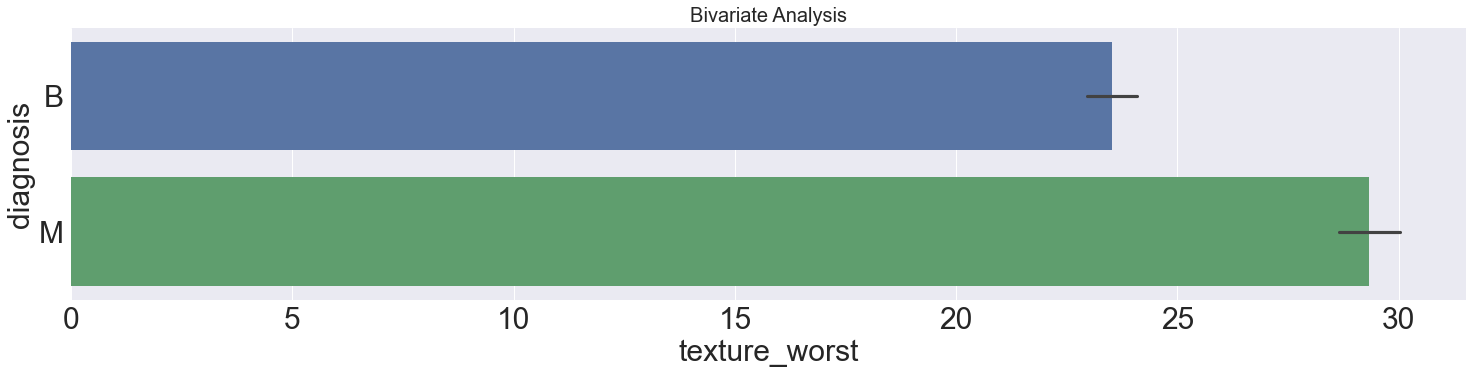

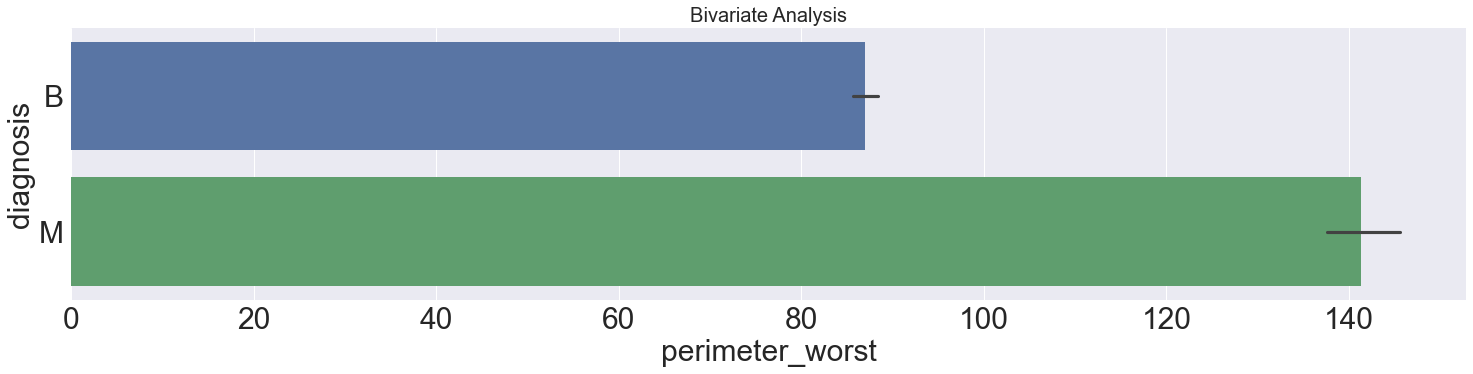

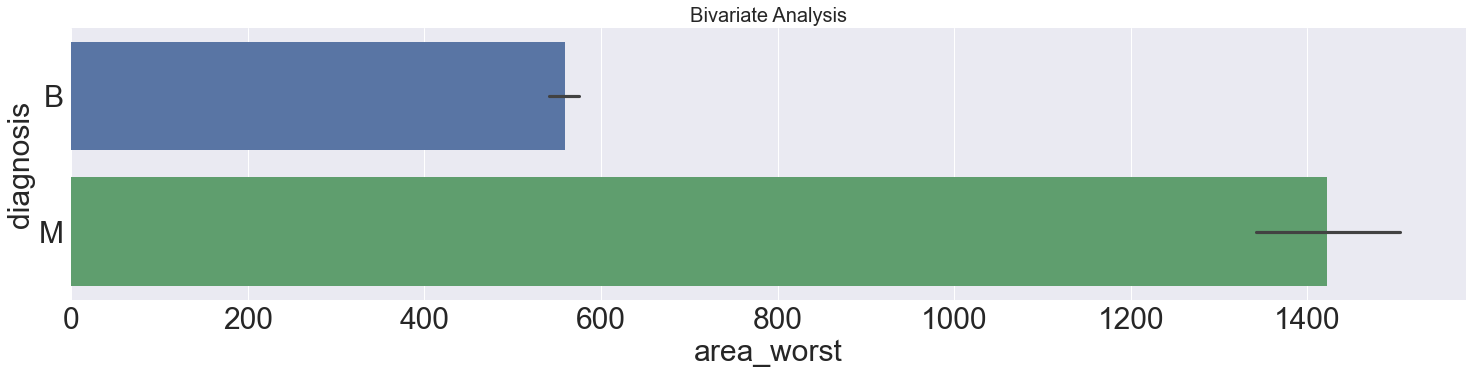

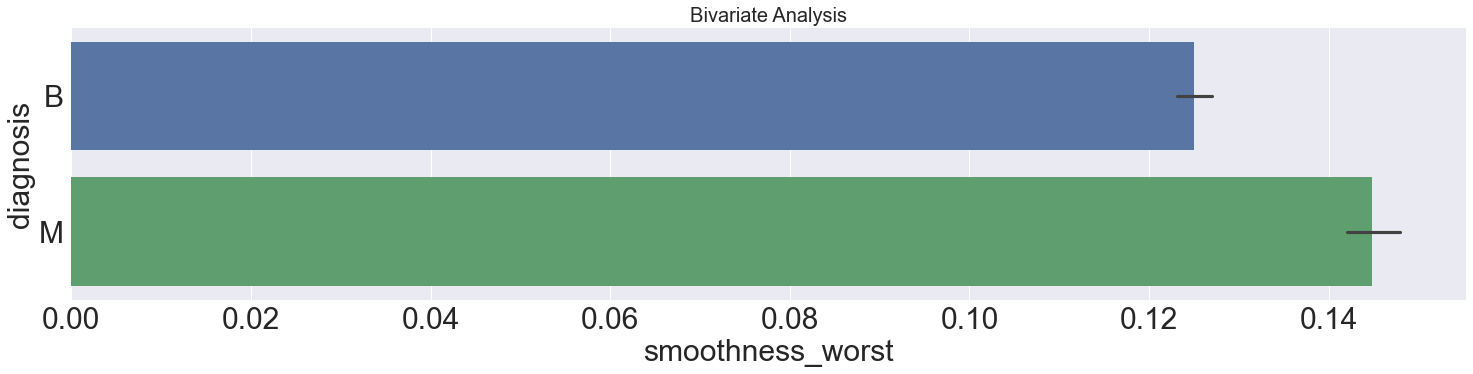

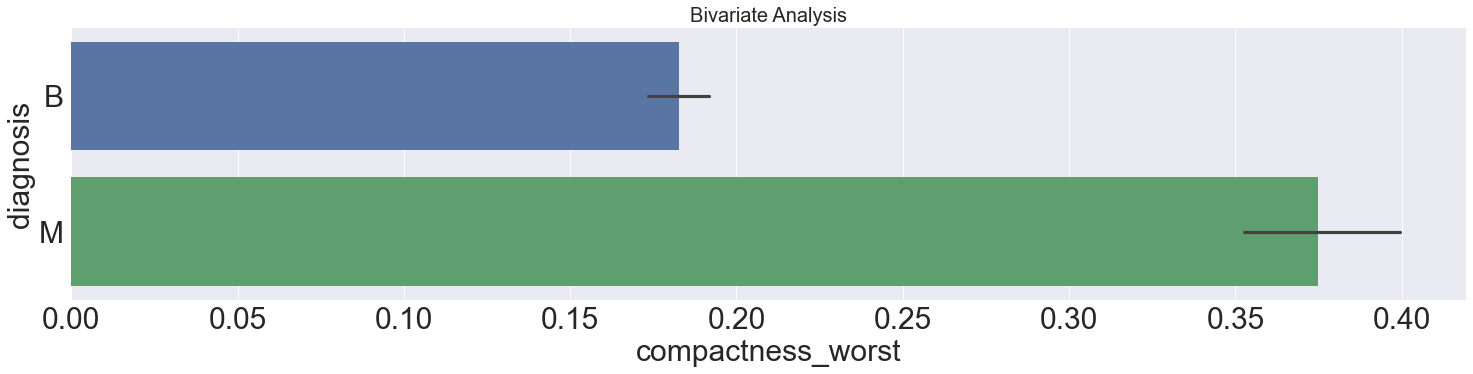

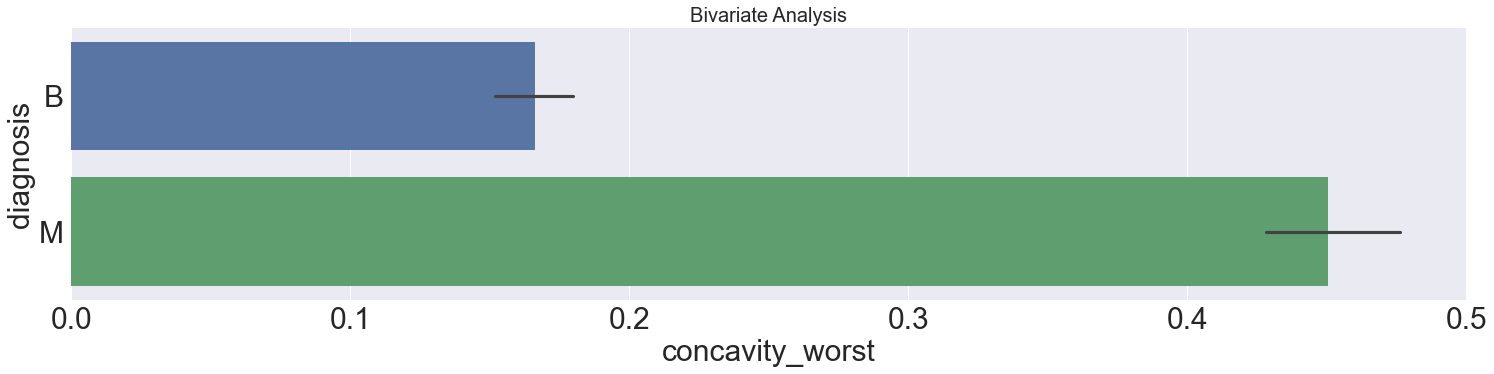

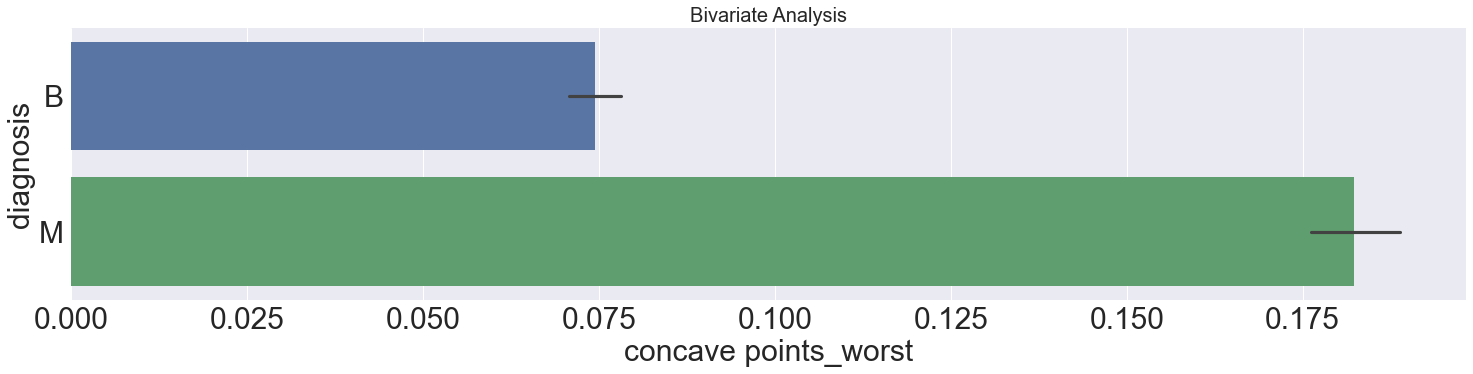

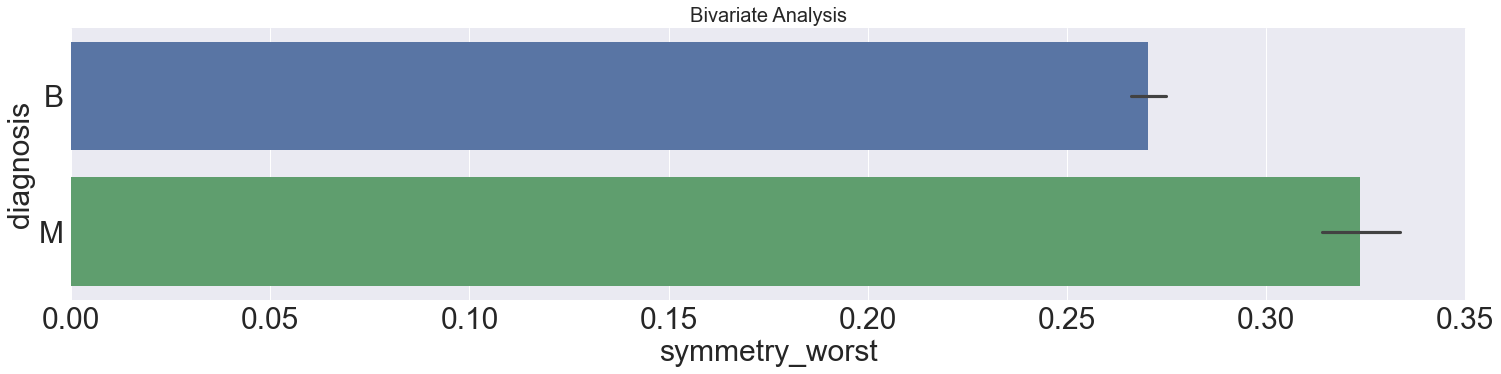

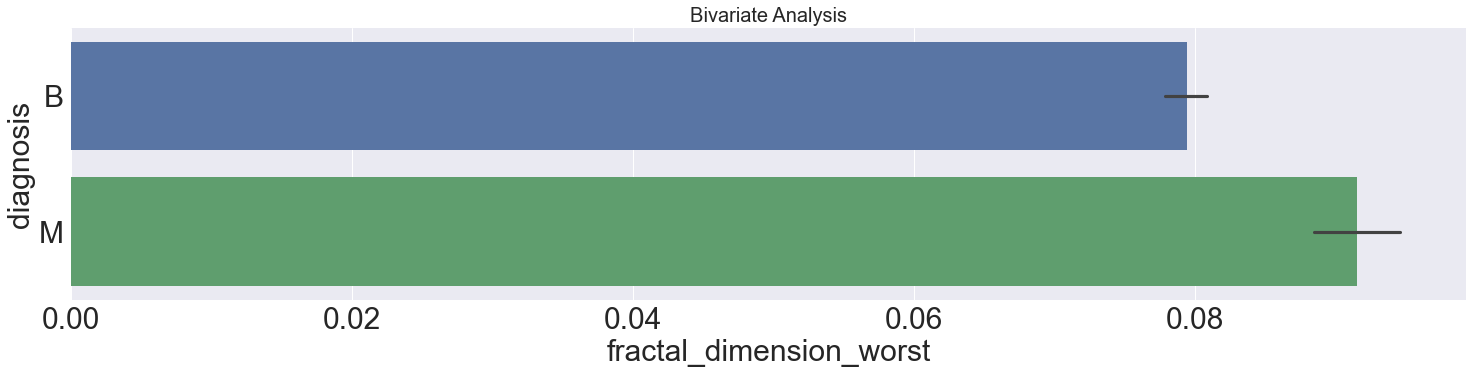

In [11]:
#Function for the bivariate analysis

def bivarate_analysis_barplot(data,categorical_feature,numerical_feature,hue):
            plt.figure(figsize=(25,5))
            result = data.groupby([categorical_feature])[numerical_feature].aggregate(np.median).reset_index().sort_values(numerical_feature)
            b=sns.barplot(y=data[categorical_feature],x=data[numerical_feature],data=data,hue=hue,order=result[categorical_feature])
            b.axes.set_title('Bivariate Analysis',fontsize=20)
            b.set_xlabel(numerical_feature,fontsize=30)
            b.set_ylabel(categorical_feature,fontsize=30)
            b.tick_params(labelsize=30)
            plt.show()

            
 #bivariate analysis between independent and categorical dependent feature           
for col in X:
    bivarate_analysis_barplot(data,'diagnosis',col,None)

- From the above bivariate analysis we can intepret that most of the independent features have their contribution in predction of the object. Some of the independent features indicates the more significance towards the particular class. We need to do feature significance tests to identify the importance of independent features.

- Lets do the bivariate analysis with the help of the boxplot.

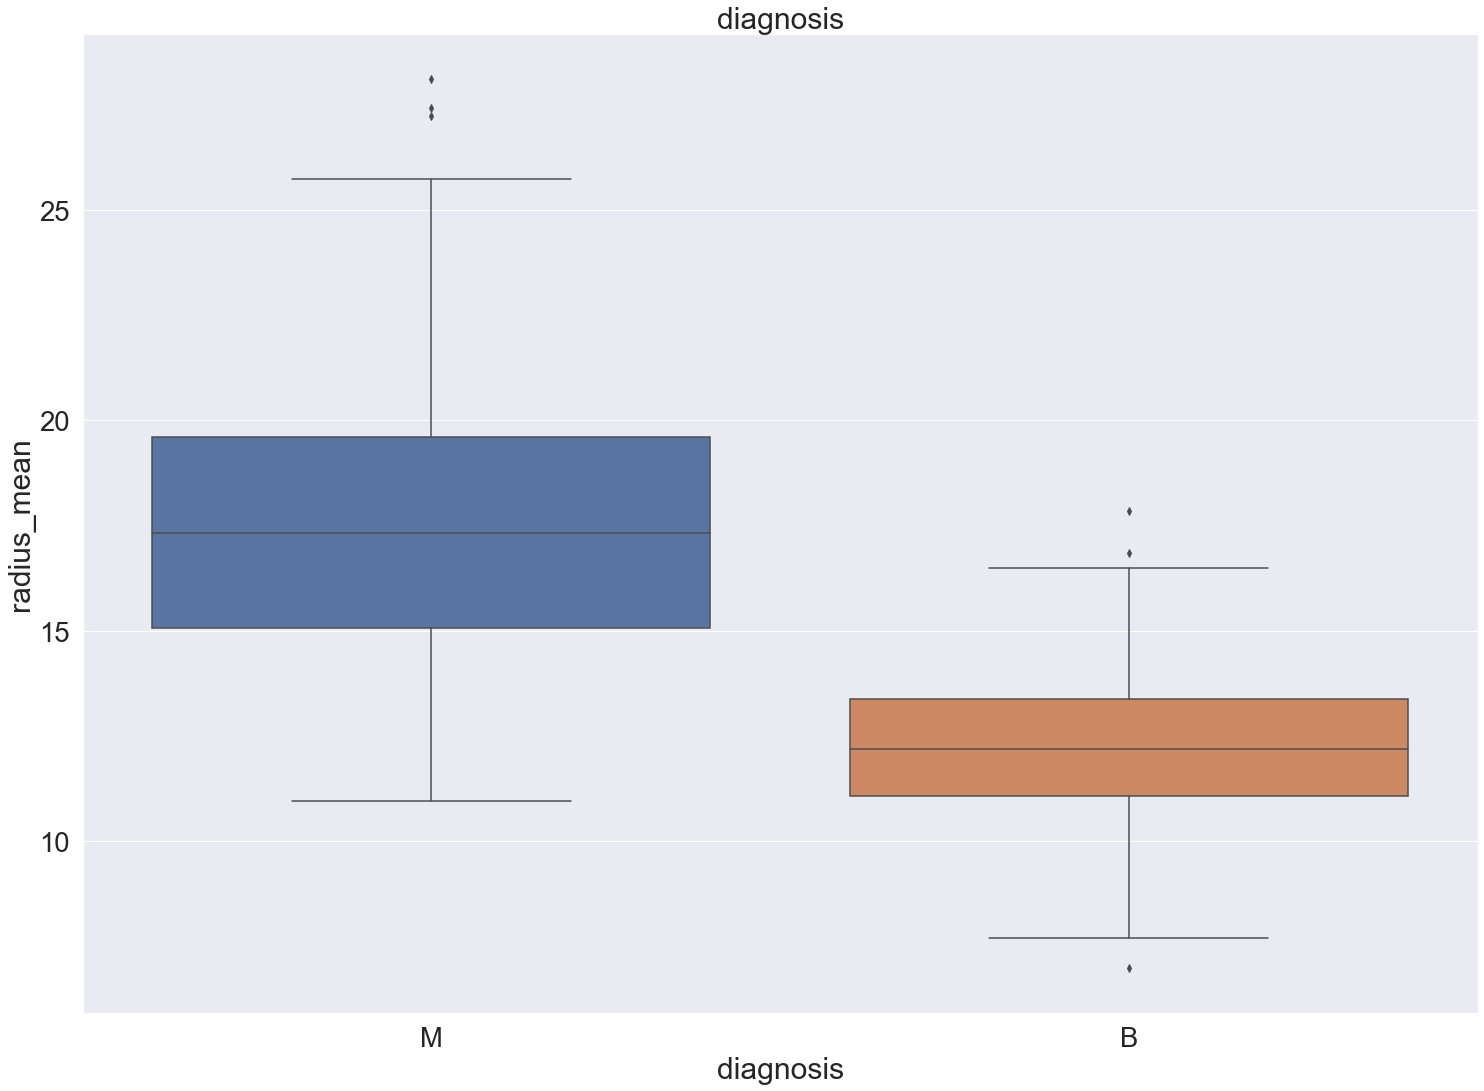

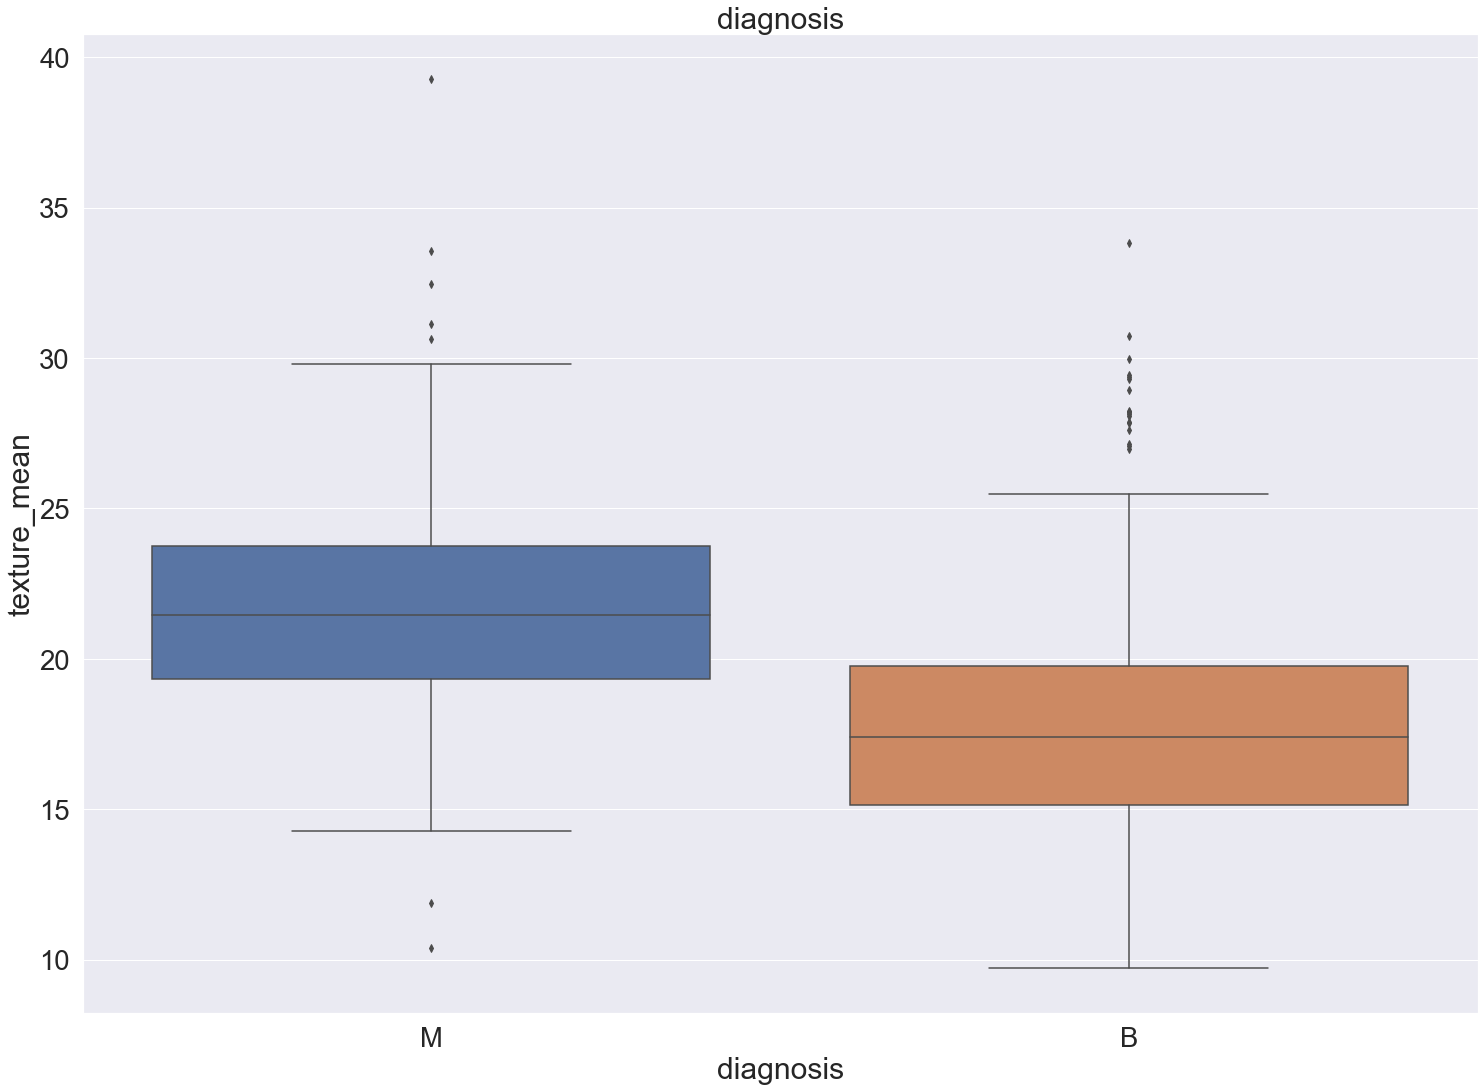

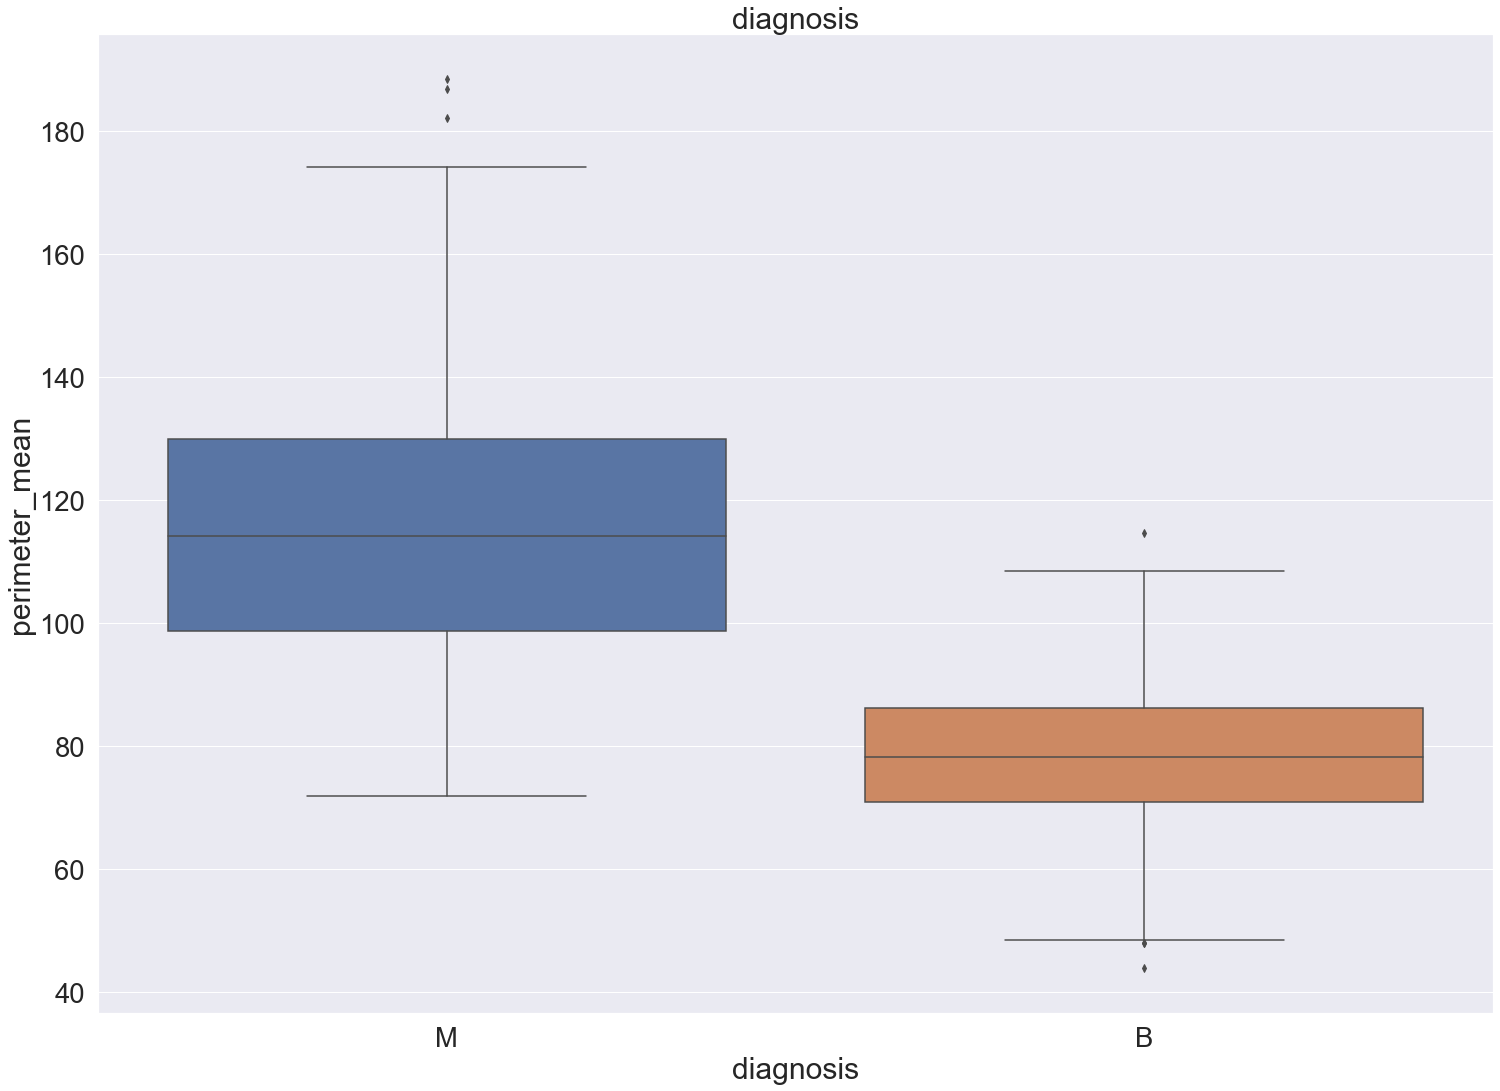

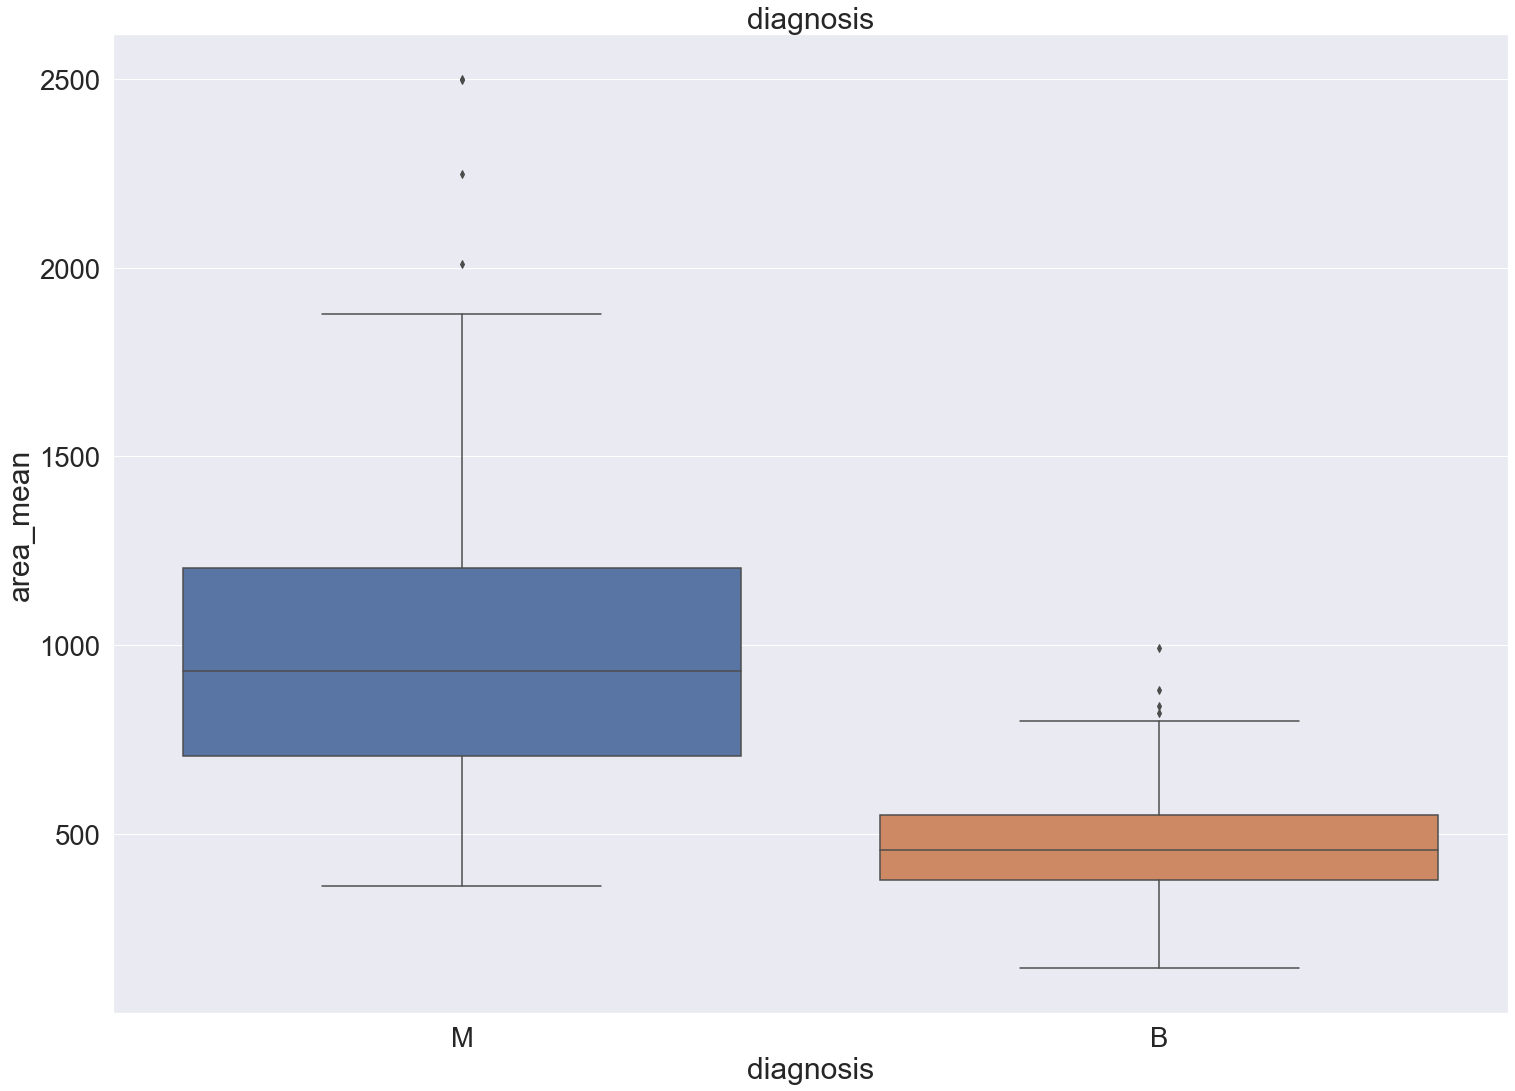

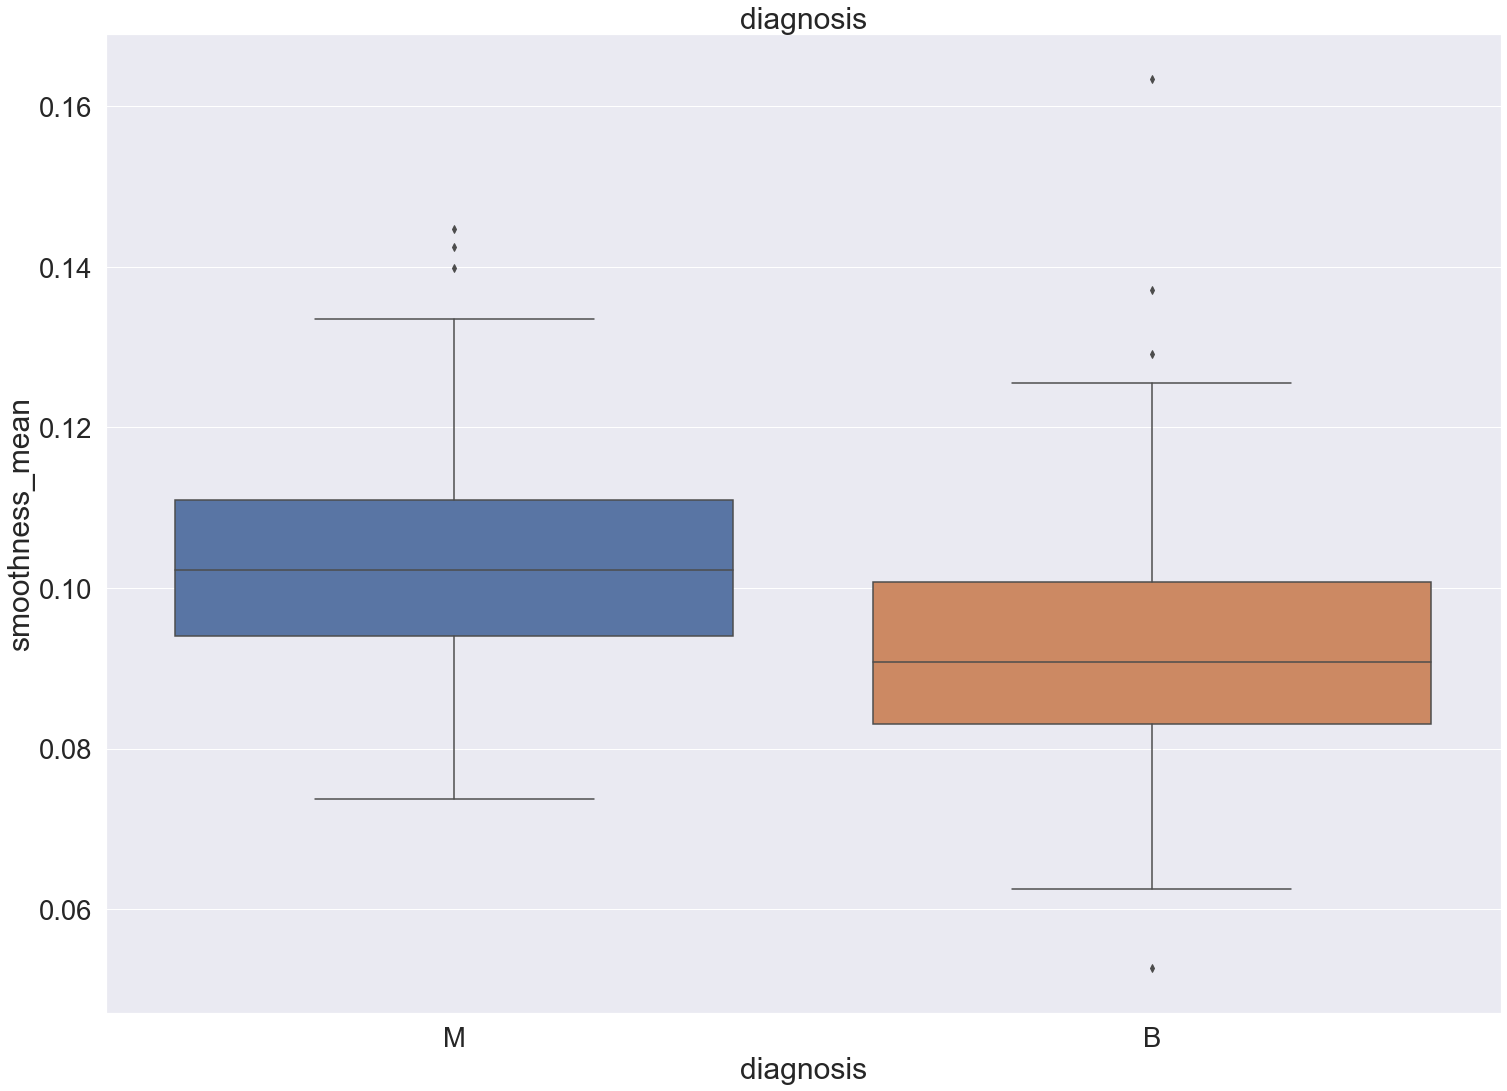

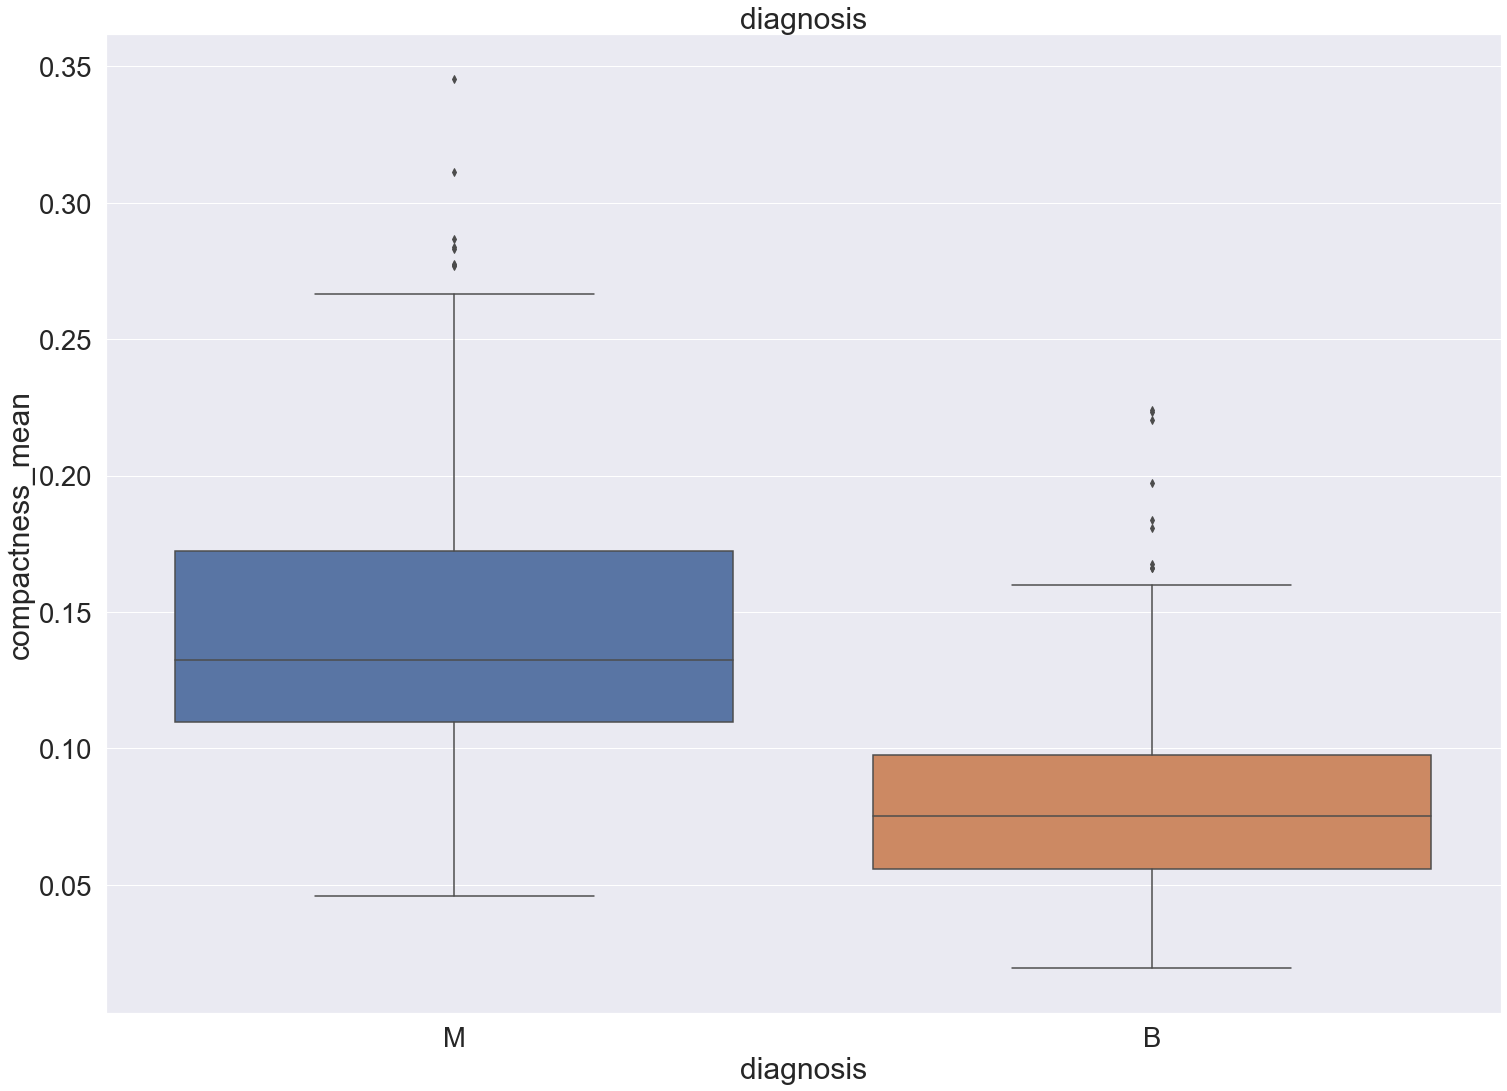

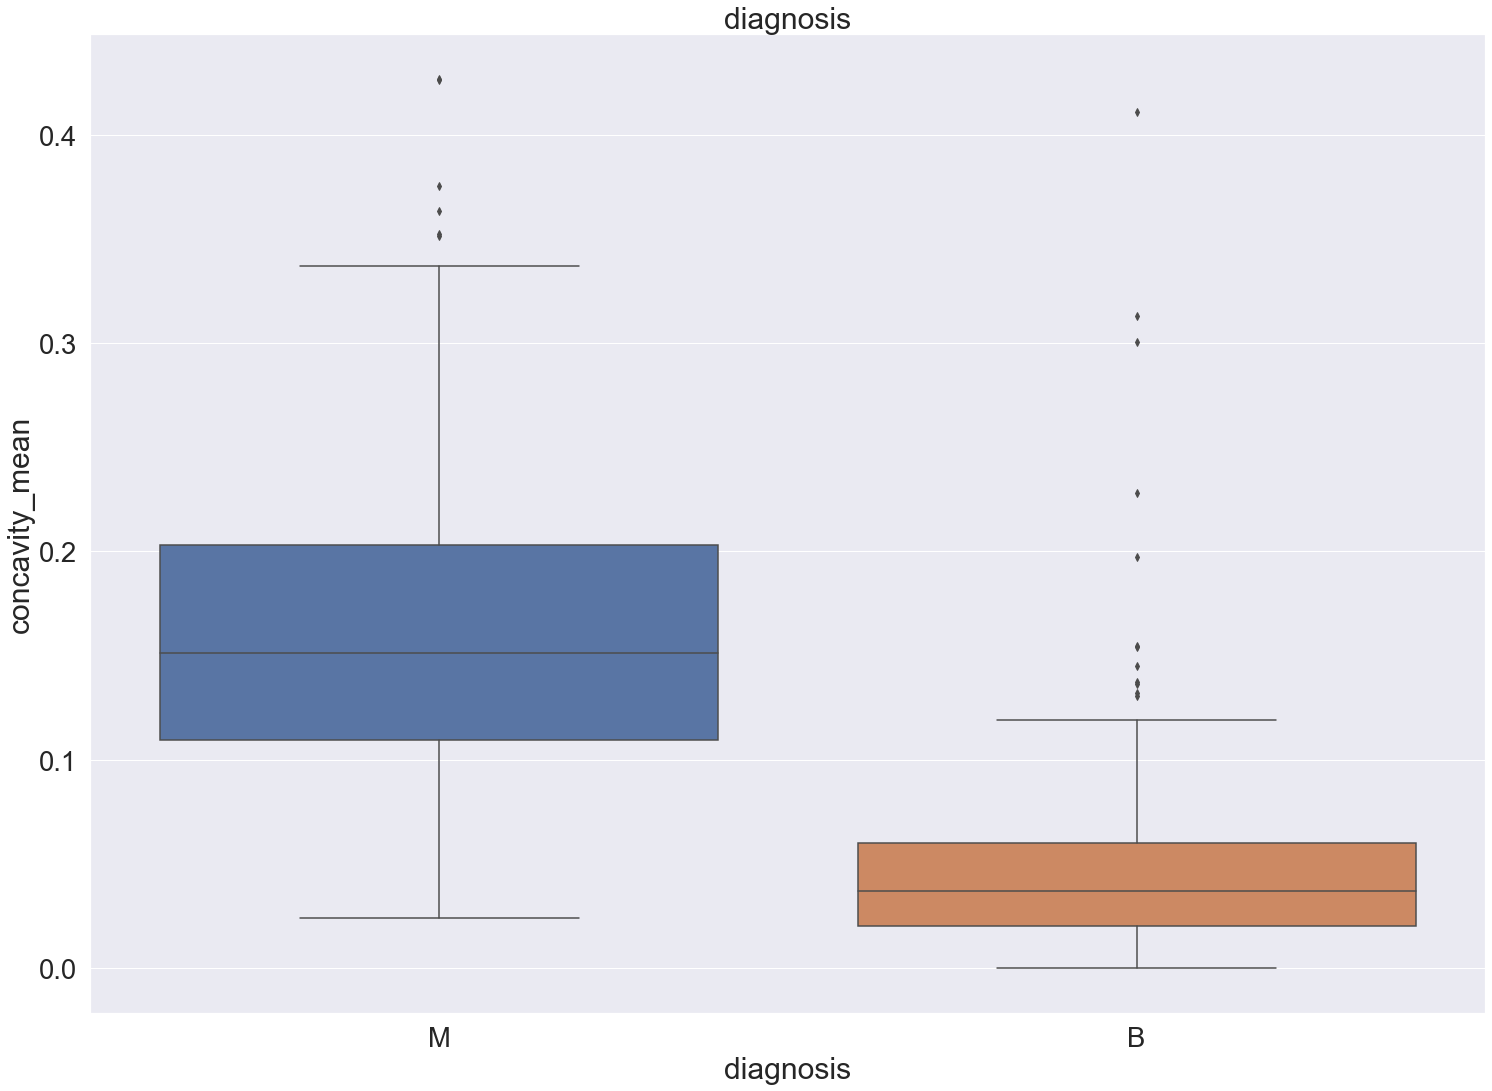

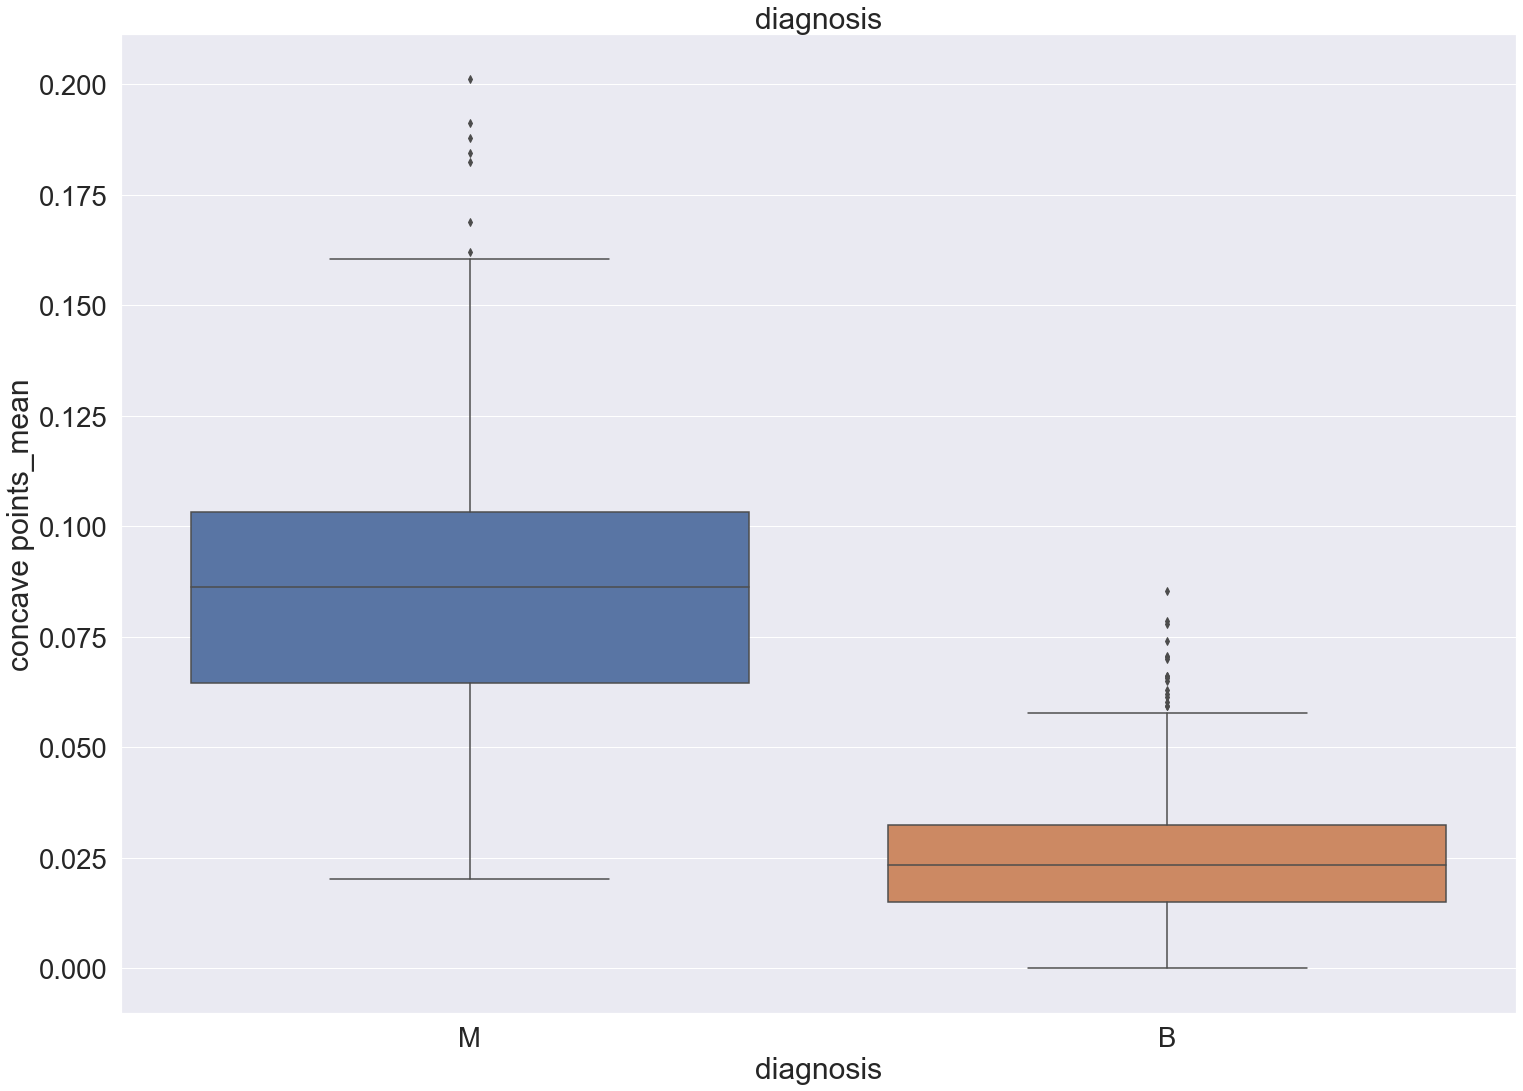

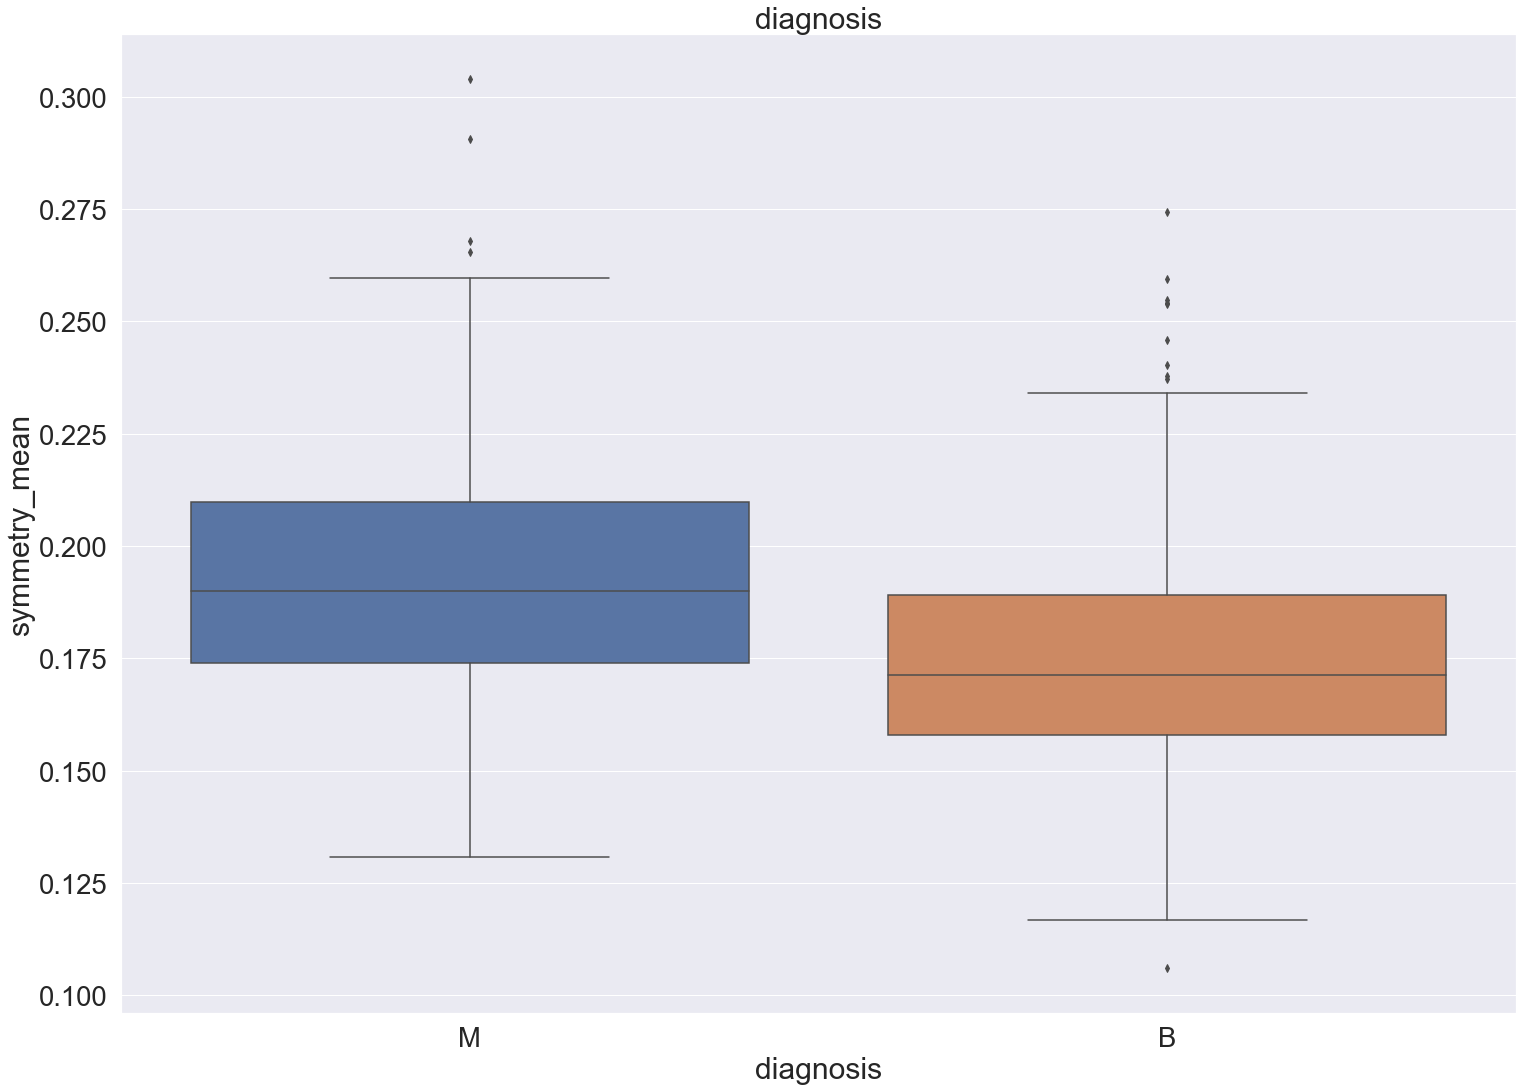

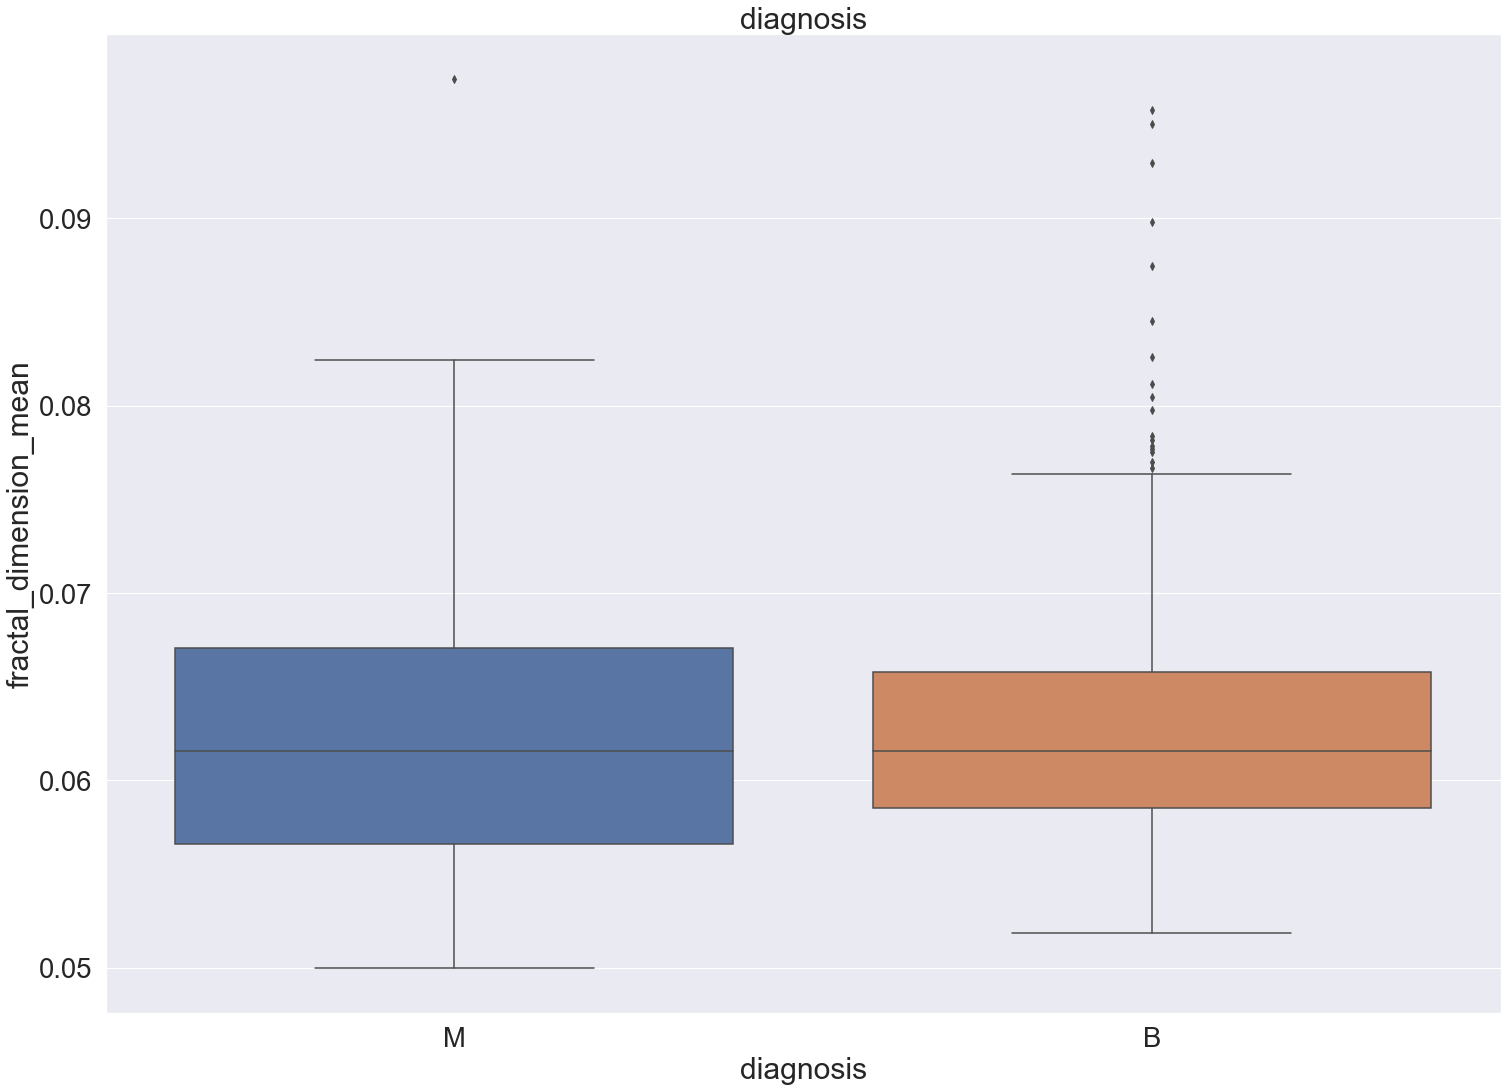

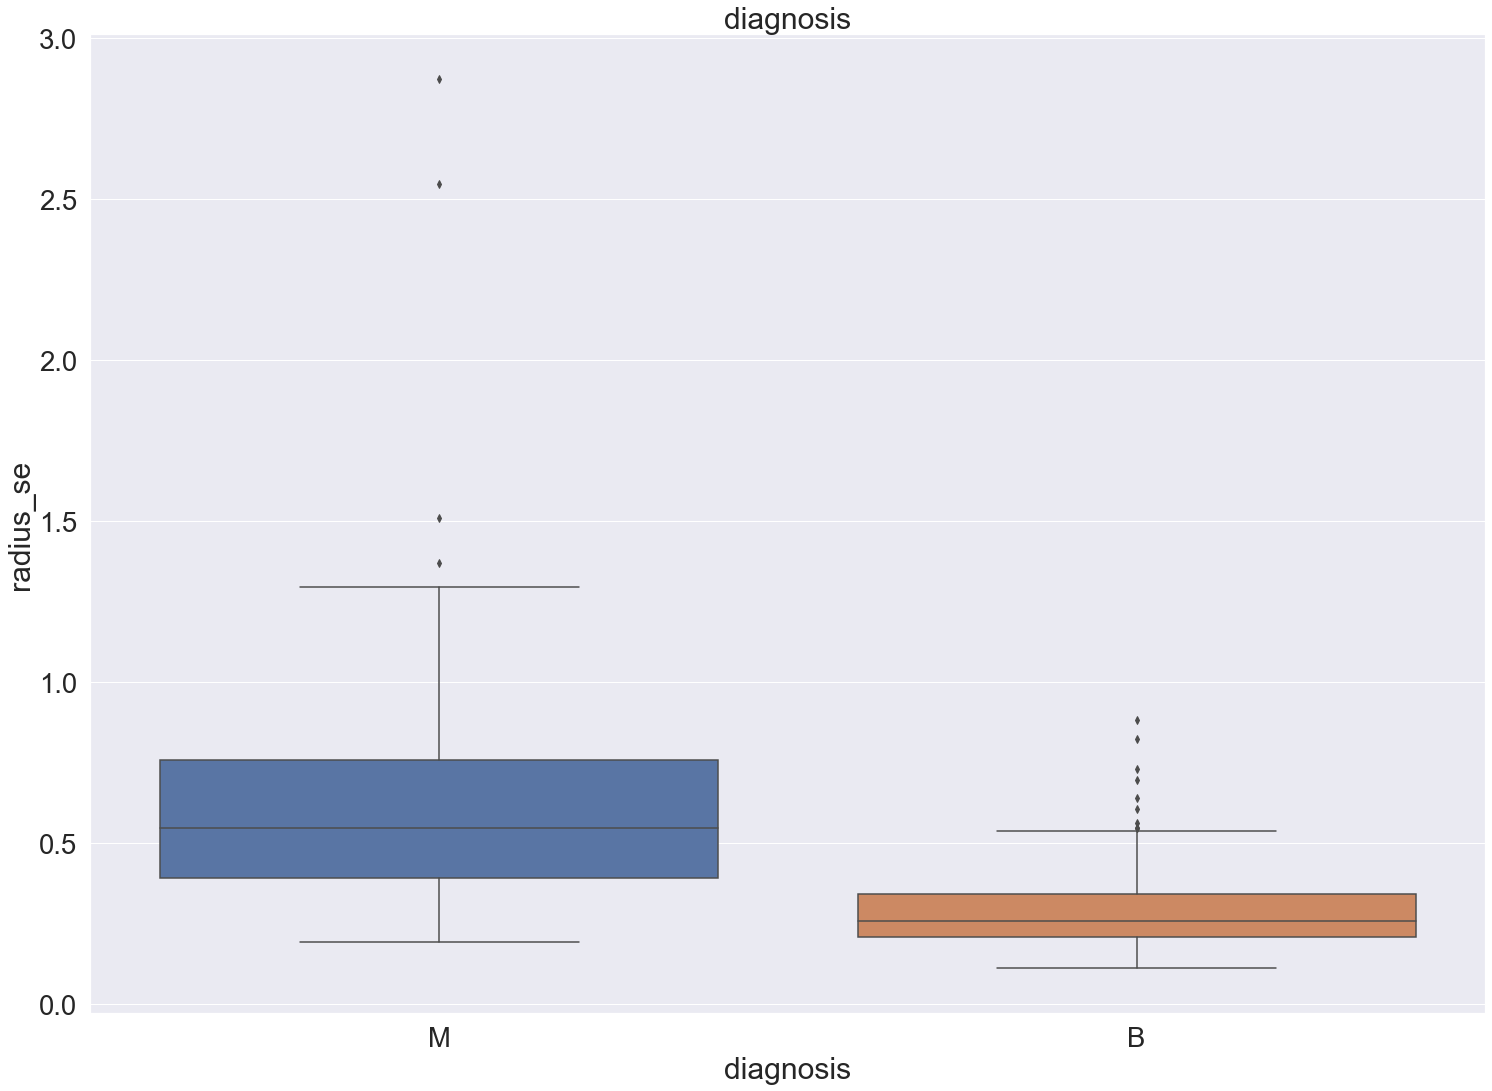

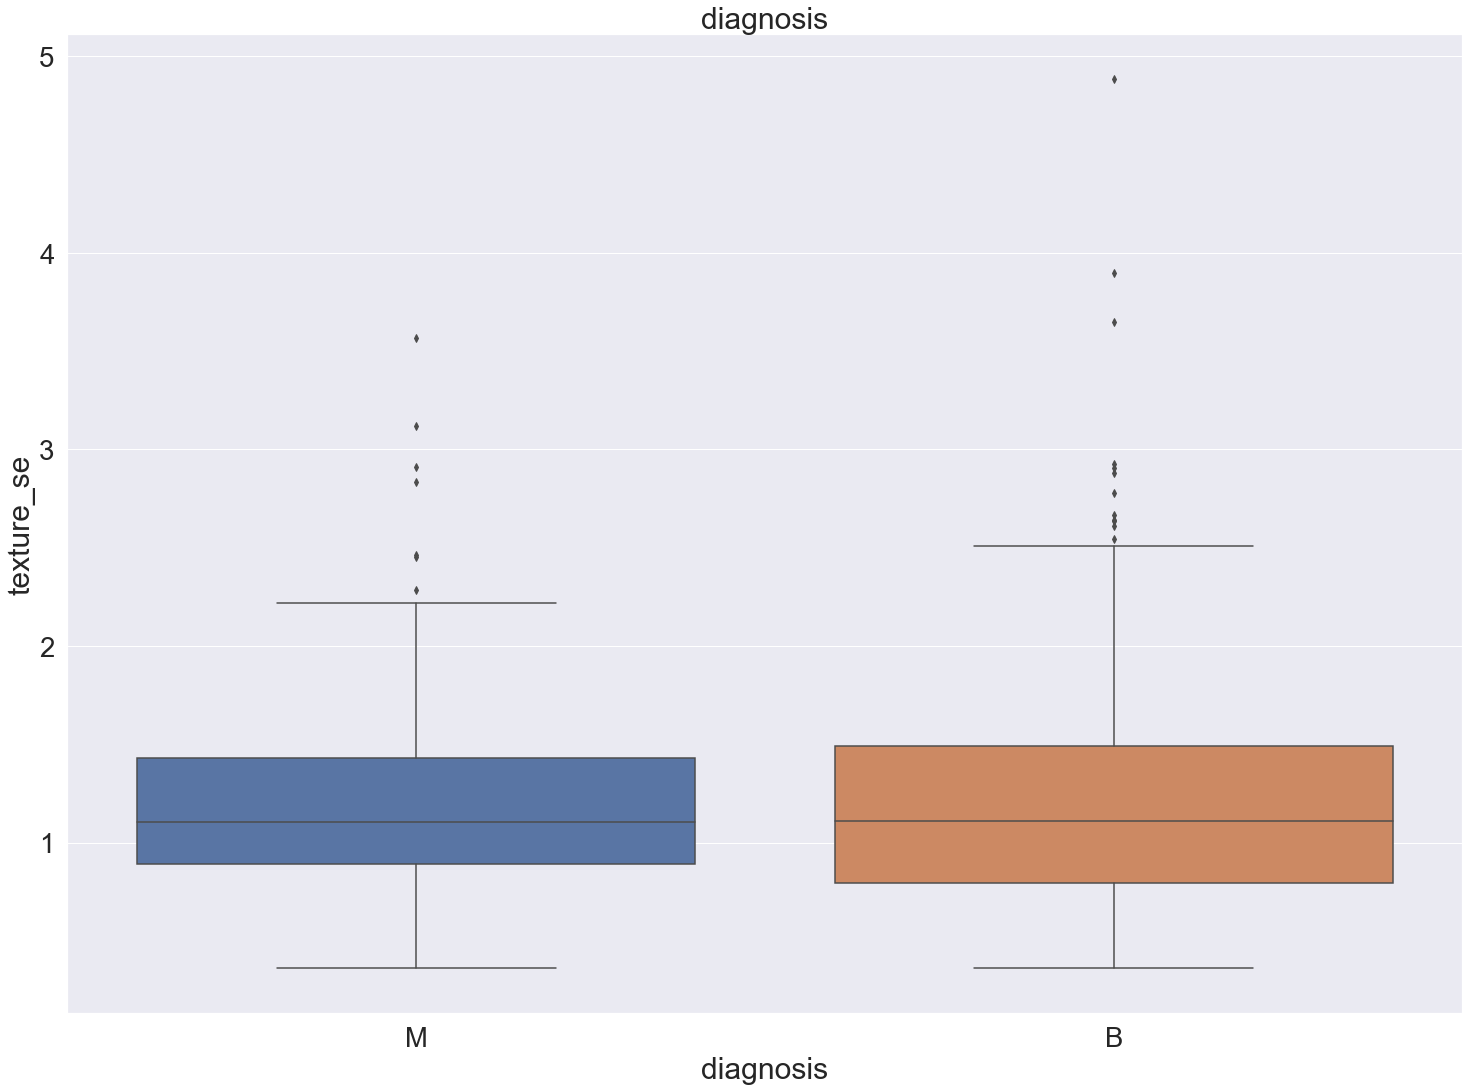

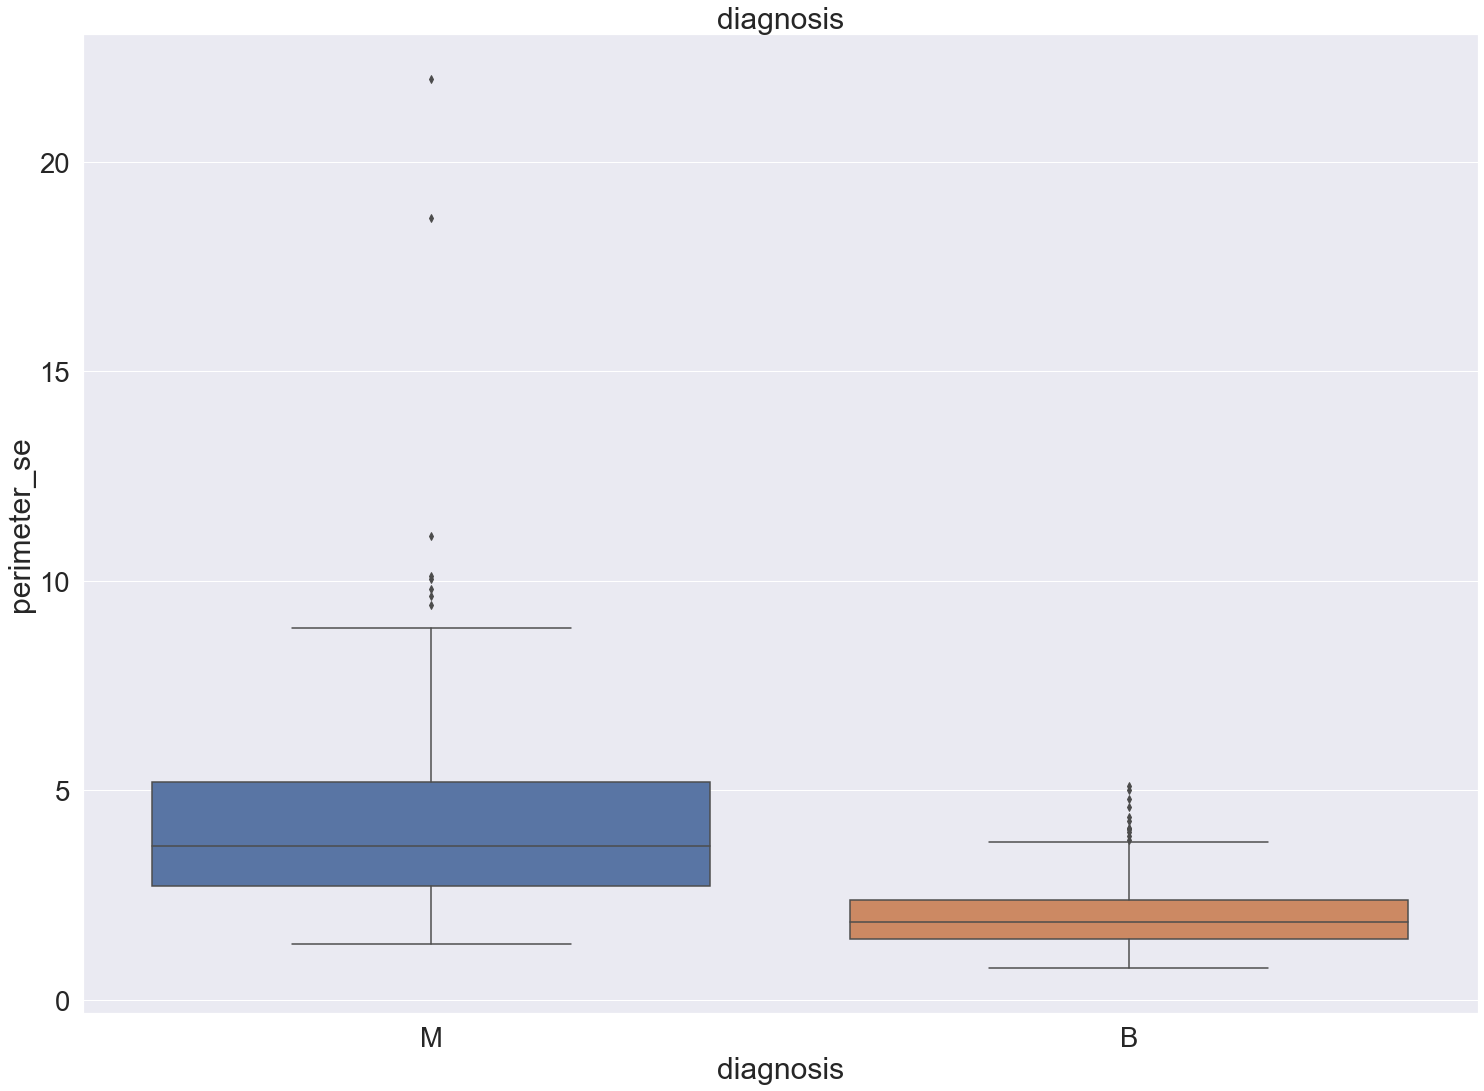

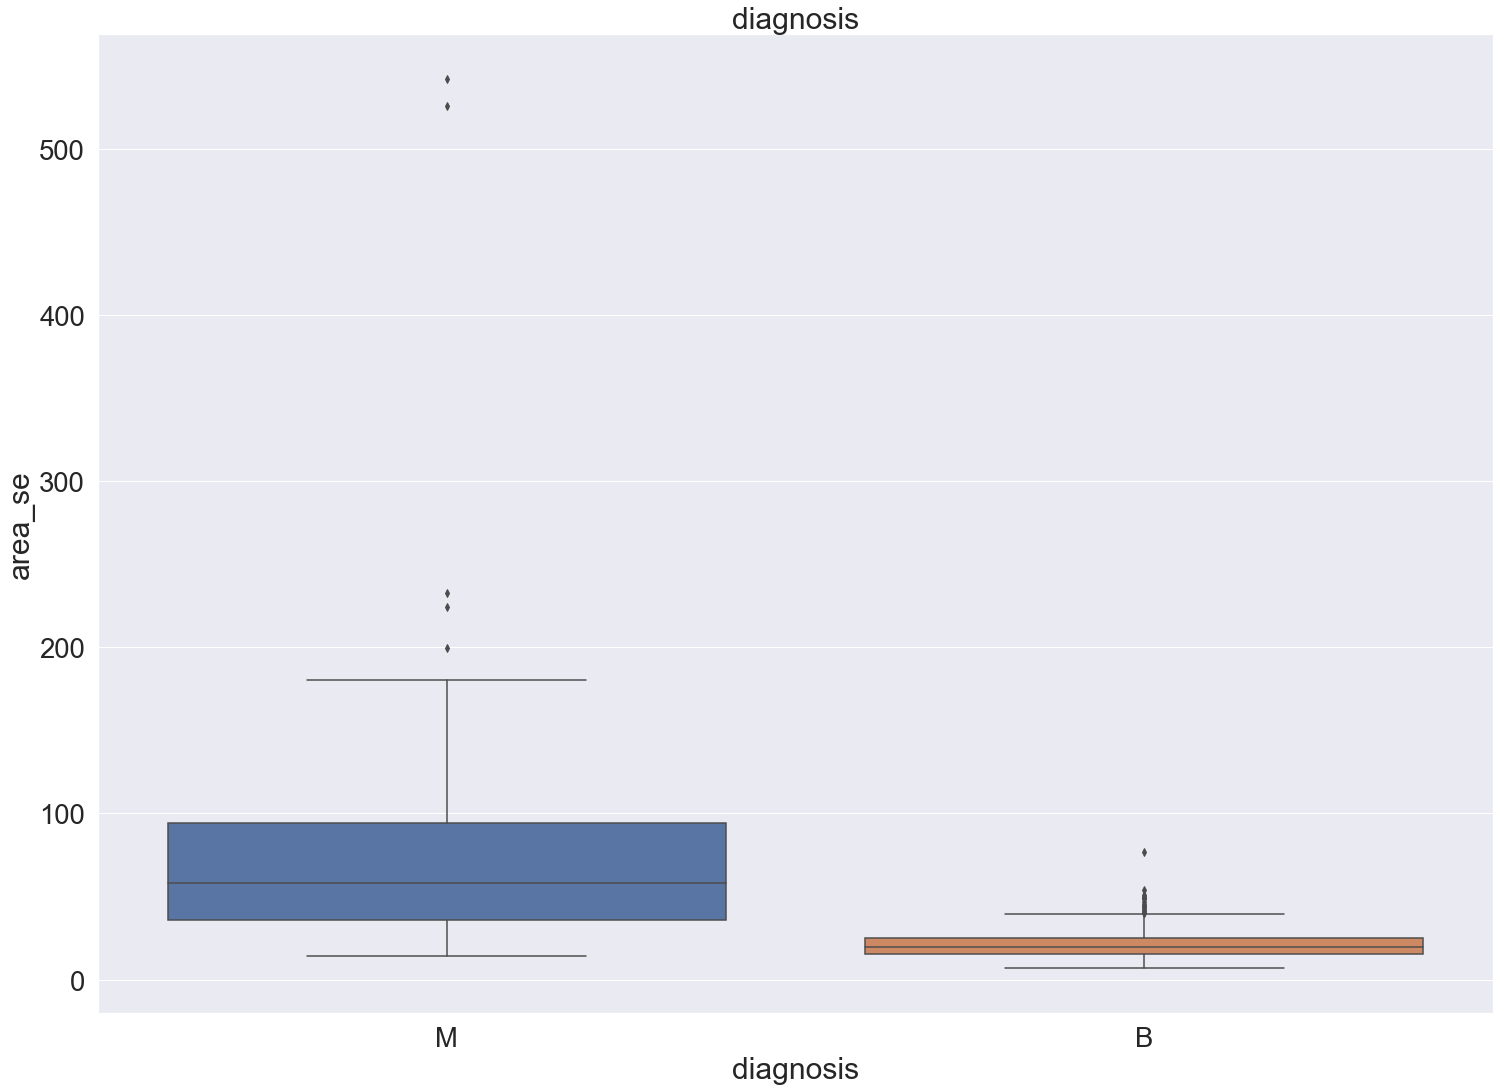

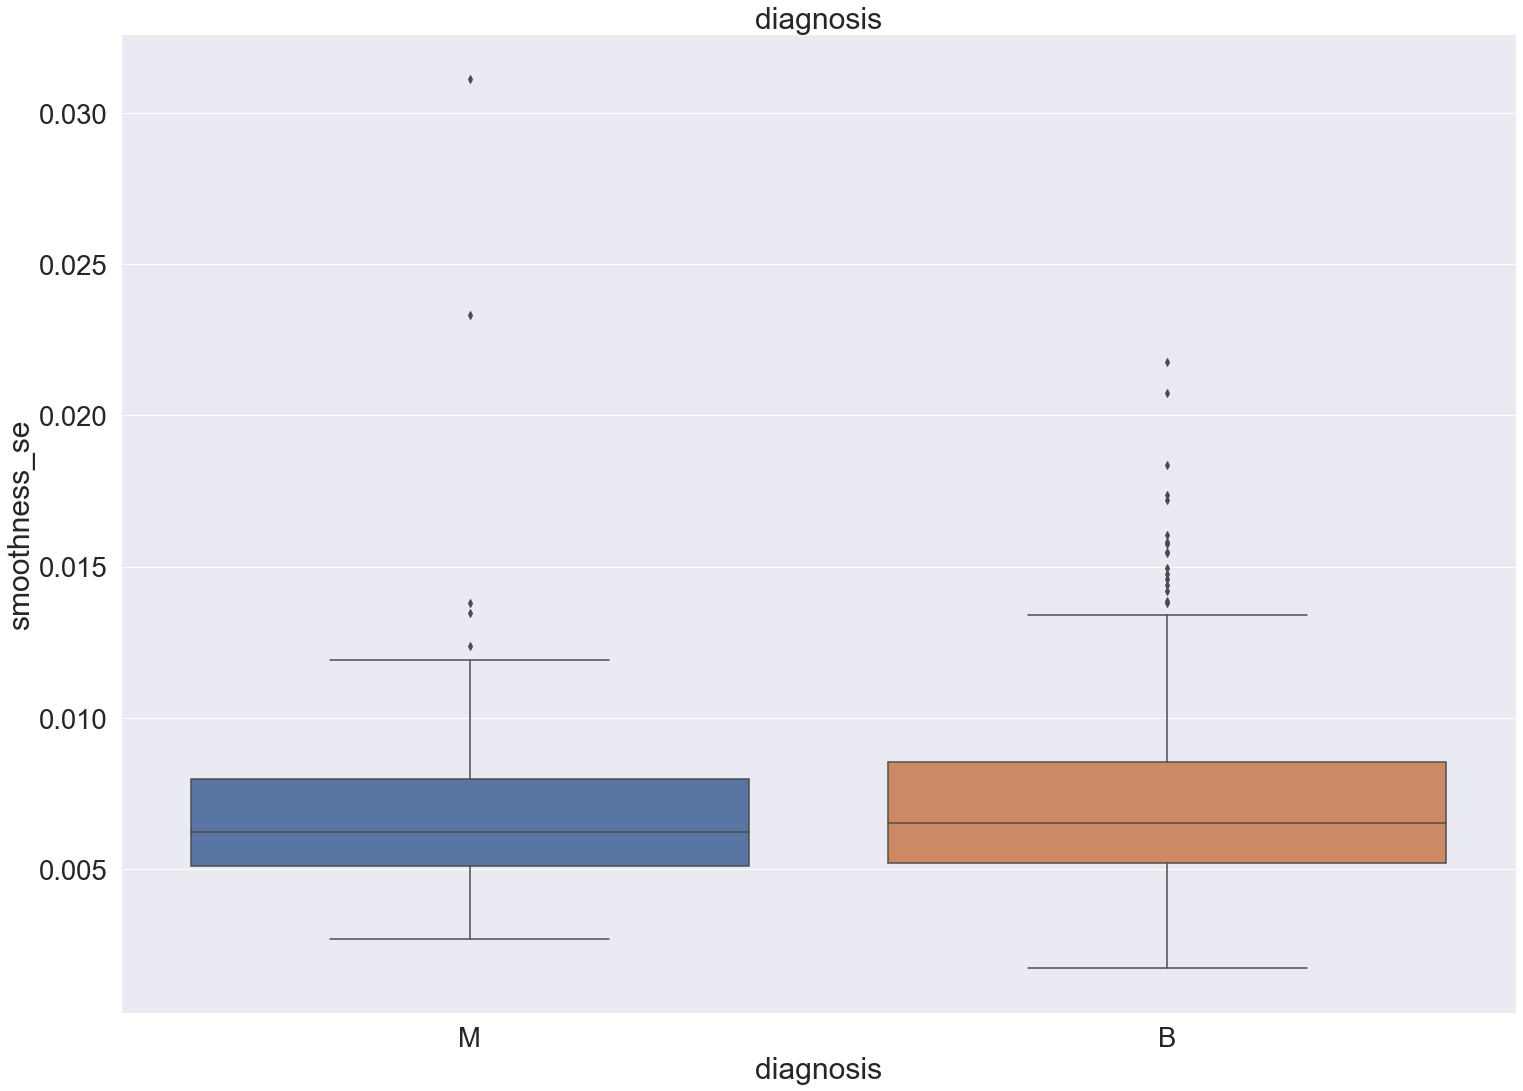

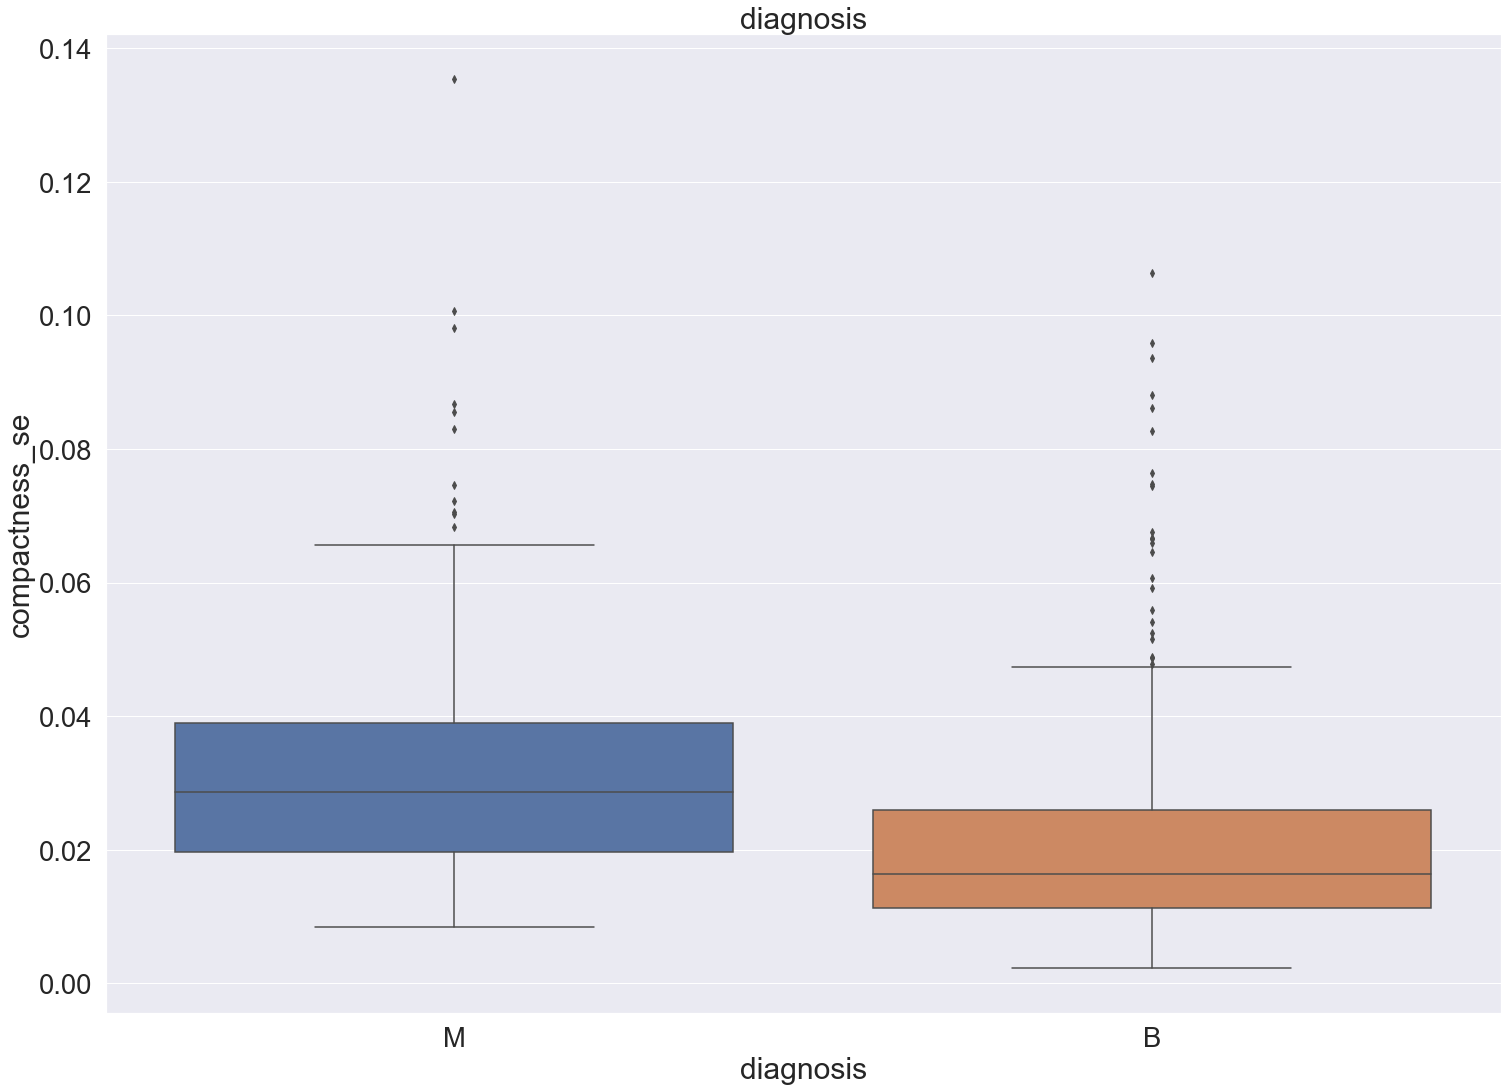

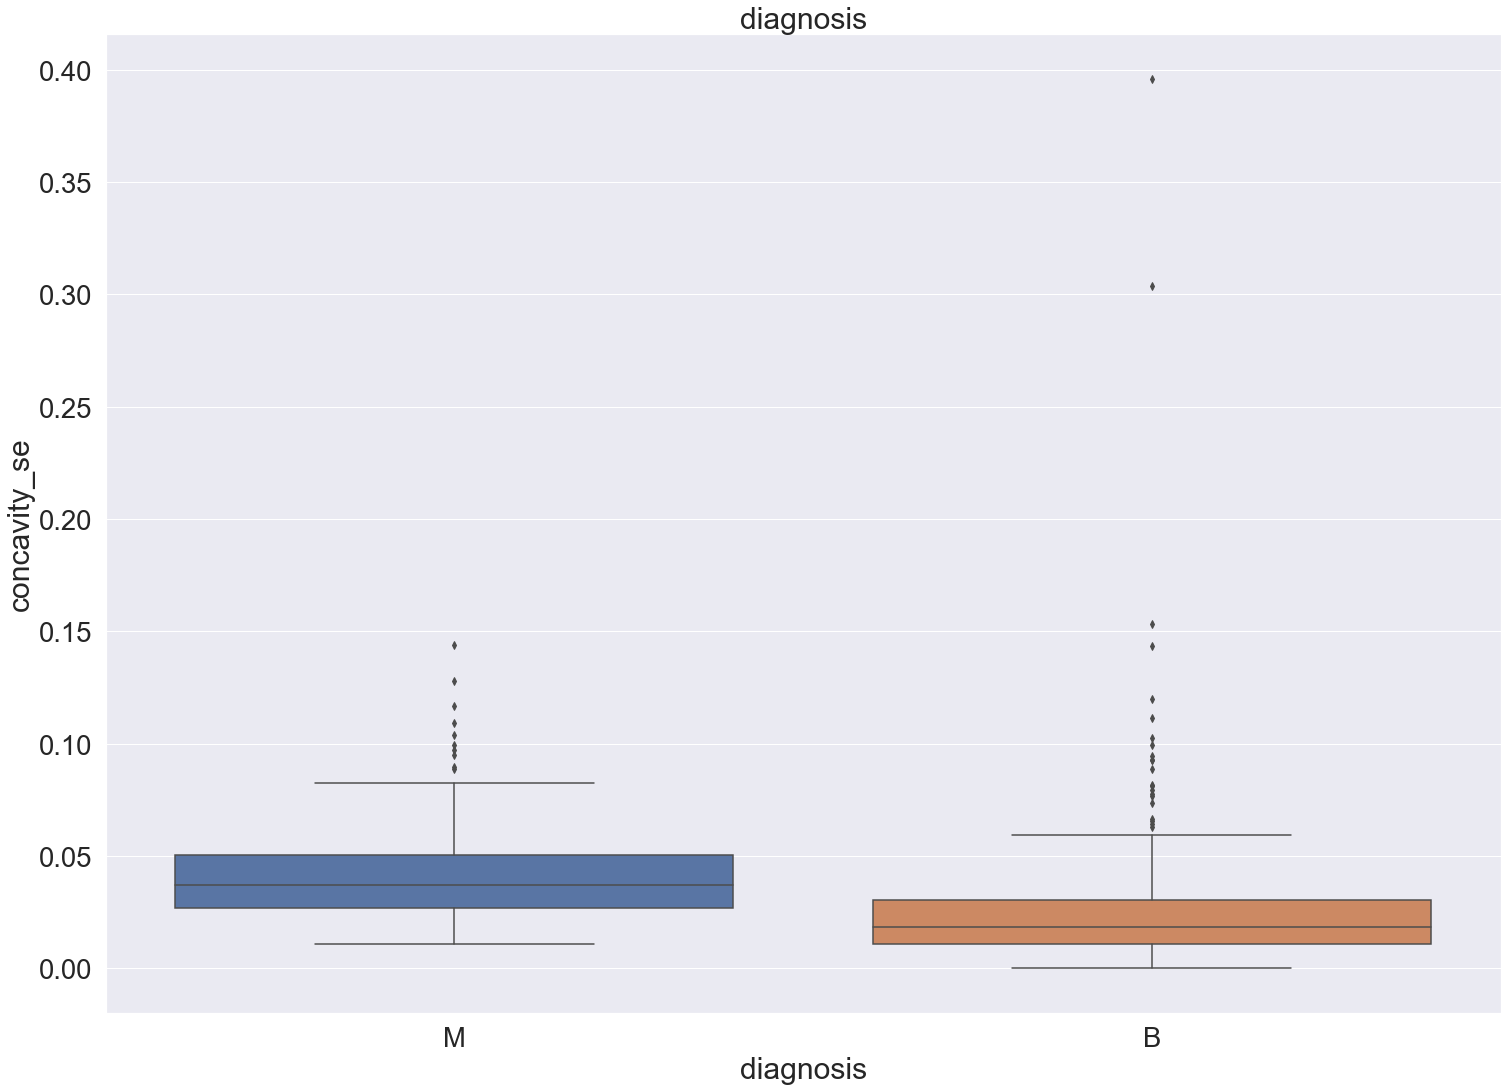

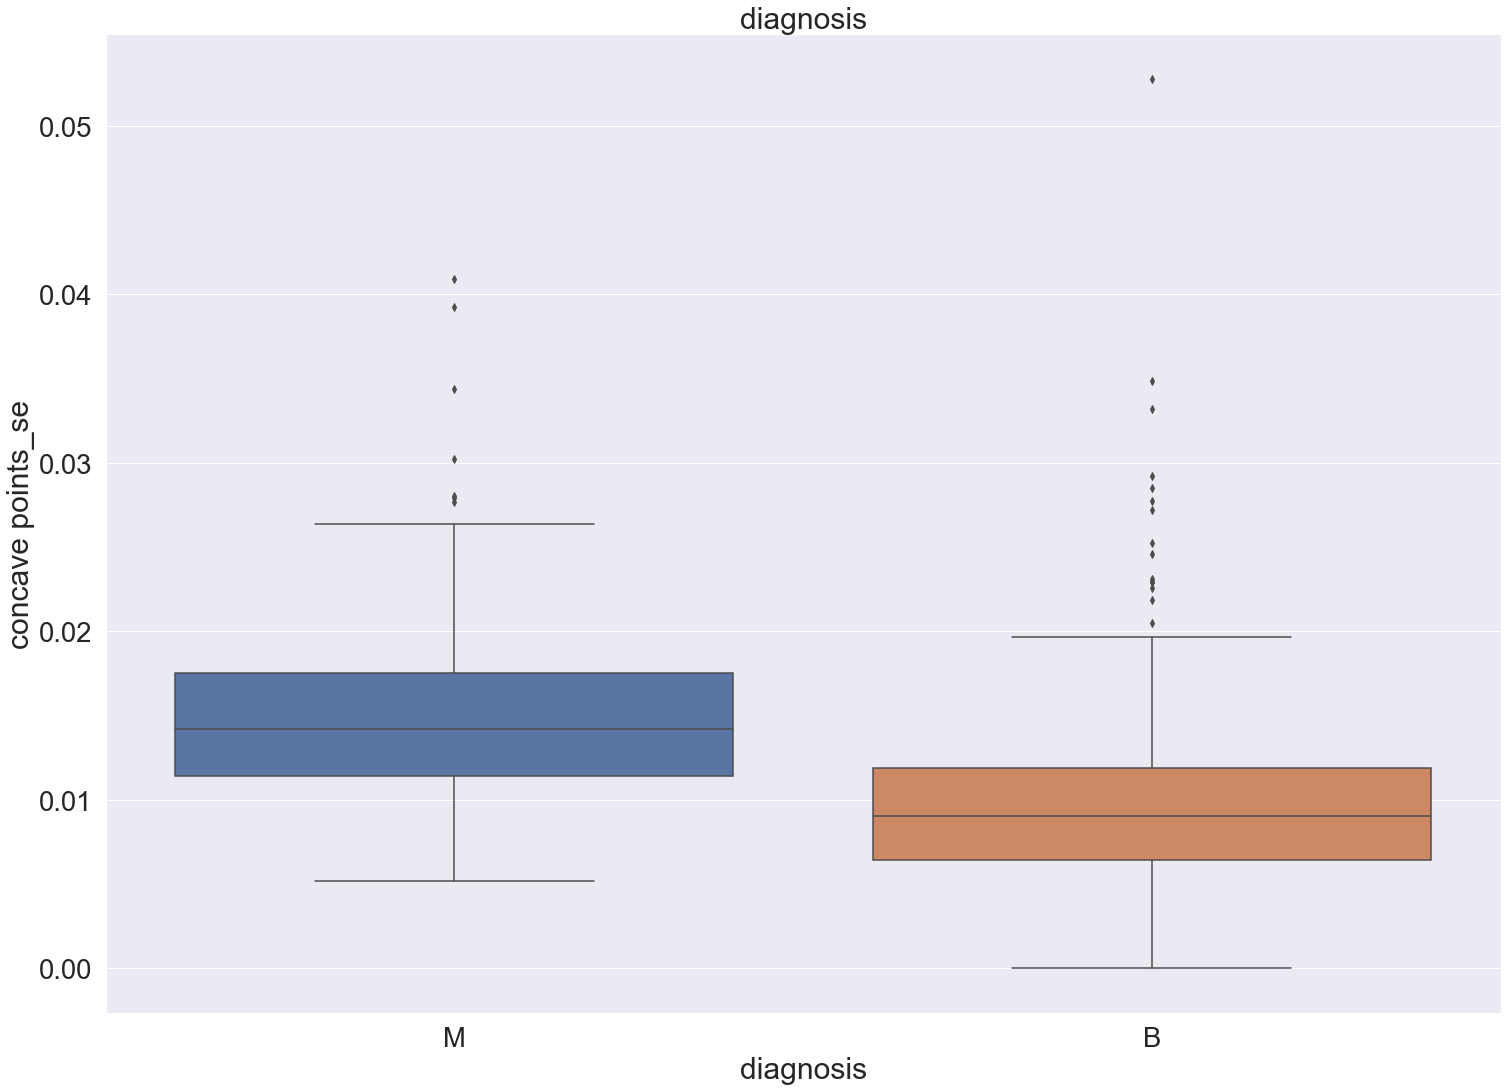

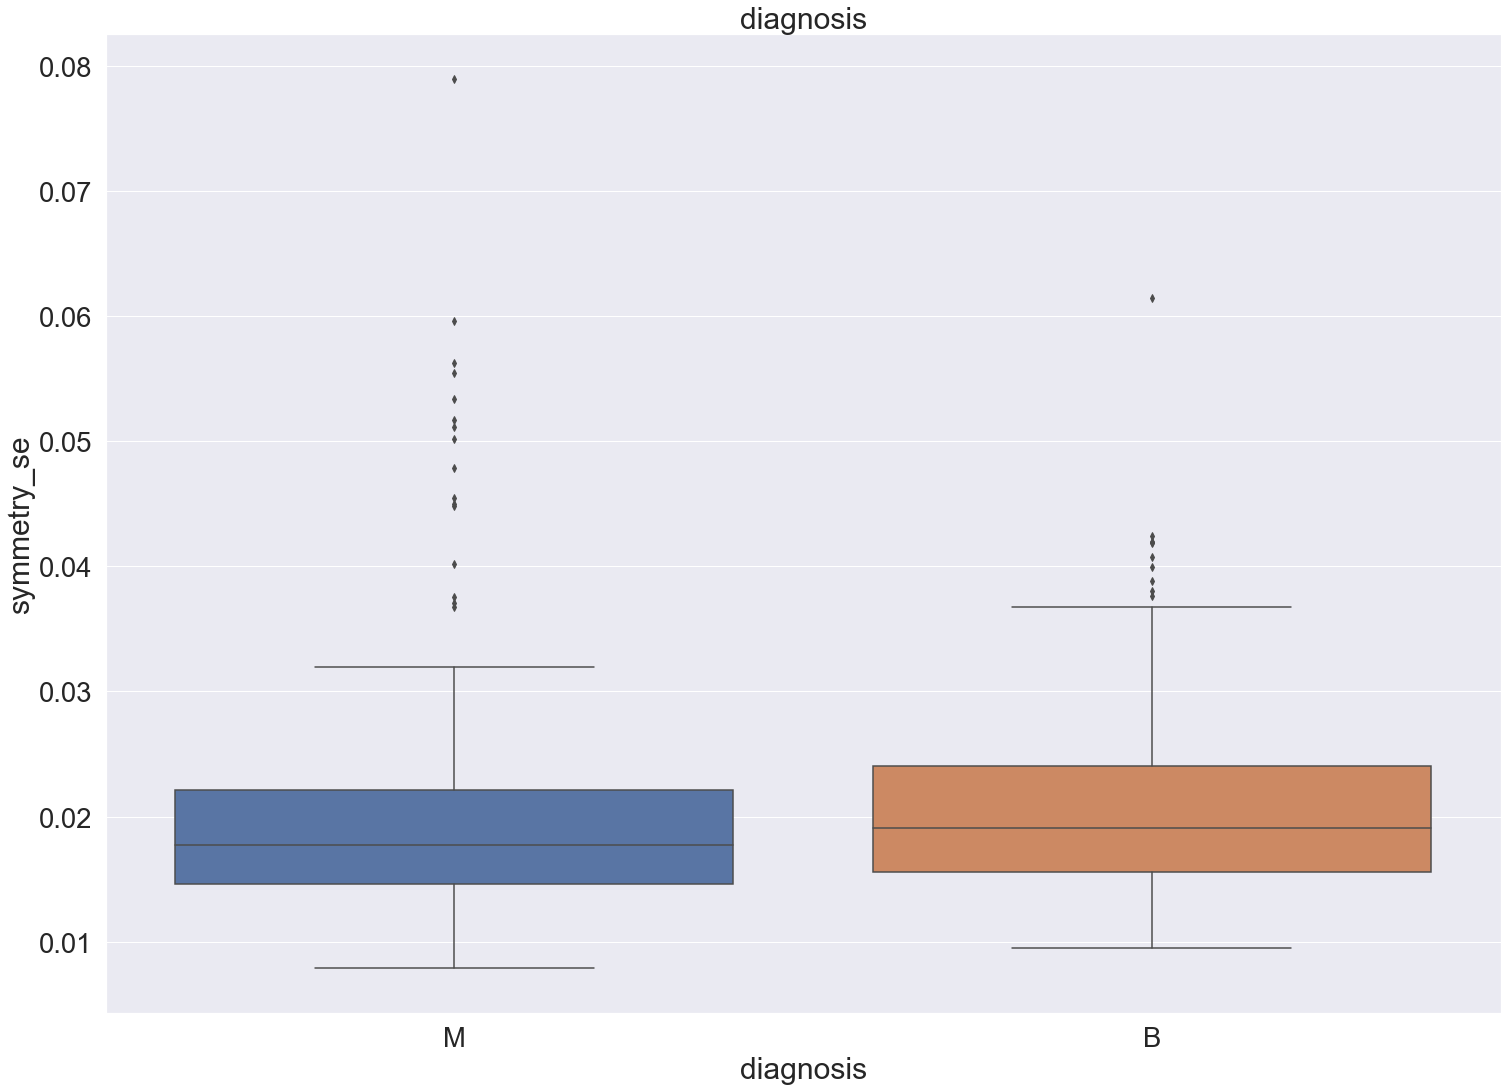

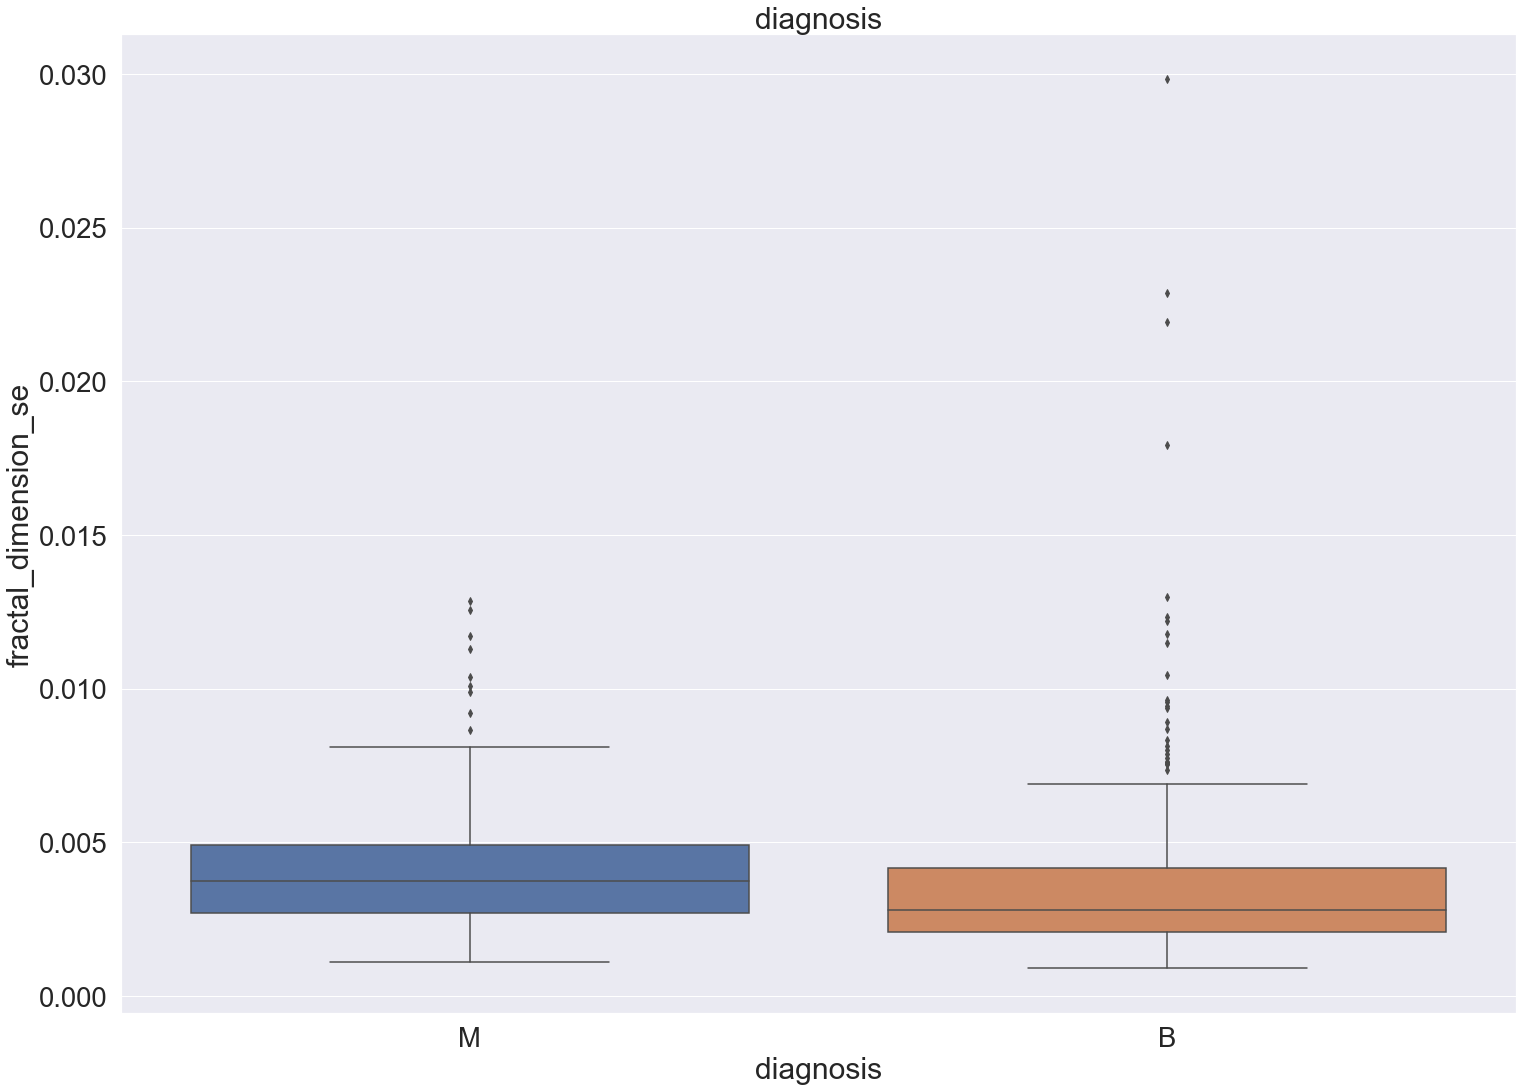

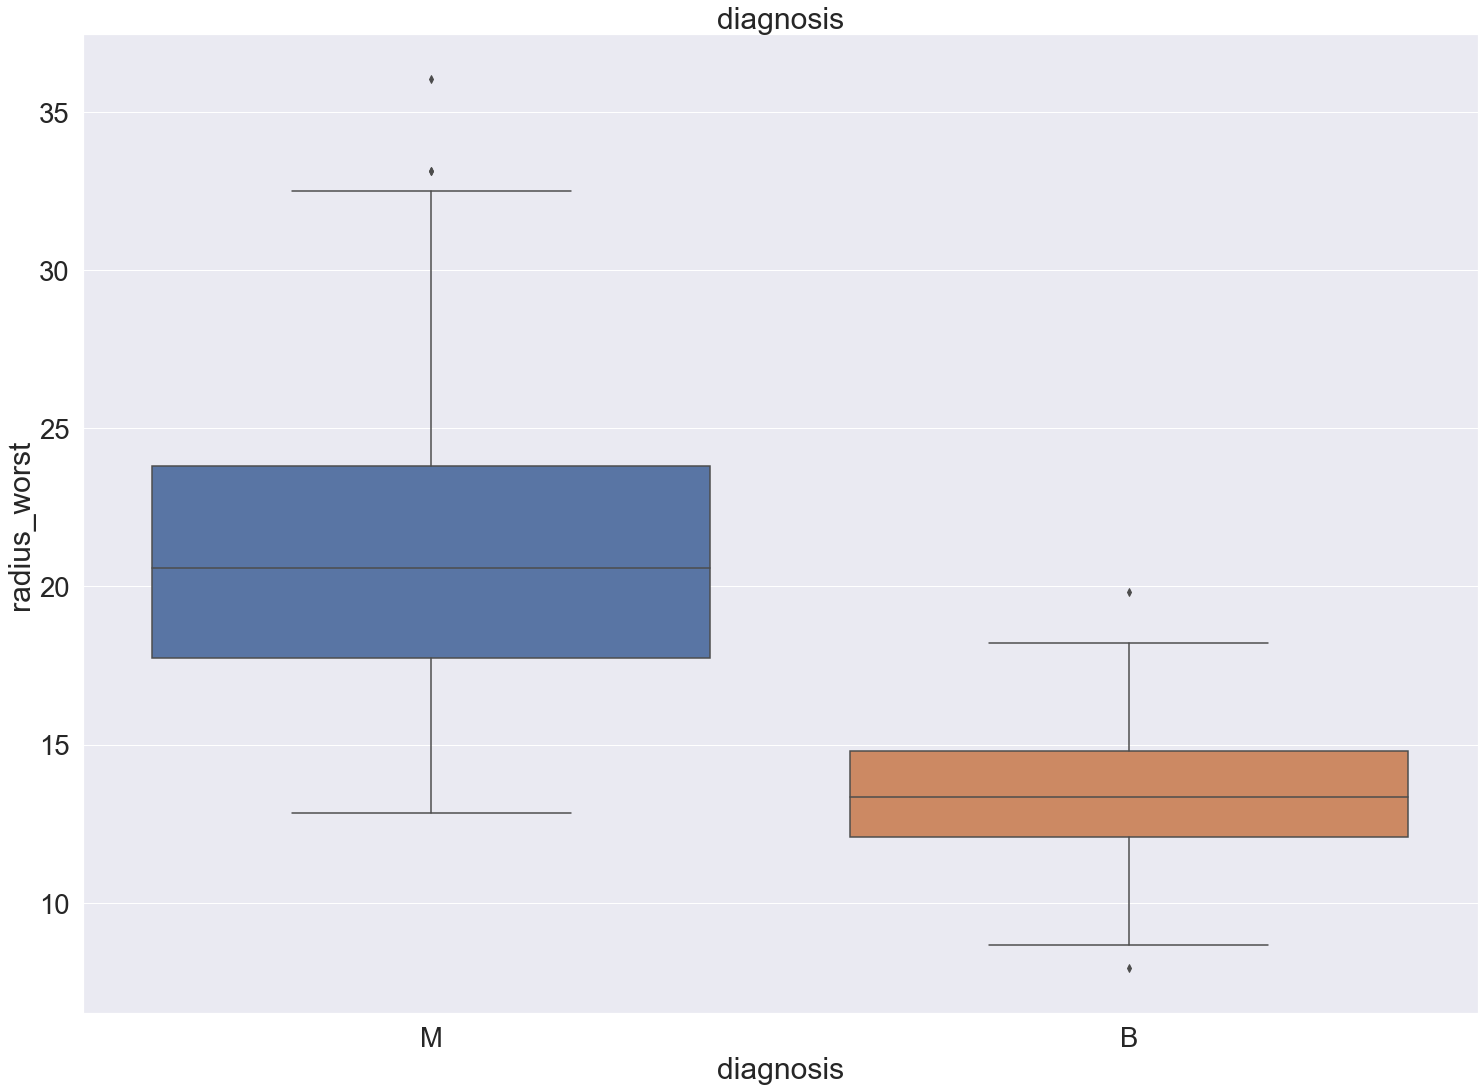

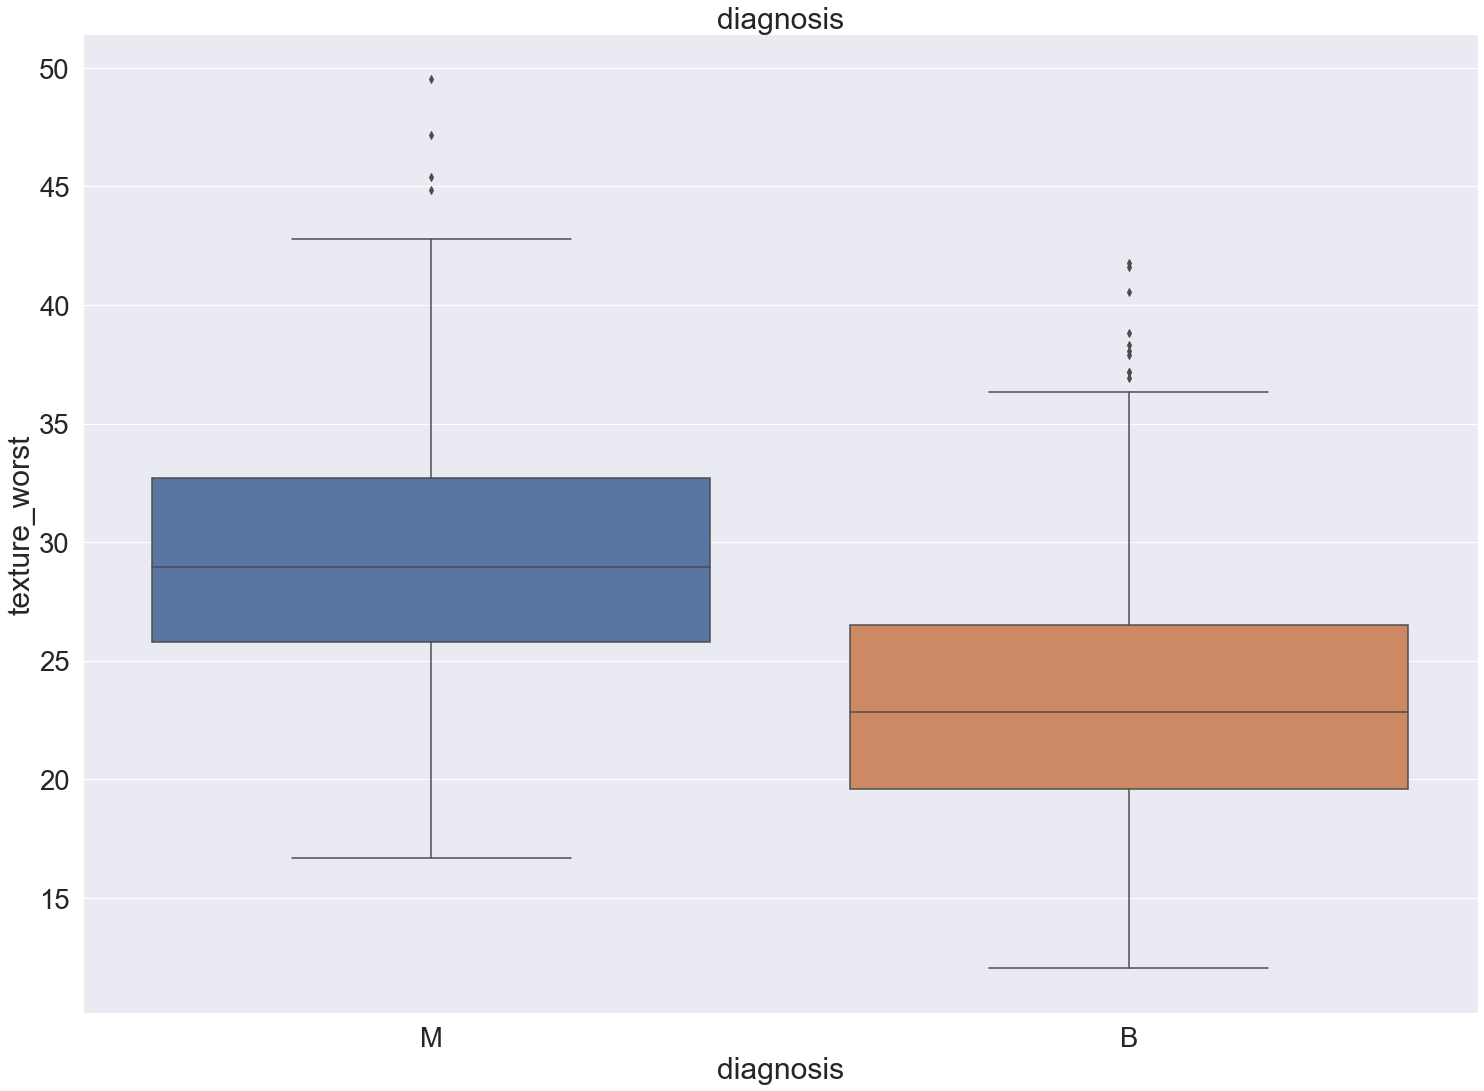

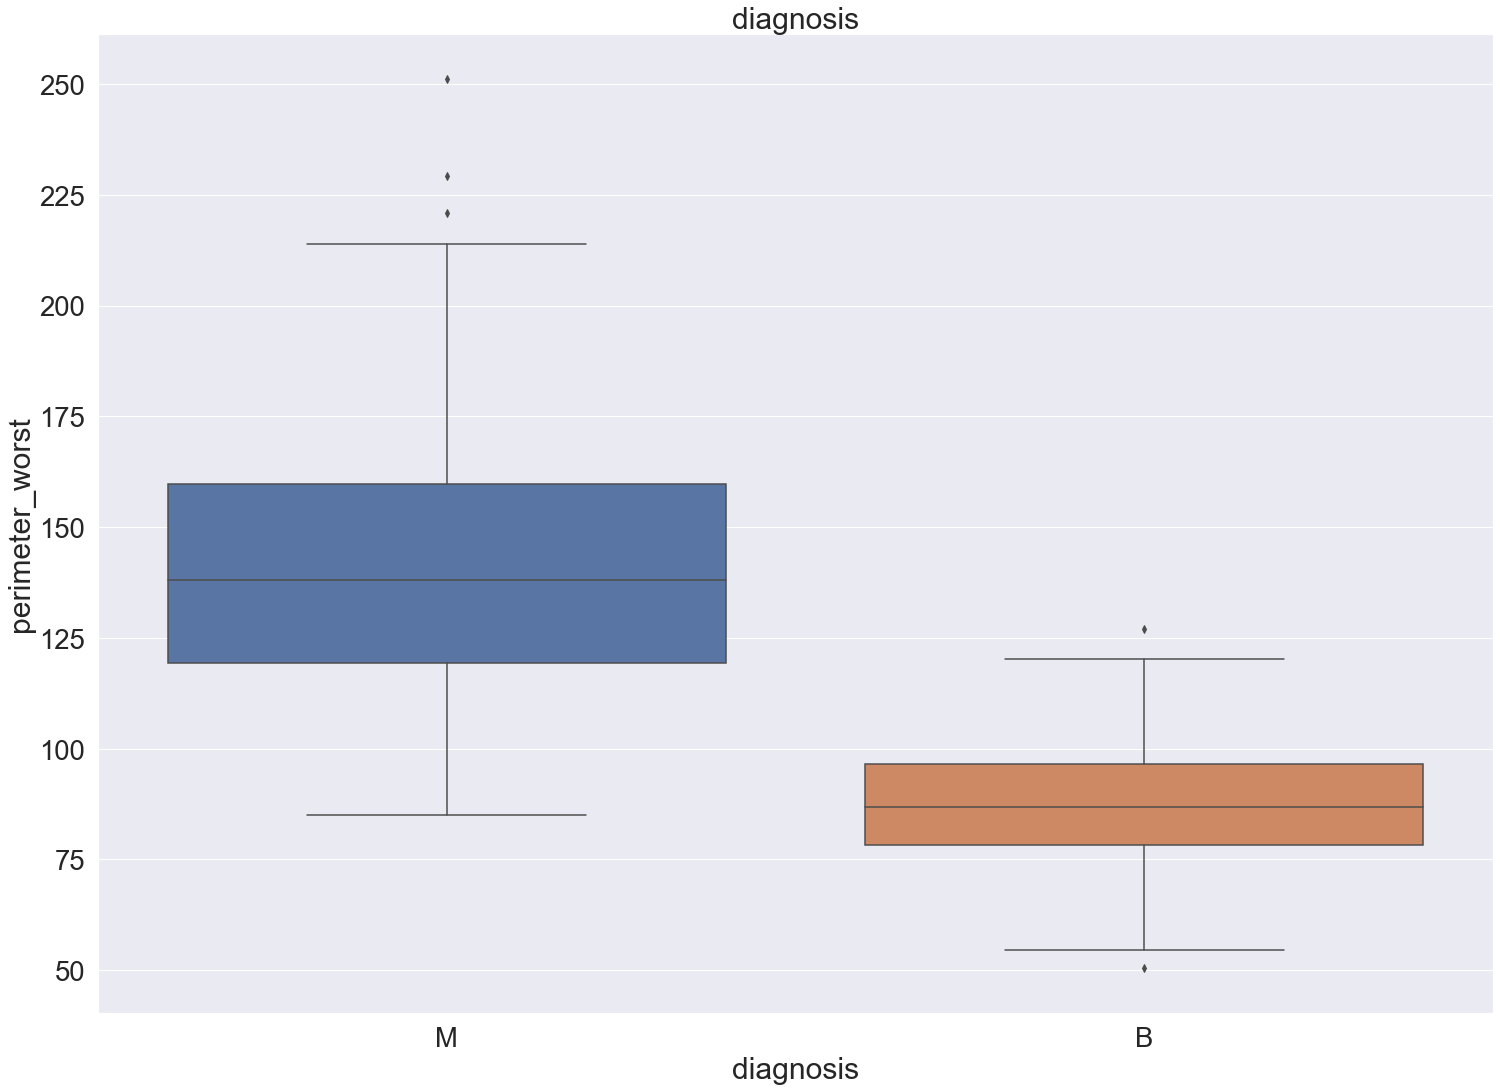

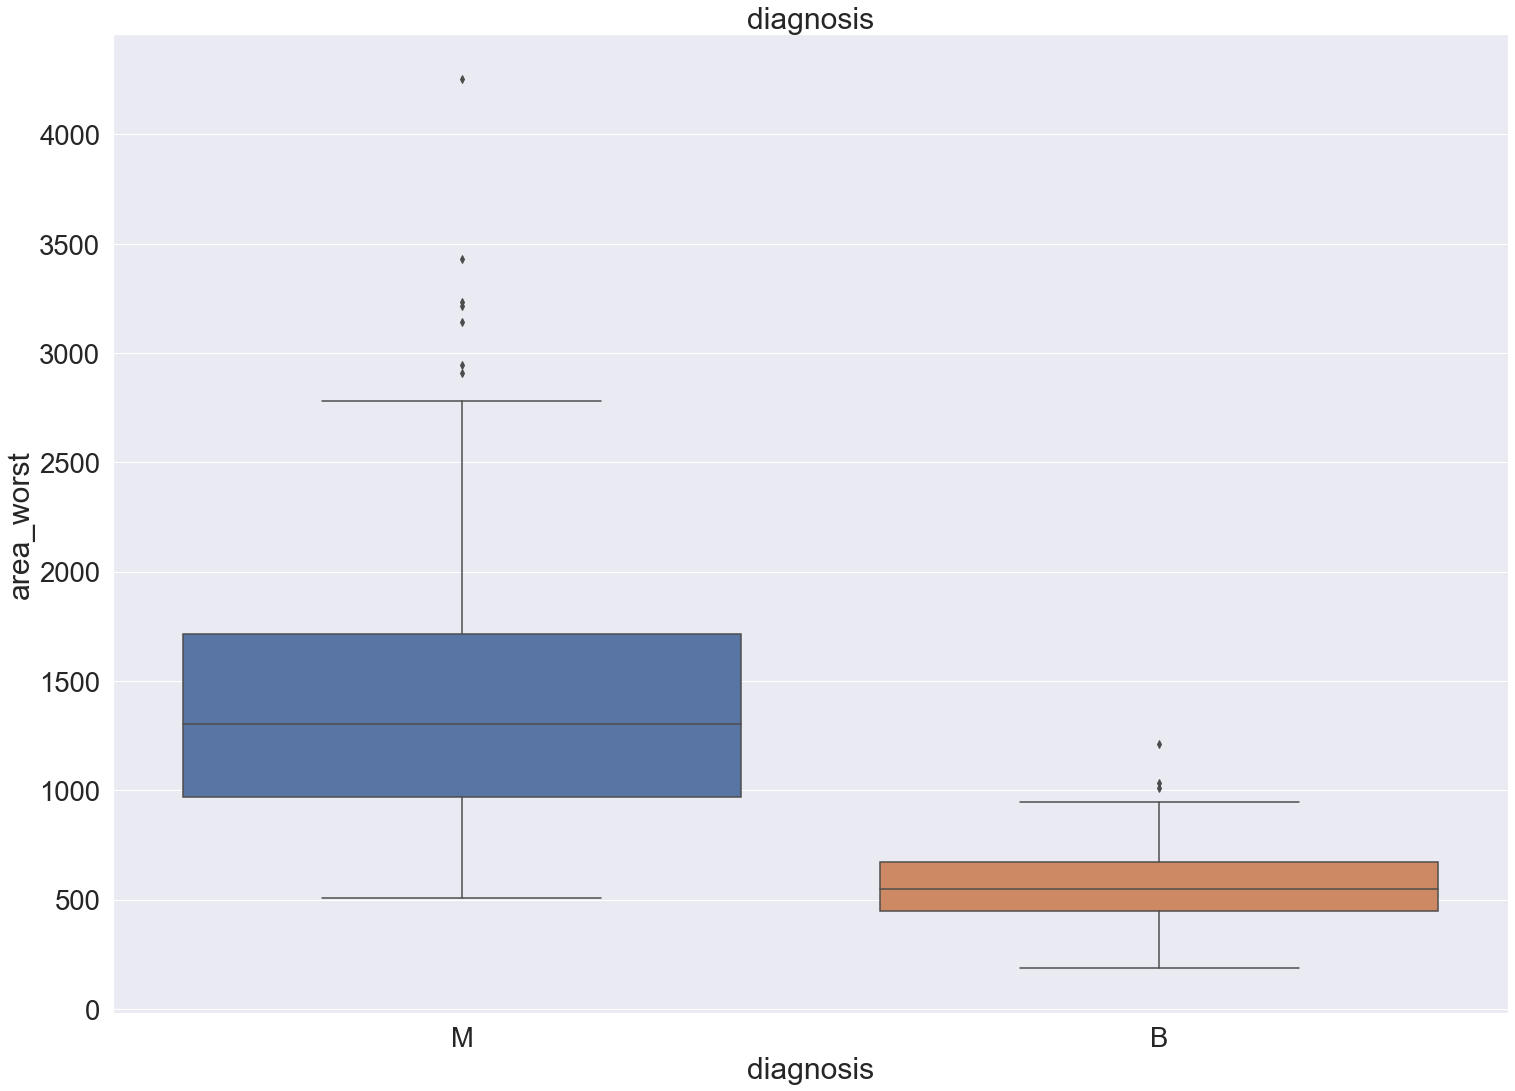

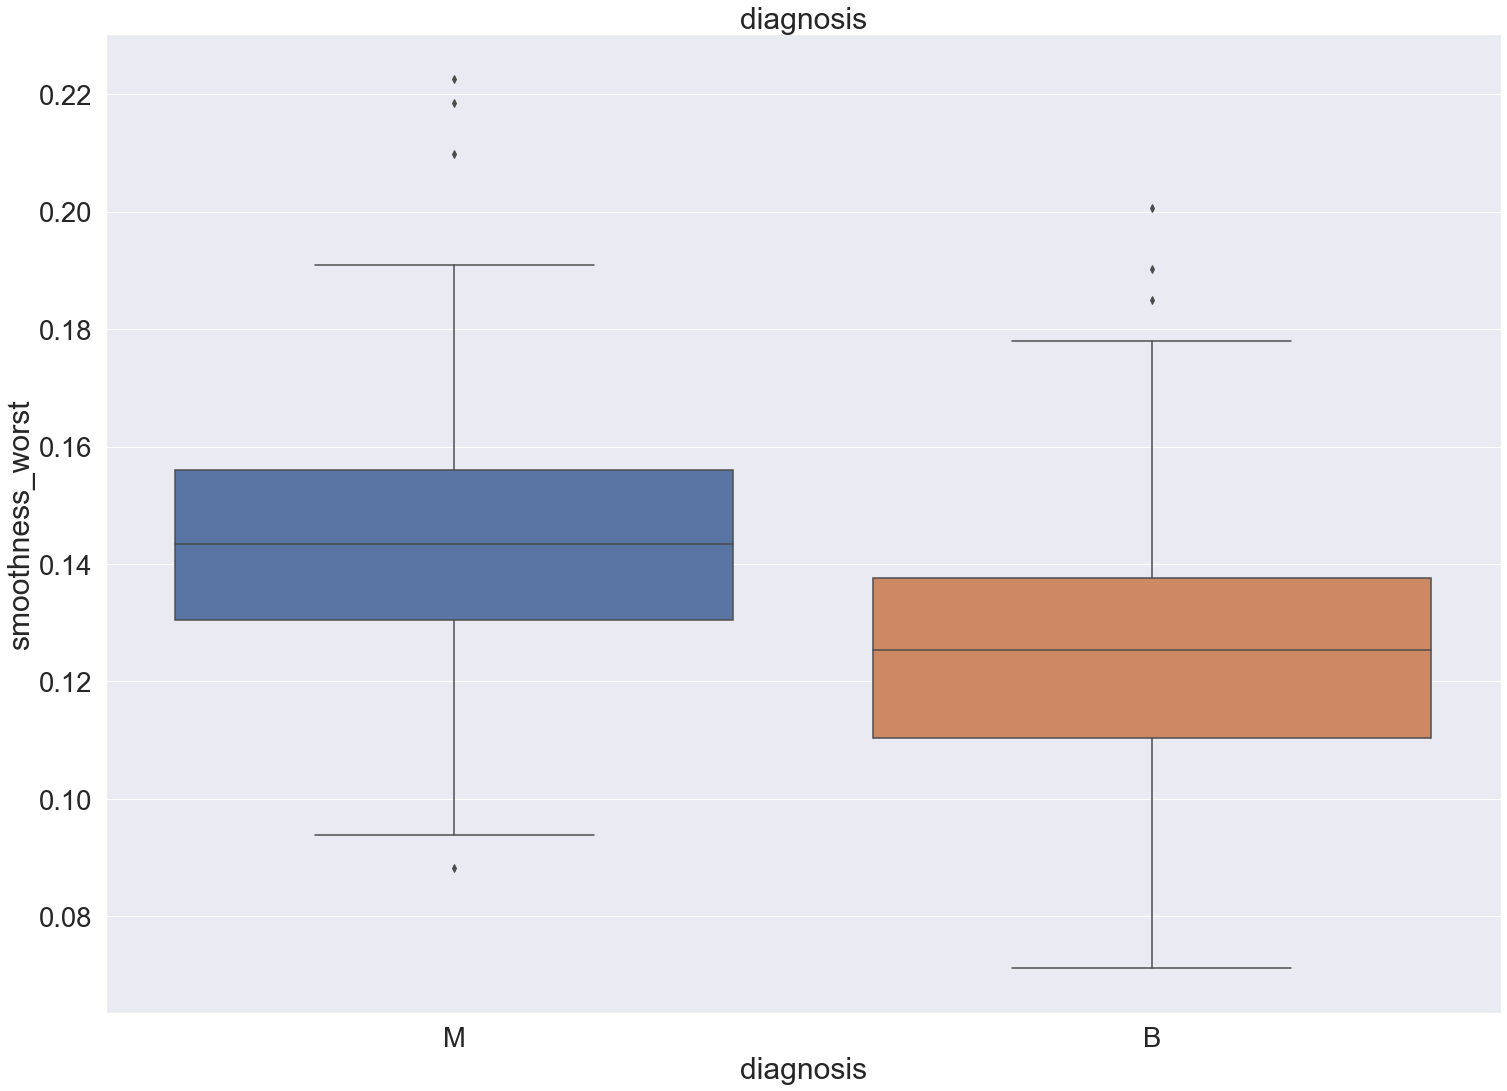

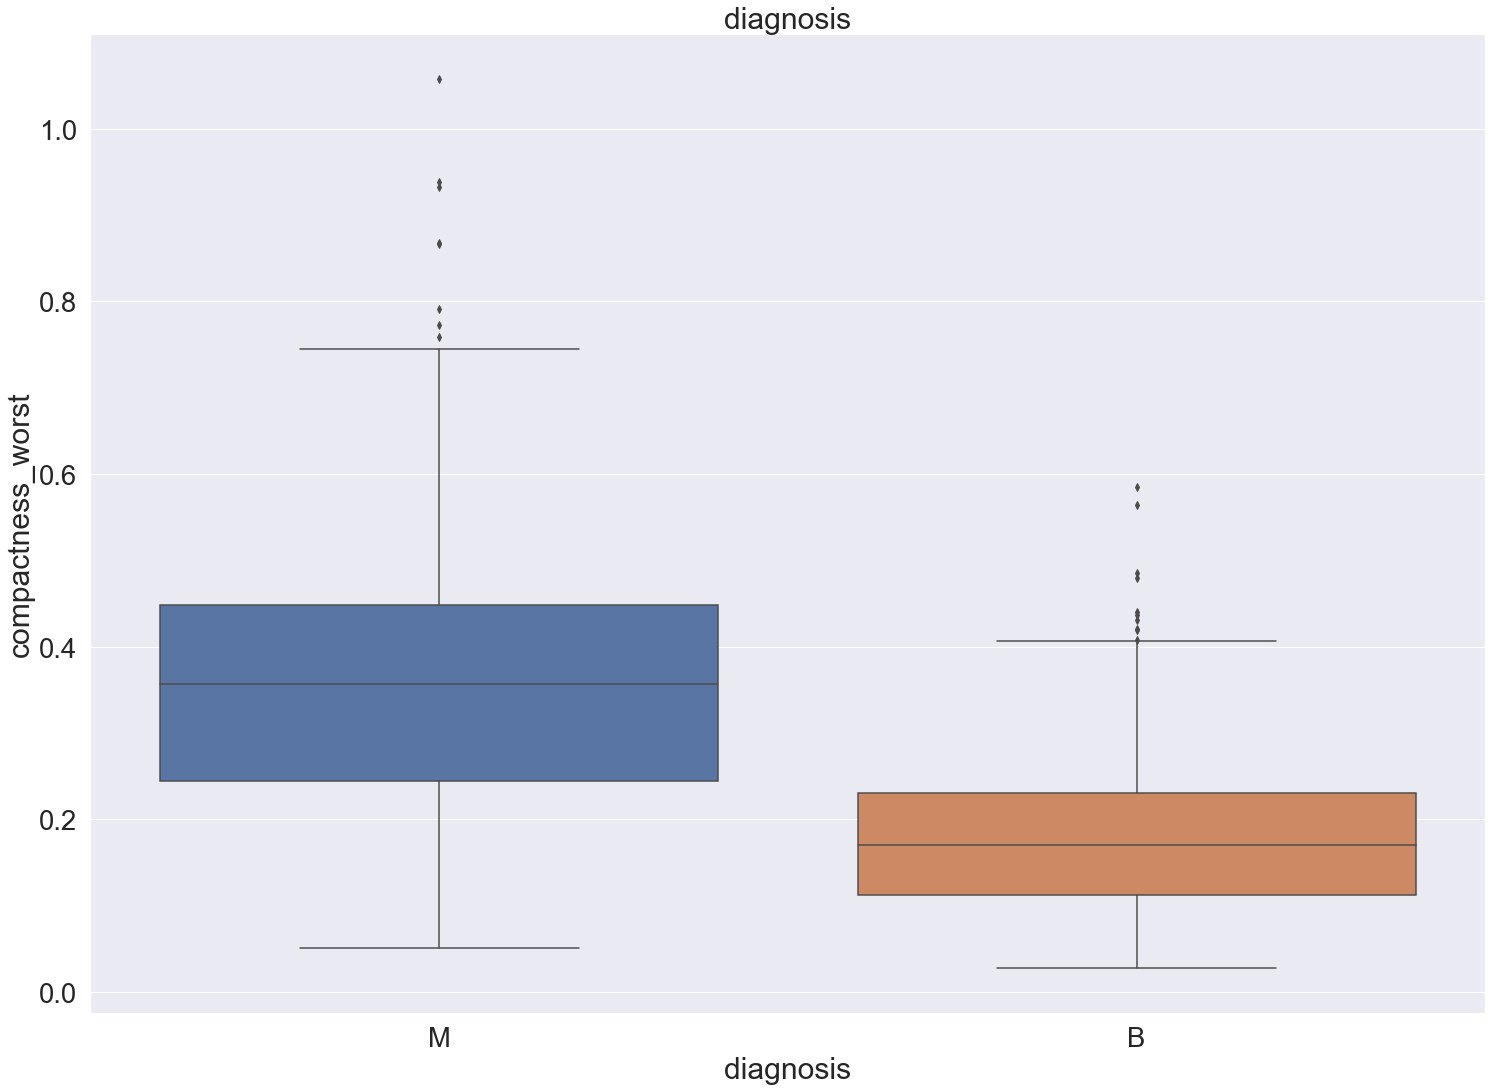

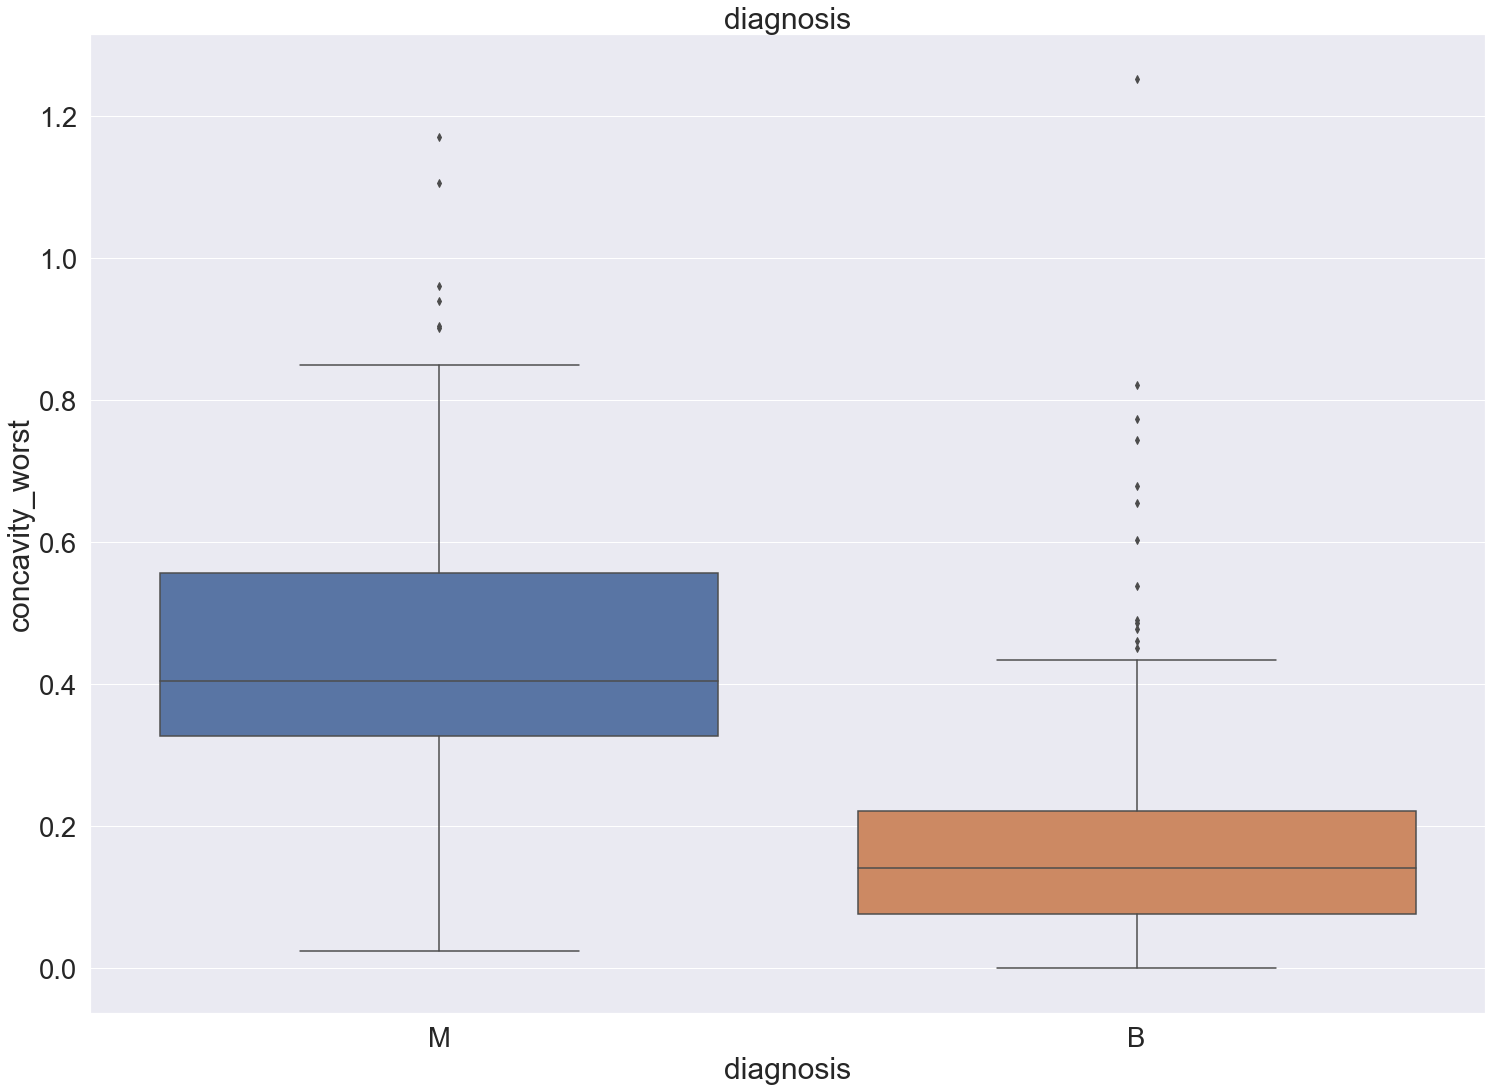

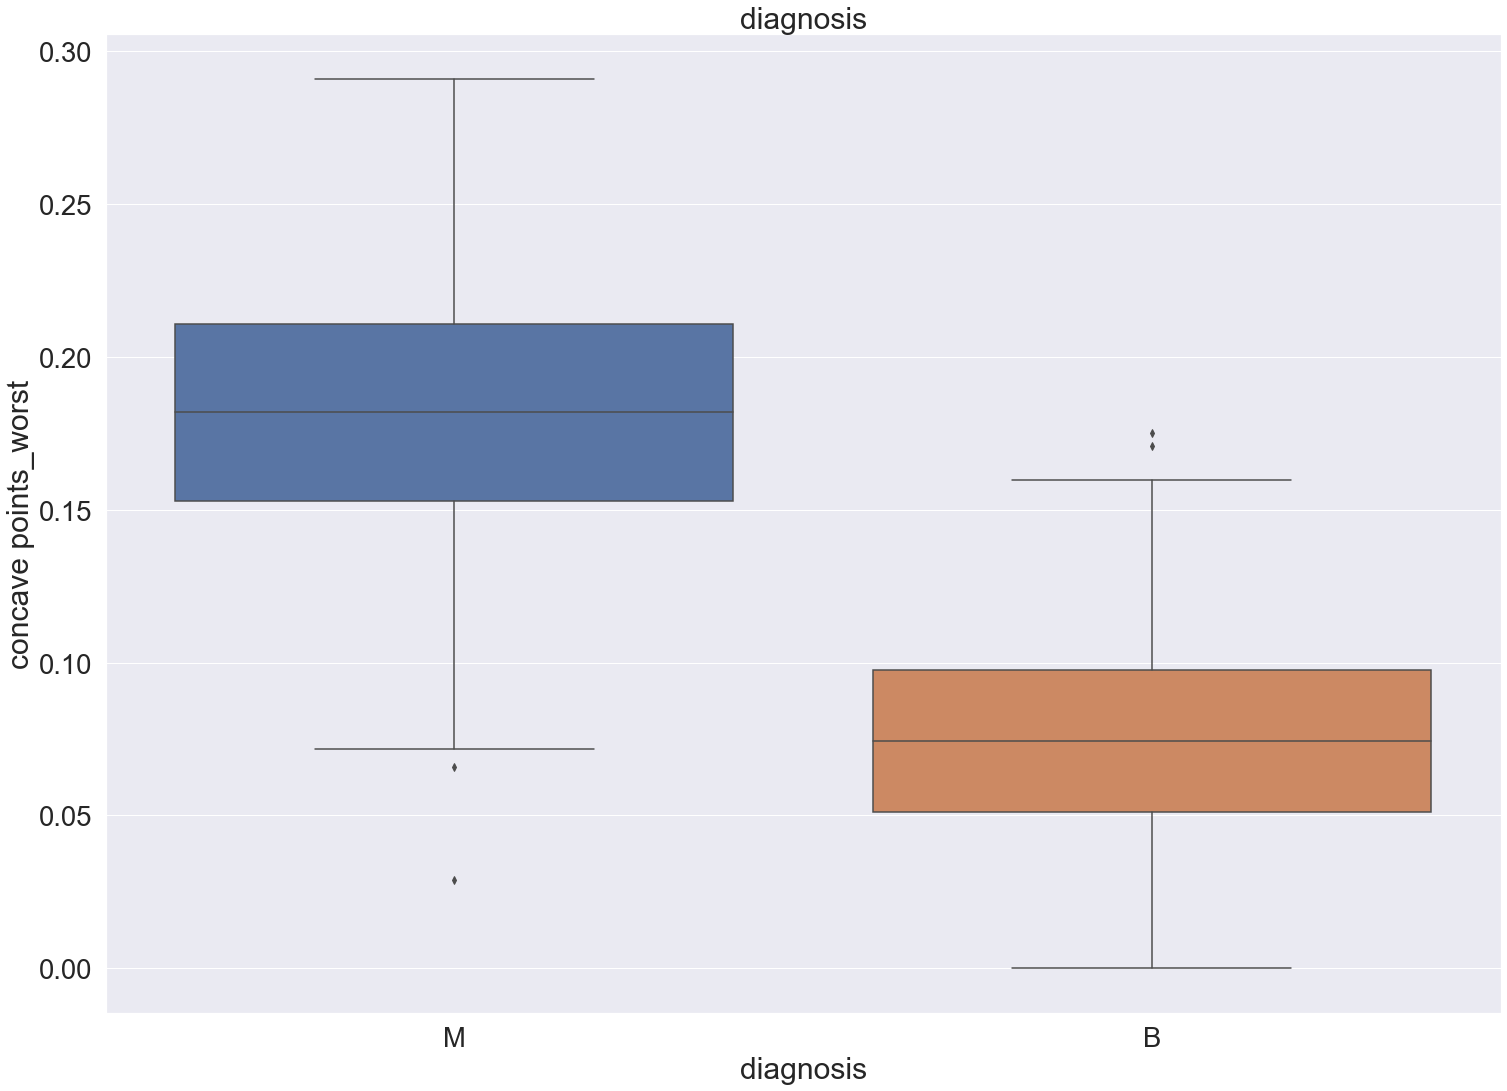

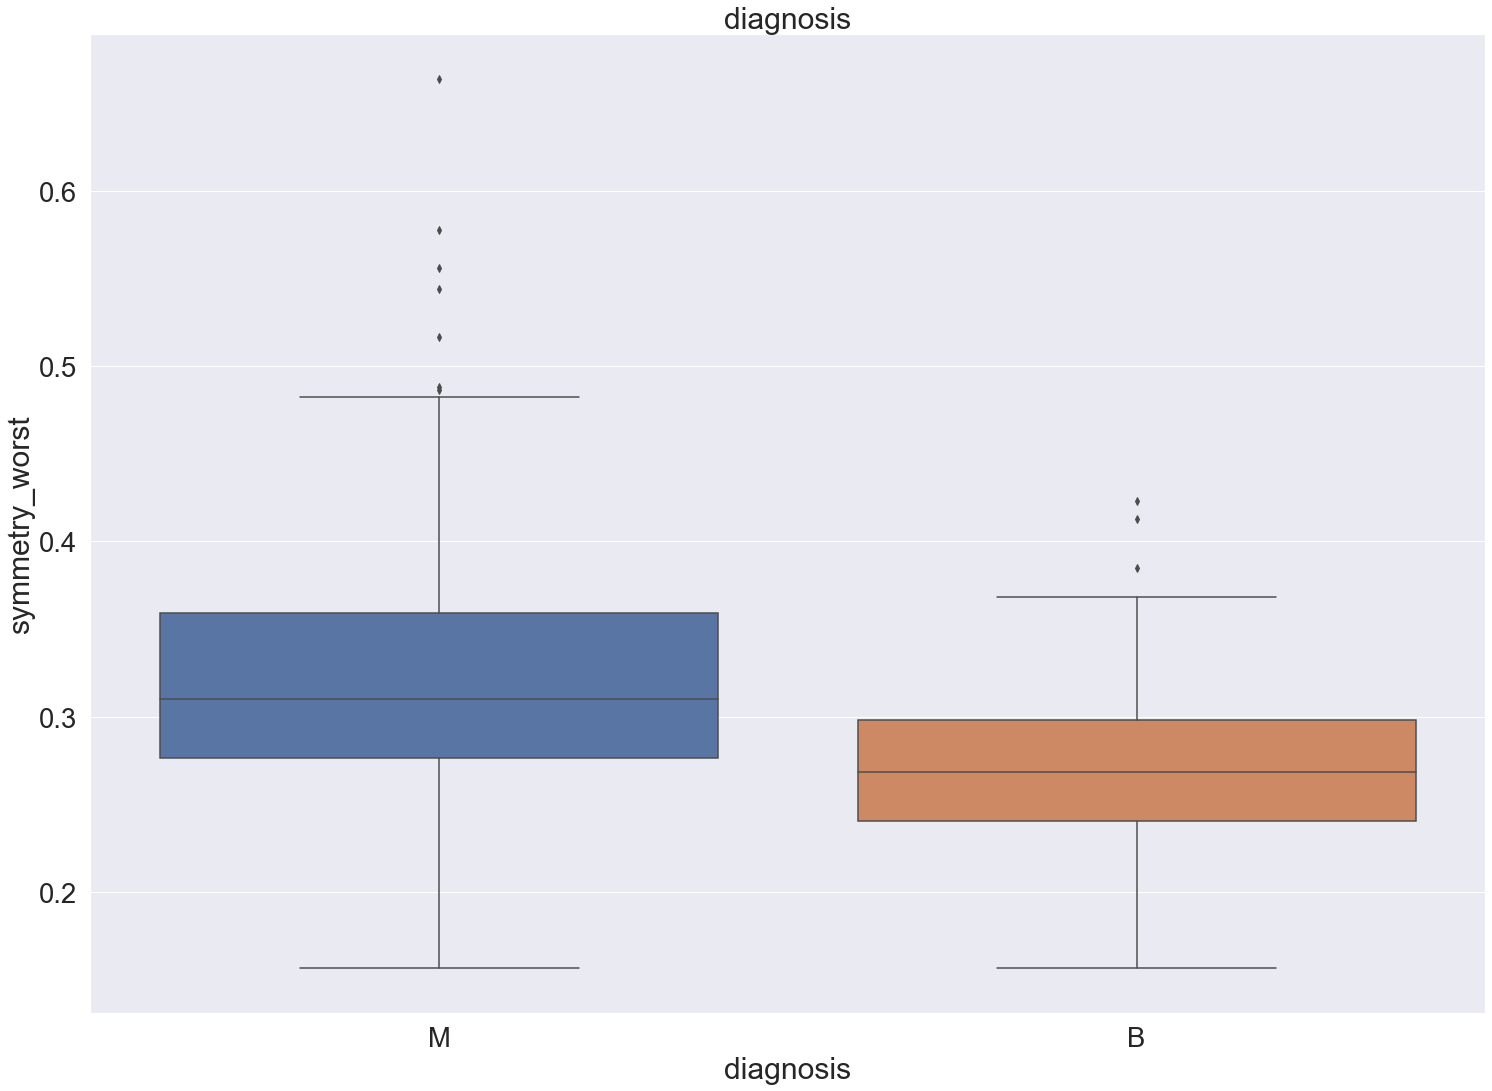

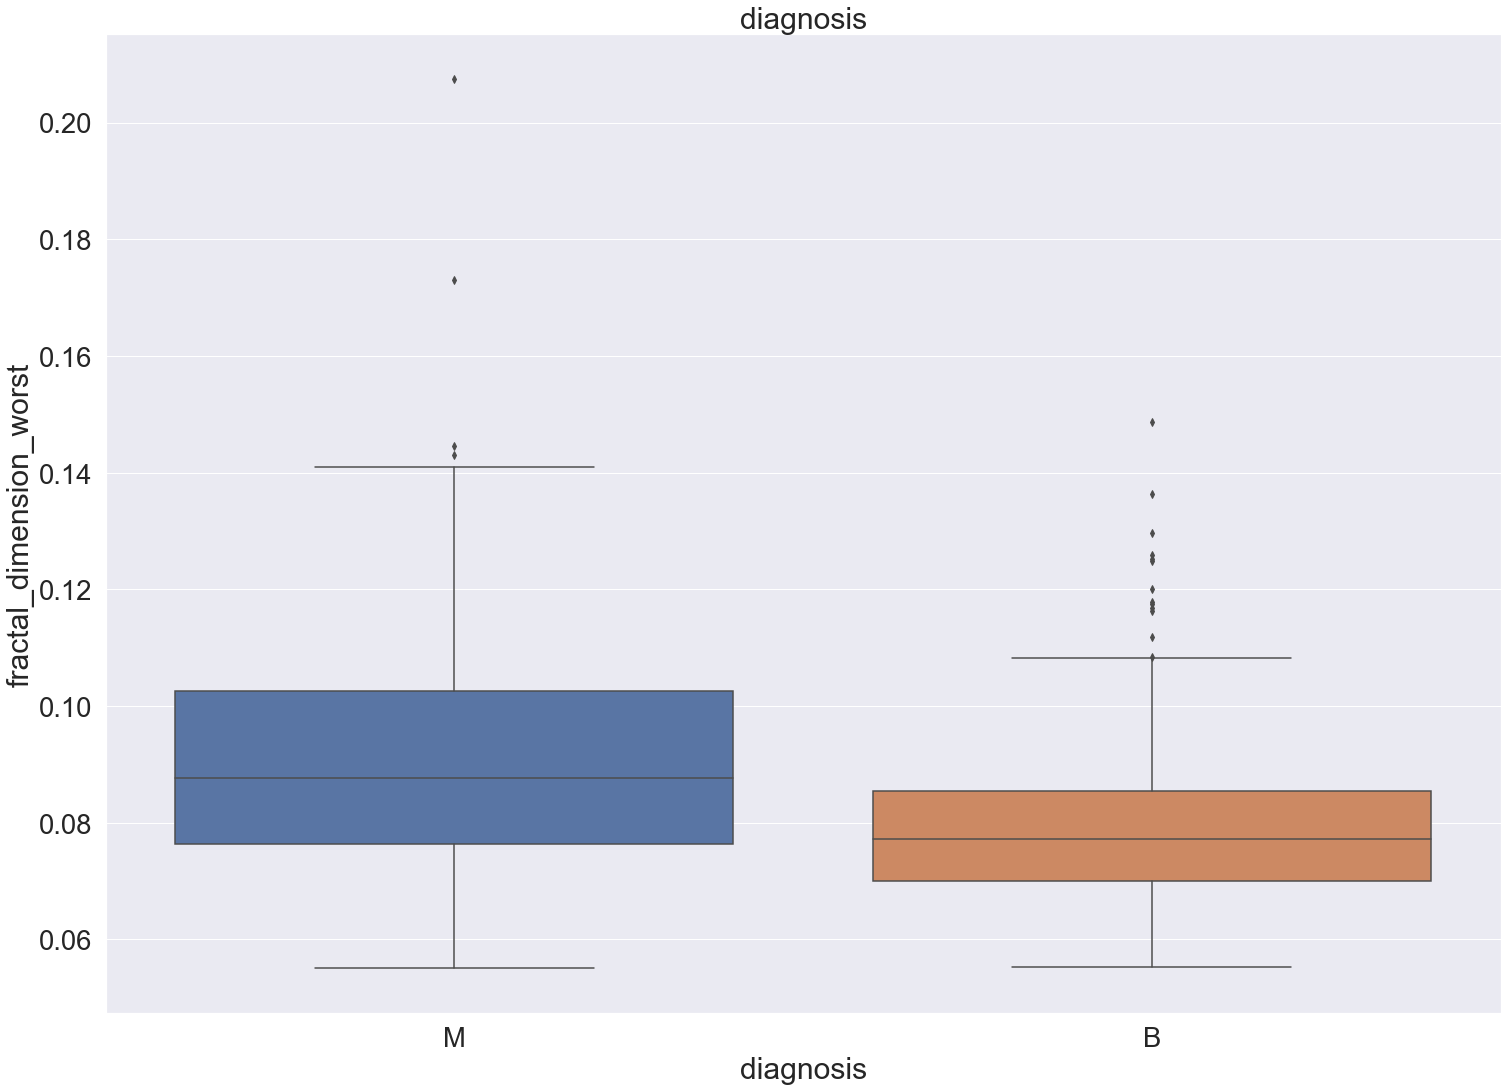

In [12]:
#Function to draw the boxplots
def bivariate_analysis_boxplot(data,categorical_feature,numerical_feature):
            plt.figure(figsize=(25,18))
            sns.set(context='notebook', style='darkgrid',palette='deep', font='sans-serif', font_scale=2.5, color_codes=True, rc=None)
            ax=sns.boxplot(y=data[numerical_feature],x=data[categorical_feature],data=data) 
            plt.ylabel(numerical_feature)
            plt.xlabel(categorical_feature)
            plt.title(categorical_feature)  
            plt.show()
            
#Calling the function for independent and dependent features            
for col in X:
    bivariate_analysis_boxplot(data,'diagnosis',col)

## Stattistical Analysis

### ANOVA Test

- Lets perform the statistical analysis tests to identify the significance of the variables with the target features.

<br>

- We can run the one to one ANOVA Test to find out the significance between the independent and dependent feature

In [13]:
#Function to run the one to one ANOVA Test:
def one_way_anova(data,formula):

            model = ols(formula,data=data).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            
            print('One way ANOVO test results: \nANOVA table: \n%s'%anova_table)
            p_value=anova_table['PR(>F)'][0]
            alpha=0.05
            print('alpha: %s \np_value: %s '%(alpha,p_value))
            if p_value <= alpha:
                print('Result: \np_value < %s \nnull hypothesis is true : \nall the sample means are equal or the factor did not have any significant effect on the results, reject the alternate hypothesis \n\n\n'%alpha) 
            else:
                print('Result: \np_value > %s \nalternate hypothesis is true :\nleast one of the sample means is different from another,reject the null hypothesis and conclude that not all of population means are equal \n\n\n'%alpha)
    

for col in  X[['concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean',
           'radius_mean']]:
    print('ANOVA test between features: %s and diagnosis :'%col)
    one_way_anova(data,'%s~diagnosis'%col)

ANOVA test between features: concavity_mean and diagnosis :
One way ANOVO test results: 
ANOVA table: 
             sum_sq     df           F        PR(>F)
diagnosis  1.750444    1.0  533.793126  9.966556e-84
Residual   1.859337  567.0         NaN           NaN
alpha: 0.05 
p_value: 9.966555755078288e-84 
Result: 
p_value < 0.05 
null hypothesis is true : 
all the sample means are equal or the factor did not have any significant effect on the results, reject the alternate hypothesis 



ANOVA test between features: compactness_mean and diagnosis :
One way ANOVO test results: 
ANOVA table: 
             sum_sq     df           F        PR(>F)
diagnosis  0.563762    1.0  313.233079  3.938263e-56
Residual   1.020496  567.0         NaN           NaN
alpha: 0.05 
p_value: 3.938263105889516e-56 
Result: 
p_value < 0.05 
null hypothesis is true : 
all the sample means are equal or the factor did not have any significant effect on the results, reject the alternate hypothesis 



ANOVA test bet

- From the above statistical analysis, it is clear that some of the independent features have significance with the target features and some of the independent features dont have significance relationship with the dependent feature.

- We need to perform the significance analyis to interpret more about the significance of the independent features. We can use the recursive feature elimination approach for better analysis of the significance of independent feture with the dependent feature.

In [14]:
#Mapping the categorical fetures from the target feature
y_df=pd.DataFrame(y)
y_map=y_df['diagnosis'].map({'M': 0, 'B': 1})


In [15]:
#Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y_map, test_size = 0.30, random_state = 0)

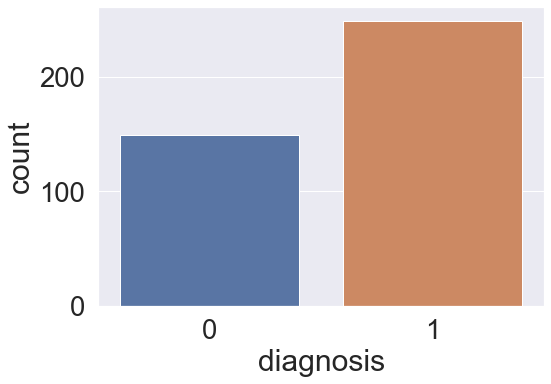

In [16]:
#checking the class imbalance
import seaborn as sns
sns.countplot(y_train)

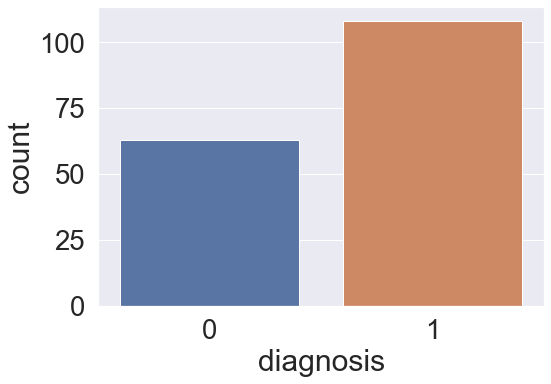

In [17]:
#checking the class imbalance
import seaborn as sns
sns.countplot(y_test)

- From the above graphs it is clear that there is class imbalance in the train and test dataset. We need to treat it with oversampling techniques. We can use SMOTE technique to treat the class imbalance.

In [18]:
#Treating the class imbalance
from imblearn.over_sampling import SMOTE
sample = SMOTE()
X_train_bal,y_train_bal=sample.fit_resample(X_train,y_train)
X_test_bal,y_test_bal=sample.fit_resample(X_test,y_test)


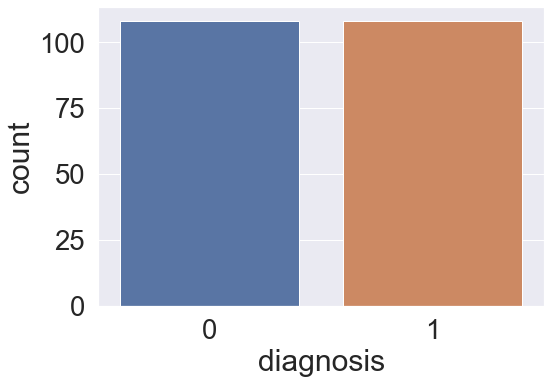

In [19]:
#checking the distribution again after oversampling
sns.countplot(y_test_bal)

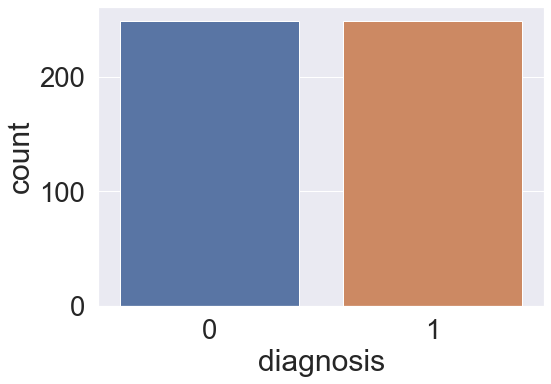

In [20]:
#checking the distribution again for train data after the oversampling
sns.countplot(y_train_bal)

- From the above analysis we can state that by using oversampling with the help of SMOTE technique we removed the problem of class imbalance from the train and trst dataset.

In [21]:
X_train_bal.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       11.490         14.59           73.99      404.9          0.10460   
1       10.490         18.61           66.86      334.3          0.10680   
2       12.250         17.94           78.27      460.3          0.08654   
3       18.310         18.58          118.60     1041.0          0.08588   
4        6.981         13.43           43.79      143.5          0.11700   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.08228         0.05308              0.01969         0.1779   
1           0.06678         0.02297              0.01780         0.1482   
2           0.06679         0.03885              0.02331         0.1970   
3           0.08468         0.08169              0.05814         0.1621   
4           0.07568         0.00000              0.00000         0.1930   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.06574     0.2034      1.1660         1.567   14.340   
1                 0.06600     0.1485      1.5630         1.035   10.080   
2                 0.06228     0.2200      0.9823         1.484   16.510   
3                 0.05425     0.2577      0.4757         1.817   28.920   
4                 0.07818     0.2241      1.5080         1.553    9.833   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.004957        0.021140       0.04156           0.008038   
1       0.008875        0.009362       0.01808           0.009199   
2       0.005518        0.015620       0.01994           0.007924   
3       0.002866        0.009181       0.01412           0.006719   
4       0.010190        0.010840       0.00000           0.000000   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.01843              0.003614         12.40          21.90   
1      0.01791              0.003317         11.06          24.54   
2      0.01799              0.002484         13.59          25.22   
3      0.01069              0.001087         21.31          26.36   
4      0.02659              0.004100          7.93          19.54   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            82.04       467.6            0.1352             0.2010   
1            70.76       375.4            0.1413             0.1044   
2            86.60       564.2            0.1217             0.1788   
3           139.20      1410.0            0.1234             0.2445   
4            50.41       185.2            0.1584             0.1202   

   concavity_worst  concave points_worst  symmetry_worst  \
0          0.25960               0.07431          0.2941   
1          0.08423               0.06528          0.2213   
2          0.19430               0.08211          0.3113   
3          0.35380               0.15710          0.3206   
4          0.00000               0.00000          0.2932   

   fractal_dimension_worst  
0                  0.09180  
1                  0.07842  
2                  0.08132  
3                  0.06938  
4                  0.09382

- From the above data we can observe that there is difference between units of the independepnt features hence we need to perform the scaling operation to normalize the data. <br>
- Here with the help of standard scaler we are performing the standard scaling operation on the train and the test data seperately.

In [22]:
# Scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_bal)
X_scaled_test = scaler.transform(X_test_bal)

In [23]:
#Converting scaled array data into dataframe
X_scaled_train=pd.DataFrame(X_scaled_train,columns=[X_train_bal.columns])
X_scaled_test=pd.DataFrame(X_scaled_test,columns=[X_test_bal.columns])

### Feature importance using recursive feature elimination

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from sklearn.metrics import r2_score,accuracy_score

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [25]:
#Lets findout feature importance with the recursive feature elimination process

sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_scaled_train, y_train_bal)


def run_randomForest(X_scaled_train,X_scaled_test, y_train_bal, y_test_bal):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_scaled_train, y_train_bal)
    y_pred = clf.predict(X_scaled_test)
    print('Accuracy: ', regre(y_test_bal, y_pred))


In [26]:
#Lets iterate through the number of selected feature amd accuracy
#The number of fetures givivng best and stable accuracy will be the optimum number of features

for index in range(1, 31):
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = index)
    sel.fit(X_scaled_train, y_train_bal)
    X_train_rfe = sel.transform(X_scaled_train)
    X_test_rfe = sel.transform(X_scaled_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train_bal, y_test_bal)
    print()

Selected Feature:  1
Accuracy:  0.8472222222222222

Selected Feature:  2
Accuracy:  0.875

Selected Feature:  3
Accuracy:  0.9027777777777778

Selected Feature:  4
Accuracy:  0.9305555555555556

Selected Feature:  5
Accuracy:  0.9444444444444444

Selected Feature:  6
Accuracy:  0.9351851851851852

Selected Feature:  7
Accuracy:  0.9305555555555556

Selected Feature:  8
Accuracy:  0.9398148148148148

Selected Feature:  9
Accuracy:  0.9259259259259259

Selected Feature:  10
Accuracy:  0.9444444444444444

Selected Feature:  11
Accuracy:  0.9398148148148148

Selected Feature:  12
Accuracy:  0.9444444444444444

Selected Feature:  13
Accuracy:  0.9444444444444444

Selected Feature:  14
Accuracy:  0.9398148148148148

Selected Feature:  15
Accuracy:  0.9490740740740741

Selected Feature:  16
Accuracy:  0.9537037037037037

Selected Feature:  17
Accuracy:  0.9537037037037037

Selected Feature:  18
Accuracy:  0.9351851851851852

Selected Feature:  19
Accuracy:  0.9444444444444444

Selected Featur

In [27]:

#Using 7 optimum features calculating the accuracy using gradient boosting clssifier
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 7)
sel.fit(X_scaled_train, y_train_bal)
X_train_rfe = sel.transform(X_scaled_train)
X_test_rfe = sel.transform(X_scaled_test)
print('Selected Feature: ', 7)
run_randomForest(X_train_rfe, X_test_rfe, y_train_bal, y_test_bal)
print()

Selected Feature:  7
Accuracy:  0.9305555555555556



In [28]:
# Getting the best parameters whih gives the best accuracy
features = X_scaled_train.columns[sel.get_support()]
features

MultiIndex([( 'concave points_mean',),
            (             'area_se',),
            (       'texture_worst',),
            (     'perimeter_worst',),
            (          'area_worst',),
            (     'concavity_worst',),
            ('concave points_worst',)],
           )

In [31]:
#Applying the random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve


Model : Random Forest withot Feature selection and Without Hyperparameter Tunning 
 

Confusion Matrix:  
 [[103   5]
 [  4 104]] 
 

Training Score: 
1.0 
 

Test Score/Accuracy Score:
 0.9583333333333334 
 

Precision: 
 0.9537037037037037 
 

Recall:  0.9626168224299065 
 

F1_Score: 
 0.958139534883721 
 

roc_auc_score: 
 0.9583333333333333 
 



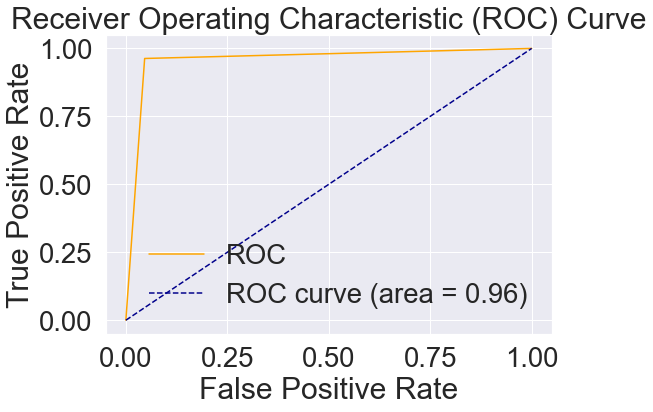

[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished


Text(0, 0.5, 'Accuracy Score')

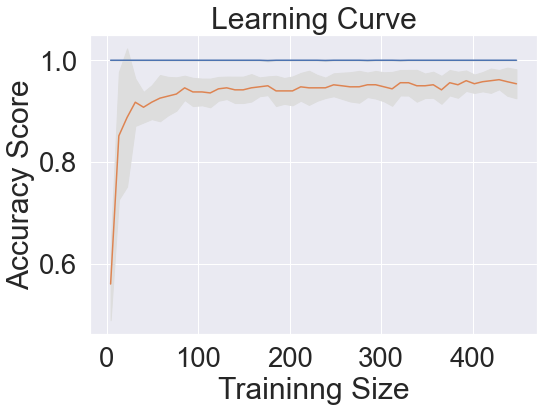

In [36]:
#Random forest model without feature selection and without hyperparameter tunning

print("Model : Random Forest withot Feature selection and Without Hyperparameter Tunning \n \n")

rand_clf = RandomForestClassifier(random_state=6)

rand_clf.fit(X_scaled_train,y_train_bal)
y_pred_rf = rand_clf.predict(X_scaled_test)

conf_mat = confusion_matrix(y_test_bal, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")



print("Training Score: ")
print(rand_clf.score(X_scaled_train, y_train_bal),'\n \n')



true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_rf)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test Score/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")



import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()





#Learning curve for the above model

#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(),X_scaled_train,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

Model : Random Forest with Feature selection and Without Hyperparameter Tunning 
 

Confusion Matrix:  
 [[100   8]
 [  5 103]] 
 

Training Score: 
1.0 
 

Test/Accuracy Score:
 0.9398148148148148 
 

Precision: 
 0.9259259259259259 
 

Recall:  0.9523809523809523 
 

F1_Score: 
 0.9389671361502347 
 

roc_auc_score: 
 0.9398148148148148 
 



[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished


Text(0, 0.5, 'Accuracy Score')

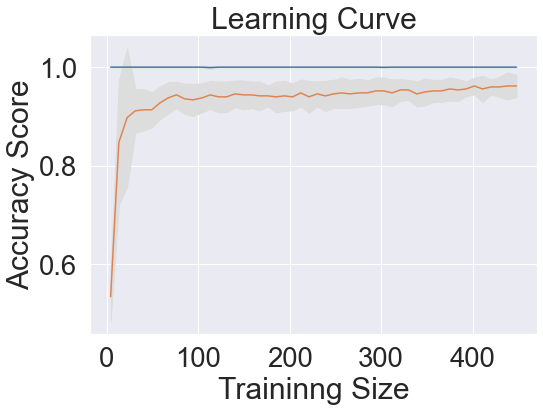

In [53]:
#Random forest with recursive feature selection

print("Model : Random Forest with Feature selection and Without Hyperparameter Tunning \n \n")

X_rfe_train=X_scaled_train[['concave points_mean','area_se','texture_worst','perimeter_worst',
                          'area_worst','concavity_worst','concave points_worst' ]]
X_rfe_test=X_scaled_test[['concave points_mean','area_se','texture_worst','perimeter_worst',
                          'area_worst','concavity_worst','concave points_worst' ]]



rand_clf_rfe = RandomForestClassifier(random_state=6)

rand_clf_rfe.fit(X_rfe_train,y_train_bal)
y_pred_rf = rand_clf_rfe.predict(X_rfe_test)

conf_mat = confusion_matrix(y_test_bal, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")



print("Training Score: ")
print(rand_clf_rfe.score(X_rfe_train, y_train_bal),'\n \n')


true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_rf)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")


# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(),X_scaled_train,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

In [38]:
#Random forest with hyperparameter tunning
#with feature selection

#Lets findout the best parameters for random forest using the gridsearch cv algorithm

#parameters for grid search
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

grid_search.fit(X_rfe_train,y_train_bal)

#let's see the best parameters as per our grid search
grid_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


{'criterion': 'gini', 'n_estimators': 90}

Model : Random Forest with Feature selection and With Hyperparameter Tunning 
 

Confusion Matrix:  
 [[ 99   9]
 [  2 106]] 
 

Training Score: 
1.0 
 

Test/Accuracy Score:
 0.9490740740740741 
 

Precision: 
 0.9166666666666666 
 

Recall:  0.9801980198019802 
 

F1_Score: 
 0.9473684210526315 
 

roc_auc_score: 
 0.9490740740740741 
 



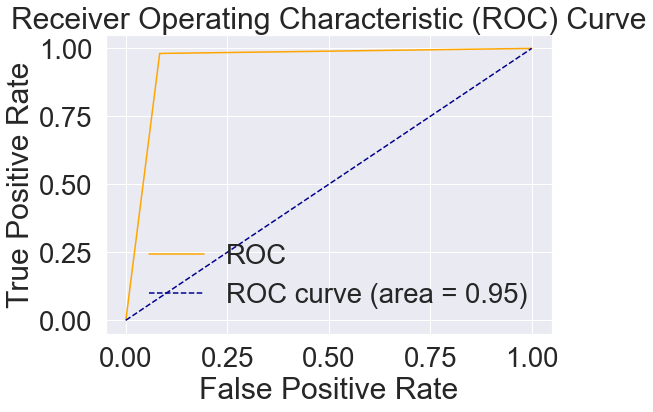

[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.7min finished


Text(0, 0.5, 'Accuracy Score')

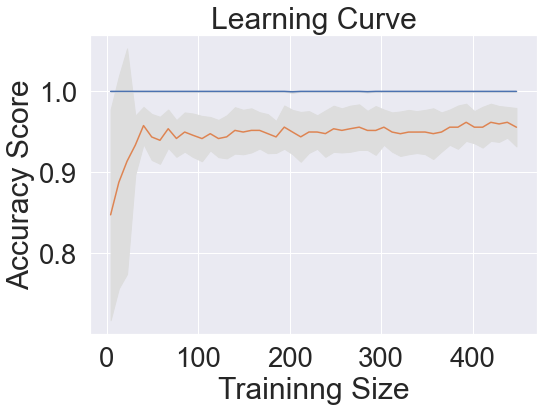

In [39]:
#Fitting Random Forest Model With Hyperparameter tunning


print("Model : Random Forest with Feature selection and With Hyperparameter Tunning \n \n")


X_rfe_train=X_scaled_train[['concave points_mean','area_se','texture_worst','perimeter_worst',
                          'area_worst','concavity_worst','concave points_worst' ]]
X_rfe_test=X_scaled_test[['concave points_mean','area_se','texture_worst','perimeter_worst',
                          'area_worst','concavity_worst','concave points_worst' ]]



rand_clf_tunning = RandomForestClassifier(criterion= 'entropy',n_estimators=115,
                                          max_depth = 12,min_samples_leaf = 1,
 min_samples_split= 5,random_state=6)

rand_clf_tunning.fit(X_rfe_train,y_train_bal)
y_pred_rf = rand_clf_tunning.predict(X_rfe_test)

conf_mat = confusion_matrix(y_test_bal, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")



print("Training Score: ")
print(rand_clf.score(X_rfe_train, y_train_bal),'\n \n')


true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_rf)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()





#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(),X_rfe_train,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

Model : Support Vector Classifier with Optimum Feature selection 
 

Confusion Matrix:  
 [[101   7]
 [  5 103]] 
 

Training Score: 
1.0 
 

Test/Accuracy Score:
 0.9444444444444444 
 

Precision: 
 0.9351851851851852 
 

Recall:  0.9528301886792453 
 

F1_Score: 
 0.9439252336448598 
 

roc_auc_score: 
 0.9444444444444445 
 



[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 549, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarni

Text(0, 0.5, 'Accuracy Score')

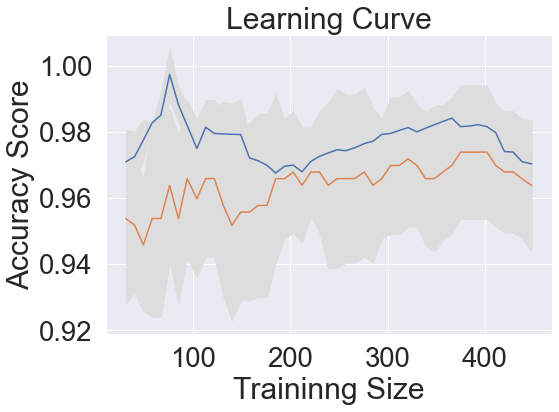

In [40]:
#Applying support Vector Classifier
print("Model : Support Vector Classifier with Optimum Feature selection \n \n")


from sklearn.svm import SVC
model=SVC()
model.fit(X_rfe_train,y_train_bal)

y_pred = model.predict(X_rfe_test)

conf_mat = confusion_matrix(y_test_bal, y_pred)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

print("Training Score: ")
print(rand_clf.score(X_rfe_train, y_train_bal),'\n \n')

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve(SVC(),X_rfe_train,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

In [40]:
#Applying PCA For Dimensionality Reduction

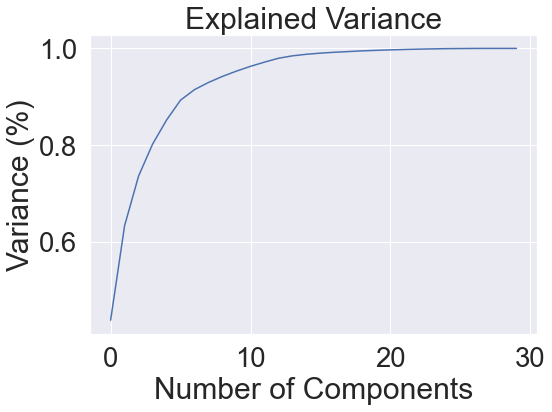

In [41]:

#PCA on train data
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

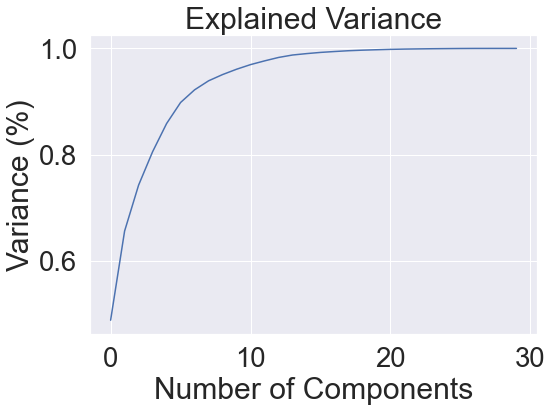

In [42]:

#pca on test data

from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [43]:
#Selecting mumber of componenets according to variance explained

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_scaled_train)
X_train_pca=pd.DataFrame(X_train_pca)

X_test_pca=pca.fit_transform(X_scaled_test)
X_test_pca=pd.DataFrame(X_test_pca)


print('Explained Variance Ratio:  \n')
pca.explained_variance_ratio_

Explained Variance Ratio:  



array([0.48764841, 0.16814246, 0.086523  , 0.0629324 , 0.05309537,
       0.03971485, 0.02384921, 0.01701543, 0.01176614, 0.01005909,
       0.0087148 , 0.00702621, 0.00646907, 0.00459661, 0.00264262])

In [44]:
X_test_pca.head()

0         1         2         3         4         5         6  \
0  1.713933  1.306375 -2.461311  0.443177 -0.726028  0.386052 -0.273170   
1 -3.677981 -1.427619  0.381225  1.875552 -0.423209  0.908602  0.275625   
2 -4.317578 -1.527996 -0.140942 -1.157789  1.589619 -0.157938 -0.271073   
3 -3.891191 -1.957368 -0.632433  0.702423  2.071733 -0.650238 -0.558654   
4 -4.477116 -0.800198  2.003872  0.137630 -0.052265 -1.018176 -0.509939   

          7         8         9        10        11        12        13  \
0 -0.776916  0.635929  0.241156 -0.351311 -0.215670  0.374645 -0.526257   
1 -0.563258  0.088594  0.300326  0.276043  0.384830 -0.150452  0.376951   
2 -0.353044 -0.211949  0.338177 -0.362977  0.119668 -0.014169 -0.345118   
3  0.531697  0.204918 -0.012966 -0.114719  0.234546 -0.002943 -0.500846   
4 -1.929748 -1.000383 -0.588112  0.713001 -0.547394  0.337107  0.090745   

         14  
0 -0.079421  
1 -0.033082  
2  0.061900  
3  0.345226  
4 -0.359840

In [45]:
pca.explained_variance_ratio_

array([0.48764841, 0.16814246, 0.086523  , 0.0629324 , 0.05309537,
       0.03971485, 0.02384921, 0.01701543, 0.01176614, 0.01005909,
       0.0087148 , 0.00702621, 0.00646907, 0.00459661, 0.00264262])

In [ ]:
X_train_pca
X_test_pca
y_train_bal
y_test_bal


Model:  Random Forest on PCA Data 


Confusion Matrix:  
 [[95 13]
 [15 93]] 
 

Training Score: 
0.9979919678714859 
 

Test/Accuracy Score:
 0.8703703703703703 
 

Precision: 
 0.8796296296296297 
 

Recall:  0.8636363636363636 
 

F1_Score: 
 0.8715596330275229 
 

roc_auc_score: 
 0.8703703703703705 
 



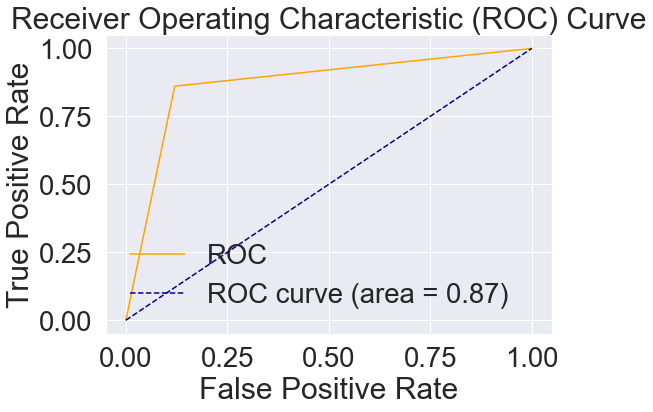

[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished


Text(0, 0.5, 'Accuracy Score')

In [54]:
#Random Forest on PCA Data
print("Model:  Random Forest on PCA Data \n\n")


rand_clf_pca = RandomForestClassifier(criterion= 'entropy',n_estimators=115,
                                          max_depth = 12,min_samples_leaf = 1,
                                  min_samples_split= 5,random_state=6)


rand_clf_pca.fit(X_train_pca,y_train_bal)
y_pred_rf = rand_clf_pca.predict(X_test_pca)

conf_mat = confusion_matrix(y_test_bal, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_rf)

print("Training Score: ")
print(rand_clf_pca.score(X_train_pca, y_train_bal),'\n \n')

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()




#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve( RandomForestClassifier(criterion= 'entropy',n_estimators=115,
                                          max_depth = 12,min_samples_leaf = 1,
                                  min_samples_split= 5,random_state=6),X_train_pca,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

Model:  Logistic Regression on PCA Data 


Confusion Matrix:  
 [[101   7]
 [  8 100]] 
 

Training Score: 
0.9979919678714859 
 

Test/Accuracy Score:
 0.9305555555555556 
 

Precision: 
 0.9351851851851852 
 

Recall:  0.926605504587156 
 

F1_Score: 
 0.9308755760368663 
 

roc_auc_score: 
 0.9305555555555557 
 



[learning_curve] Training set sizes: [  4  13  22  31  40  49  58  67  76  85  94 104 113 122 131 140 149 158
 167 176 185 194 203 212 221 230 239 248 257 266 276 285 294 303 312 321
 330 339 348 357 366 375 384 393 402 411 420 429 438 448]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score o

Text(0, 0.5, 'Accuracy Score')

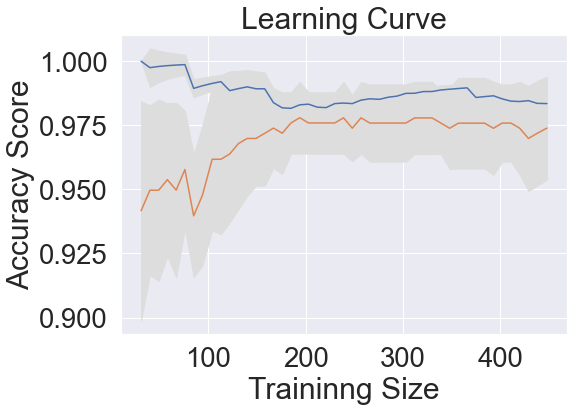

In [51]:
#Logistic Regression on PCA Data
print("Model:  Logistic Regression on PCA Data \n\n")


from sklearn.linear_model  import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_pca,y_train_bal)

y_pred_rf = log_reg.predict(X_test_pca)

conf_mat = confusion_matrix(y_test_bal, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_rf)

print("Training Score: ")
print(rand_clf.score(X_train_pca, y_train_bal),'\n \n')

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Test/Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test_bal, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



#lets define the parameters for the learning curve
train_sizes,train_scores,test_scores=learning_curve(LogisticRegression(),X_train_pca,y_train_bal,
                                                    cv=10,scoring='accuracy',
                                                    n_jobs=1,train_sizes=np.linspace(0.01,1,50),
                                                    verbose=1)

#Lets get the mean and std values for train and test scores
train_mean=np.mean(train_scores,axis=1)
train_Std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)


#Lets plot the learning curve between Accuracy Score and training sizze
plt.plot(train_sizes,train_mean,label="Training Score")
plt.plot(train_sizes,test_mean,label="CV Score")
plt.fill_between(train_sizes,train_mean-train_Std,train_mean+train_Std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Traininng Size")
plt.ylabel("Accuracy Score")

### From the above analysis we can interpret that random forest with hyper parameter tuning gives us the best auc score of 0.94 and best precision and recall values comparing with other algorithms. Hence the random forest with the hyper parameter tuning is best suited model for this data.

In [ ]:
#saving models
import pickle
# Writing different model files to file


#Random forest model without feature selection and without hyperparameter tunning
with open( 'random_forest.sav', 'wb') as f:
pickle.dump(rand_clf,f)
    
    
#Random forest with recursive feature selection
with open('random_forest_rfe.sav', 'wb') as f:
pickle.dump(rand_clf_rfe,f)

    
#Random Forest Model With Hyperparameter tunning
with open('random_forest_hy_tunning.sav', 'wb') as f:
pickle.dump(rand_clf_tunning,f)


#Applying support Vector Classifier    
with open('support_vector_Classifier.sav', 'wb') as f:
pickle.dump(model,f)
    

#Random Forest on PCA Data    
with open('random_forest_pca.sav', 'wb') as f:
pickle.dump(rand_clf_pca,f)


#Logistic Regression on PCA Data
with open('logistic_reg.sav', 'wb') as f:
pickle.dump(log_reg,f)